# 1 Датасет.
# 126 Years of Historical Olympic Dataset

## Введение

Этот [датасет](https://www.kaggle.com/datasets/muhammadehsan02/126-years-of-historical-olympic-dataset/data "Посмотреть страницу первого датасета") представляет собой всеобъемлющий архив олимпийской истории, охватывающий 126 лет, от первых современных Олимпийских игр в Афинах в 1896 году до зимних Олимпийских игр в Пекине. Он предоставляет результаты на уровне спортсменов, подробную биографическую информацию и показатели производительности.

Анализ провлодится на таблице "Olympic_Athlete_Biography.csv". В качестве данных используется столбец "height".

Прилагается собрать статистику для столбца "height", связав его с остальными данными для спортсменов и провести соответствующий анализ между гендерами спортсменов.


# 1. Характеристики

**Название датасета**: "Olympic_Athlete_Biography.csv"

__Цель__: Собрать статистику и провести анализ относительно столбца **'height'** для каждого гендера, в дальнейшем потенциально связать и проверить связь с другими данными (weight, country, ...)

**Источник**: [здесь](https://www.kaggle.com/datasets/muhammadehsan02/126-years-of-historical-olympic-dataset/data")

**Последнее обновление датасета**: 23.08.2024

**Размер датасета**: 55 Mb

**P.S.** Данные - грязные -> удаляю все пропуски, чтобы было показательно.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import re

pd.option_context('mode.use_inf_as_na', True)

# Предварительная настройка для открытия и сбора данных о датасете и дальнейшей с ним работы.

data_file_path = '../all_datasets/Olympic_Athlete_Biography.csv' # путь до файла

# Общий датафрейм
df = pd.read_csv(data_file_path, nrows=30000) # чтение первых n строк
df = df.dropna(axis=0) # так как пропусков слишком много, оставляю только показательные чистые данные.
df = df[~df['weight'].str.contains('-')]

df['weight'] = df['weight'].astype(dtype=float)

# Функция чтобы извлечь спортивную категорию
def extract_sport(description):
    sports_keywords = ['tennis', 'skiing', 'dance', 'cycling', 'swim', 'hockey', 'field hockey', 'boxing', 'basketball', 'soccer', 'football', 'volleyball',
                       'badminton', 'baseball', 'biathlon', 'golf', 'archery', 'athletics', 'skeleton', 'shooting', 'sailing', 'cricket', 
                       'water pollo', 'equestrian', 'weight lifting', 'wrestling', 'karate', 'judo', 'ski jumping', 'handball', 'fencing']
    for sport in sports_keywords:
        if re.search(r'\b' + sport + r'\b', description, re.IGNORECASE):
            return sport.capitalize()
    return None

df['sport'] = df['description'].apply(extract_sport)
df = df.dropna()

# Собираем отдельные датафреймы спортсменов
male_df = df[df['sex'] == 'Male'][['country', 'height', 'weight', 'sport']] # для мужчин
female_df = df[df['sex'] == 'Female'][['country', 'height', 'weight', 'sport']] # для женщин

print(male_df)

              country  height  weight        sport
25      United States   181.0    70.0       Skiing
68              Italy   169.0    64.0       Boxing
76             Canada   180.0    77.0   Equestrian
128      Soviet Union   176.0    82.0       Hockey
160             Italy   172.0    87.0     Shooting
...               ...     ...     ...          ...
29813          Canada   185.0    80.0    Athletics
29957    Soviet Union   160.0    57.0    Wrestling
29960         Germany   167.0    68.0  Ski jumping
29981         Hungary   190.0    80.0         Swim
29999       Australia   180.0    76.0       Hockey

[705 rows x 4 columns]


**Признаки всего датасета**:

In [2]:
print(df['sport'].unique())

['Tennis' 'Skiing' 'Dance' 'Boxing' 'Equestrian' 'Swim' 'Football'
 'Hockey' 'Shooting' 'Judo' 'Soccer' 'Basketball' 'Volleyball' 'Wrestling'
 'Athletics' 'Cycling' 'Archery' 'Biathlon' 'Fencing' 'Golf' 'Ski jumping'
 'Baseball' 'Sailing' 'Handball' 'Badminton' 'Cricket' 'Skeleton']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 24 to 29999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   athlete_id     973 non-null    int64  
 1   name           973 non-null    object 
 2   sex            973 non-null    object 
 3   born           973 non-null    object 
 4   height         973 non-null    float64
 5   weight         973 non-null    float64
 6   country        973 non-null    object 
 7   country_noc    973 non-null    object 
 8   description    973 non-null    object 
 9   special_notes  973 non-null    object 
 10  sport          973 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 91.2+ KB


**Вывод характеристик (min-max значения, отклонение, среднее и др.) - Весь датасет**

In [4]:
df.describe()

,athlete_id,height,weight
count,9.730000e+02,973.000000,973.000000
mean,6.224677e+04,177.621788,73.437821
std,5.969695e+04,9.799892,13.297772
min,3.000000e+00,152.000000,45.000000
25%,2.651800e+04,171.000000,64.000000
50%,6.619400e+04,178.000000,72.000000
75%,8.621500e+04,184.000000,82.000000
max,1.005221e+06,226.000000,141.000000


In [5]:
df.select_dtypes(include='object')

,name,sex,born,country,country_noc,description,special_notes,sport
24,Virág Csurgó,Female,10 November 1972,Hungary,HUN,Virág Csurgó was a professional Hungarian tenn...,Listed in Olympians Who Won a Medal at the Sum...,Tennis
25,Ronny Yeager,Male,16 August 1952,United States,USA,Ronny Yeager skied for Durango High School and...,Listed in Olympians Who Won a Medal at the Win...,Skiing
31,Galit Chait,Female,29 January 1975,Israel,ISR,Dance: 1994 World Championships (FNR) (with Ma...,Listed in Olympians Who Won a Medal at the Wor...,Dance
68,Daniele Zappaterra,Male,19 September 1955,Italy,ITA,"Daniele Zappaterra started boxing in 1970, at ...",Listed in Olympians Who Were Sent to Prison (I...,Boxing
76,Jim Day,Male,2 July 1946,Canada,CAN,Jim Day joined the Canadian national equestria...,Listed in Olympians Who Won a Medal at the Sum...,Equestrian
...,...,...,...,...,...,...,...,...
29957,Farkhat Mustafin,Male,7 September 1950,Soviet Union,URS,Farkhat Mustafin took up wrestling in 1964 and...,Father of Aliya Mustafina Father-in-law of Ale...,Wrestling
29960,Georg Thoma,Male,20 August 1937,Germany,GER,"Georg Thoma, the uncle of Dieter Thoma, won th...",Uncle of Dieter Thoma Listed in Olympians Who ...,Ski jumping
29981,Albán Vermes,Male,19 June 1957,Hungary,HUN,Albán Vermes learned to swim at the age of six...,Listed in Olympians Who Won a Medal at the Eur...,Swim
29983,Leontien Zijlaard-van Moorsel,Female,22 March 1970,Netherlands,NED,In the early 1990s Leontien Zijlaard-van Moors...,Listed in Olympic Cycling and World Profession...,Cycling


**Мода и медиана**

In [6]:
mode_value = df['height'].mode()
median_value = df['height'].median()

print("Мода: {}\n\nМедиана: {}\n".format(mode_value, median_value))

Мода: 0    180.0
Name: height, dtype: float64

Медиана: 178.0



**Пропуски**

In [7]:
df.isnull().sum()

athlete_id       0
name             0
sex              0
born             0
height           0
weight           0
country          0
country_noc      0
description      0
special_notes    0
sport            0
dtype: int64

### Male

**Признаки датасета**

In [8]:
male_df.sort_values(by='height').head(10)

,country,height,weight,sport
25255,United States,155.0,57.0,Wrestling
18305,Soviet Union,155.0,52.0,Wrestling
6339,Canada,157.0,60.0,Wrestling
8793,Thailand,158.0,62.0,Sailing
18275,Argentina,158.0,54.0,Sailing
5560,Puerto Rico,158.0,82.0,Shooting
7851,Poland,159.0,75.0,Football
1153,Italy,160.0,60.0,Judo
29957,Soviet Union,160.0,57.0,Wrestling
3789,Ghana,160.0,51.0,Boxing


In [9]:
male_df.sort_values(by='height').tail(10)

,country,height,weight,sport
11786,United States,202.0,95.0,Basketball
18750,United States,203.0,102.0,Basketball
22924,United States,203.0,90.0,Basketball
22881,United States,205.0,100.0,Tennis
26685,Soviet Union,205.0,96.0,Basketball
5565,West Germany,210.0,100.0,Basketball
442,United States,211.0,107.0,Basketball
3867,United States,216.0,137.0,Basketball
12965,United States,216.0,107.0,Basketball
14499,People's Republic of China,226.0,141.0,Basketball


In [10]:
male_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 25 to 29999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  705 non-null    object 
 1   height   705 non-null    float64
 2   weight   705 non-null    float64
 3   sport    705 non-null    object 
dtypes: float64(2), object(2)
memory usage: 27.5+ KB


**Вывод характеристик (min-max значения, отклонение, среднее и др.)**

In [11]:
male_df.describe() # вывод характеристик (min-max значения, отклонение, среднее и др.) (с пропусками)

,height,weight
count,705.000000,705.000000
mean,180.248227,77.251064
std,8.896785,12.099174
min,155.000000,48.000000
25%,175.000000,69.000000
50%,180.000000,76.000000
75%,185.000000,84.000000
max,226.000000,141.000000


**Мода и медиана**

In [12]:
# Мода и медиана
m_mode_value = male_df['height'].mode()
m_median_value = male_df['height'].median()

print("Мода: {}\n\nМедиана: {}\n".format(m_mode_value, m_median_value))

Мода: 0    180.0
Name: height, dtype: float64

Медиана: 180.0



**Пропуски**|

In [13]:
male_df.isnull().sum()

country    0
height     0
weight     0
sport      0
dtype: int64

**Гистограммы, круговые диаграммы для визуализации распределений**

In [14]:
male_df.shape # размер отдельного датасета мужчинов спортсменов

(705, 4)

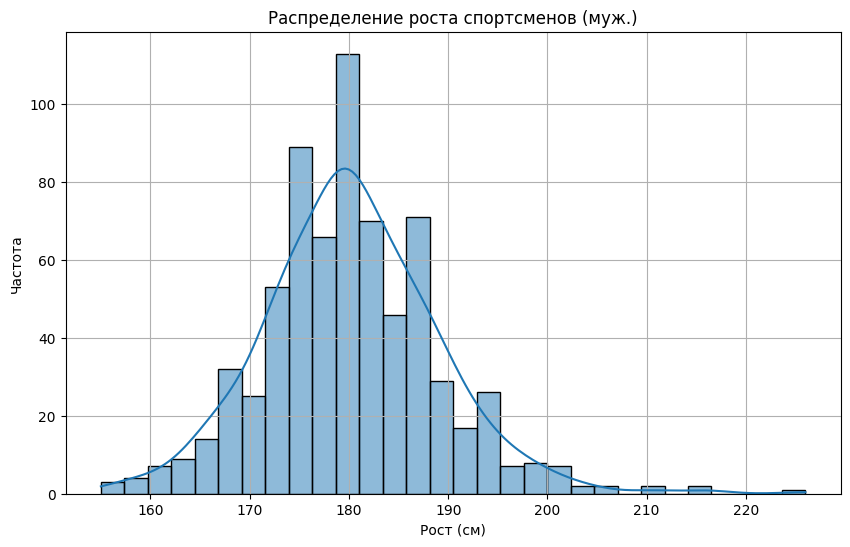

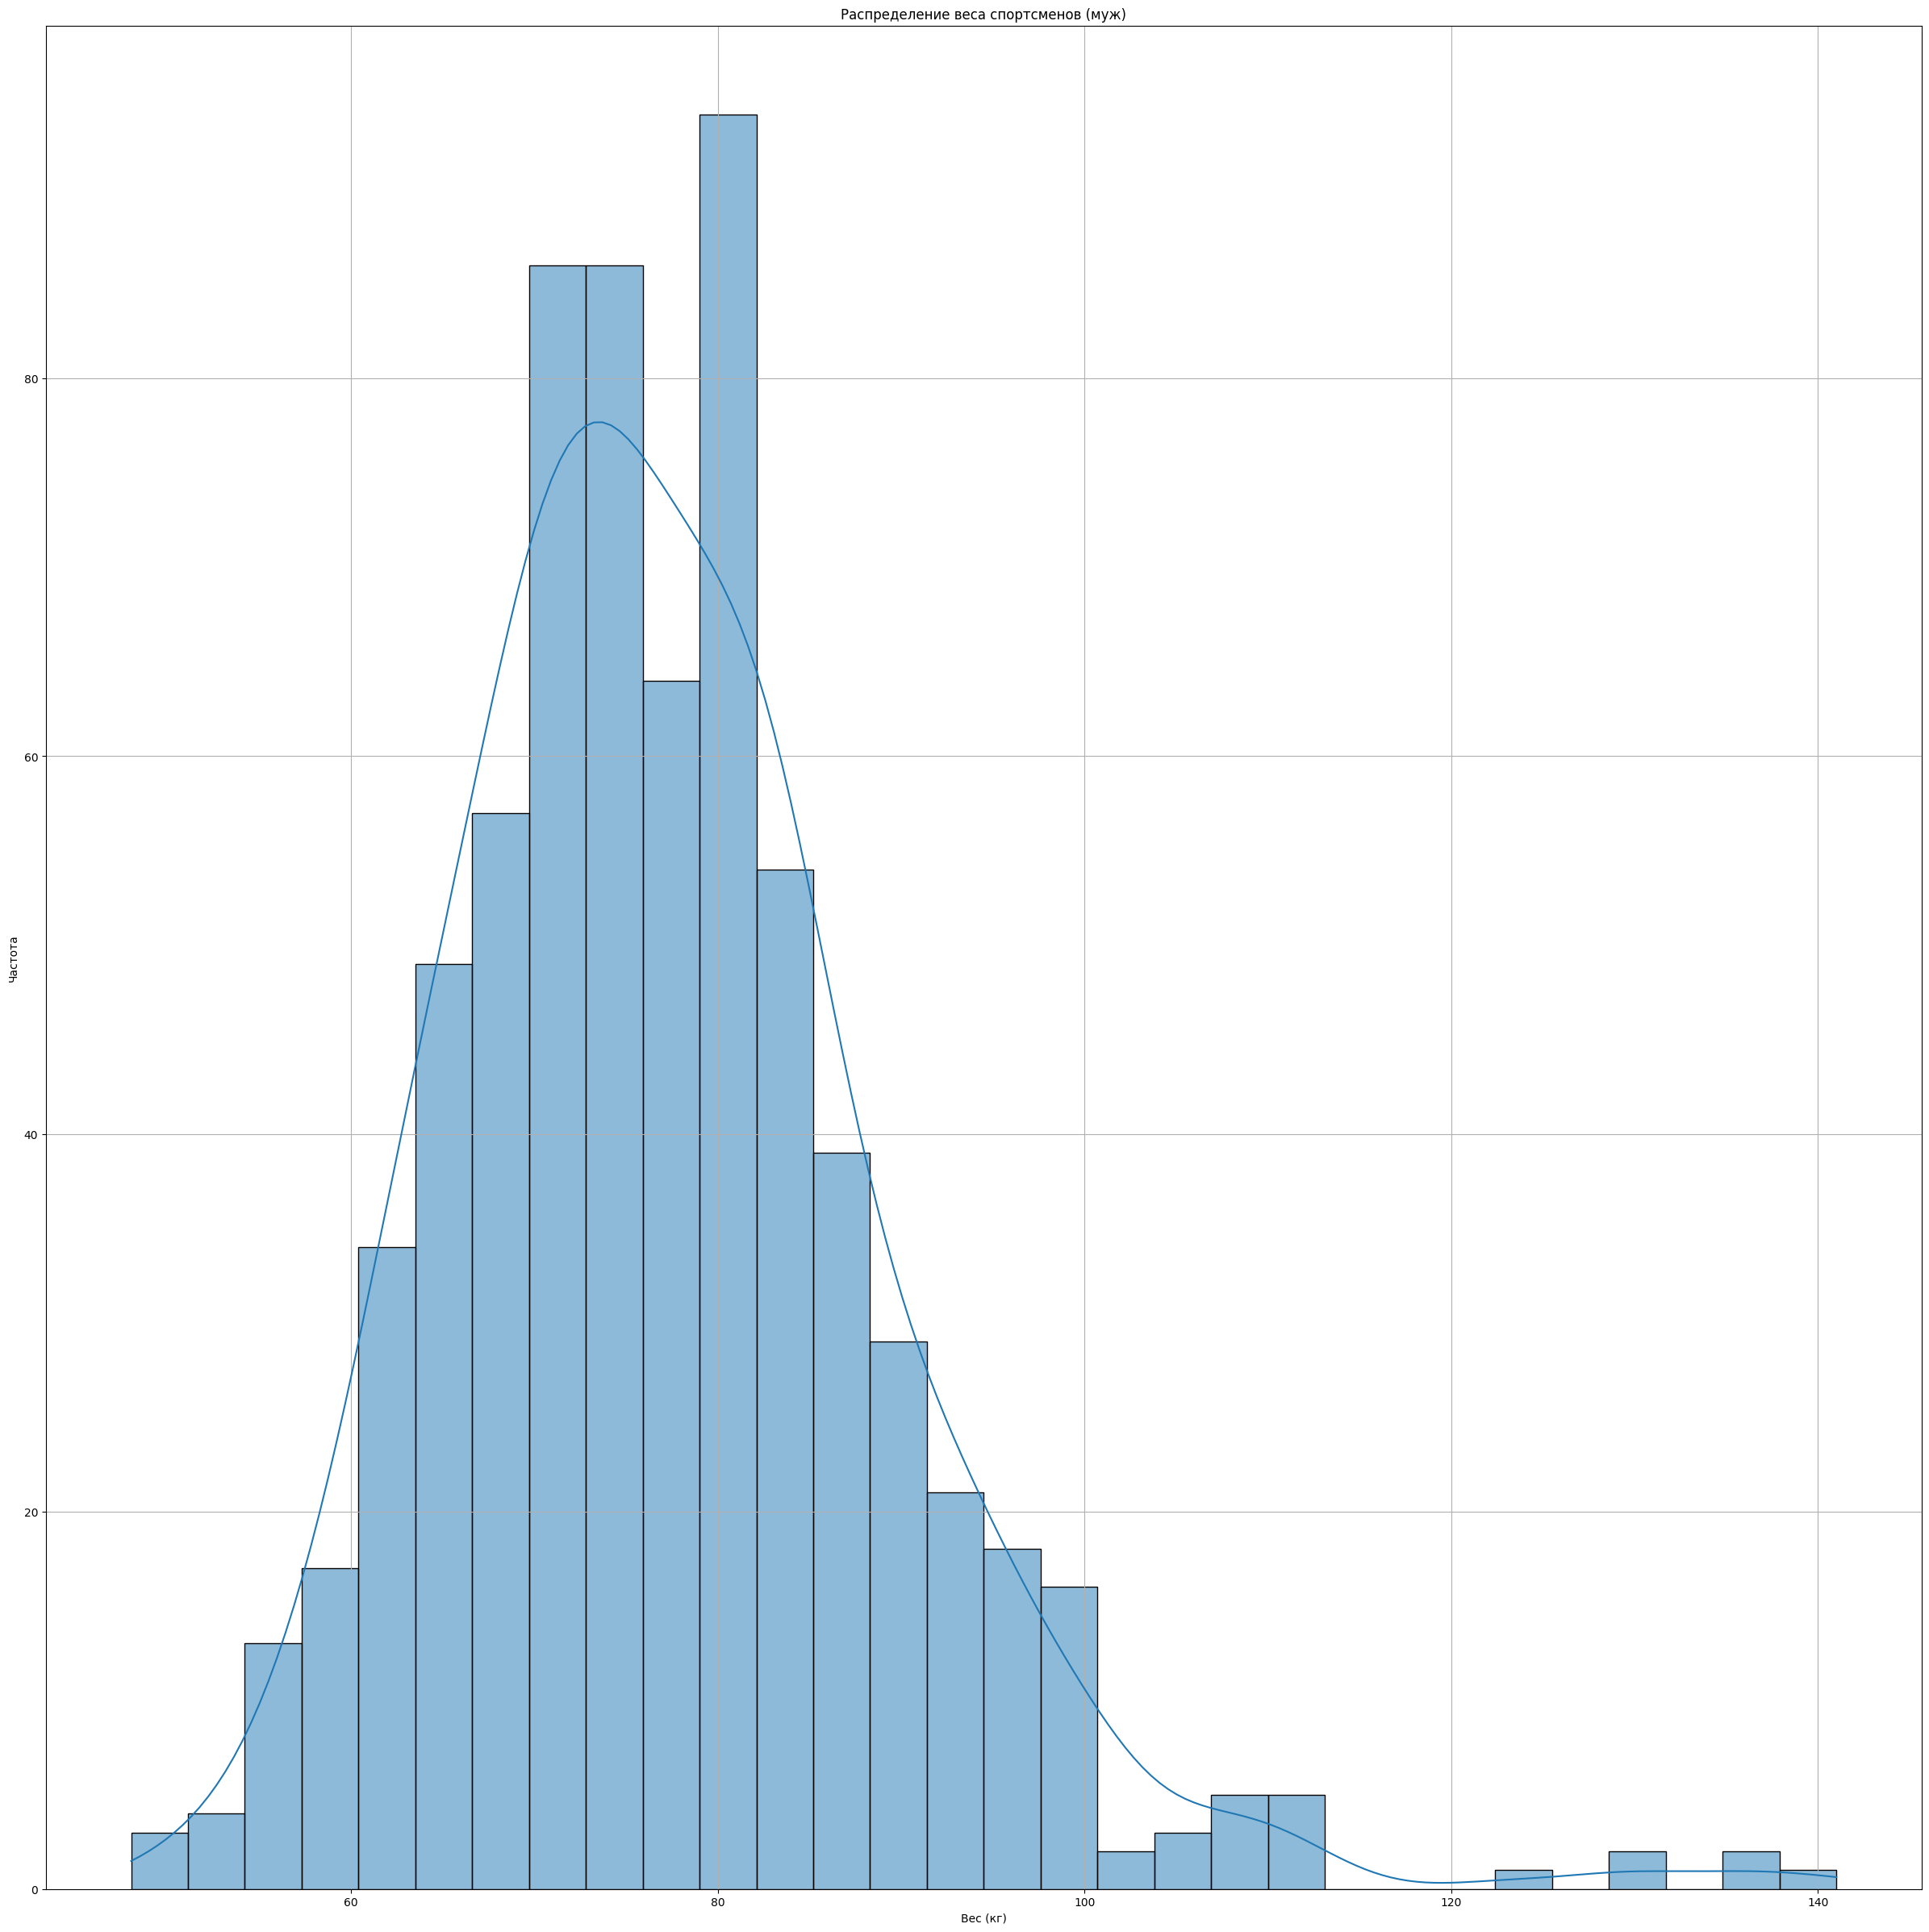

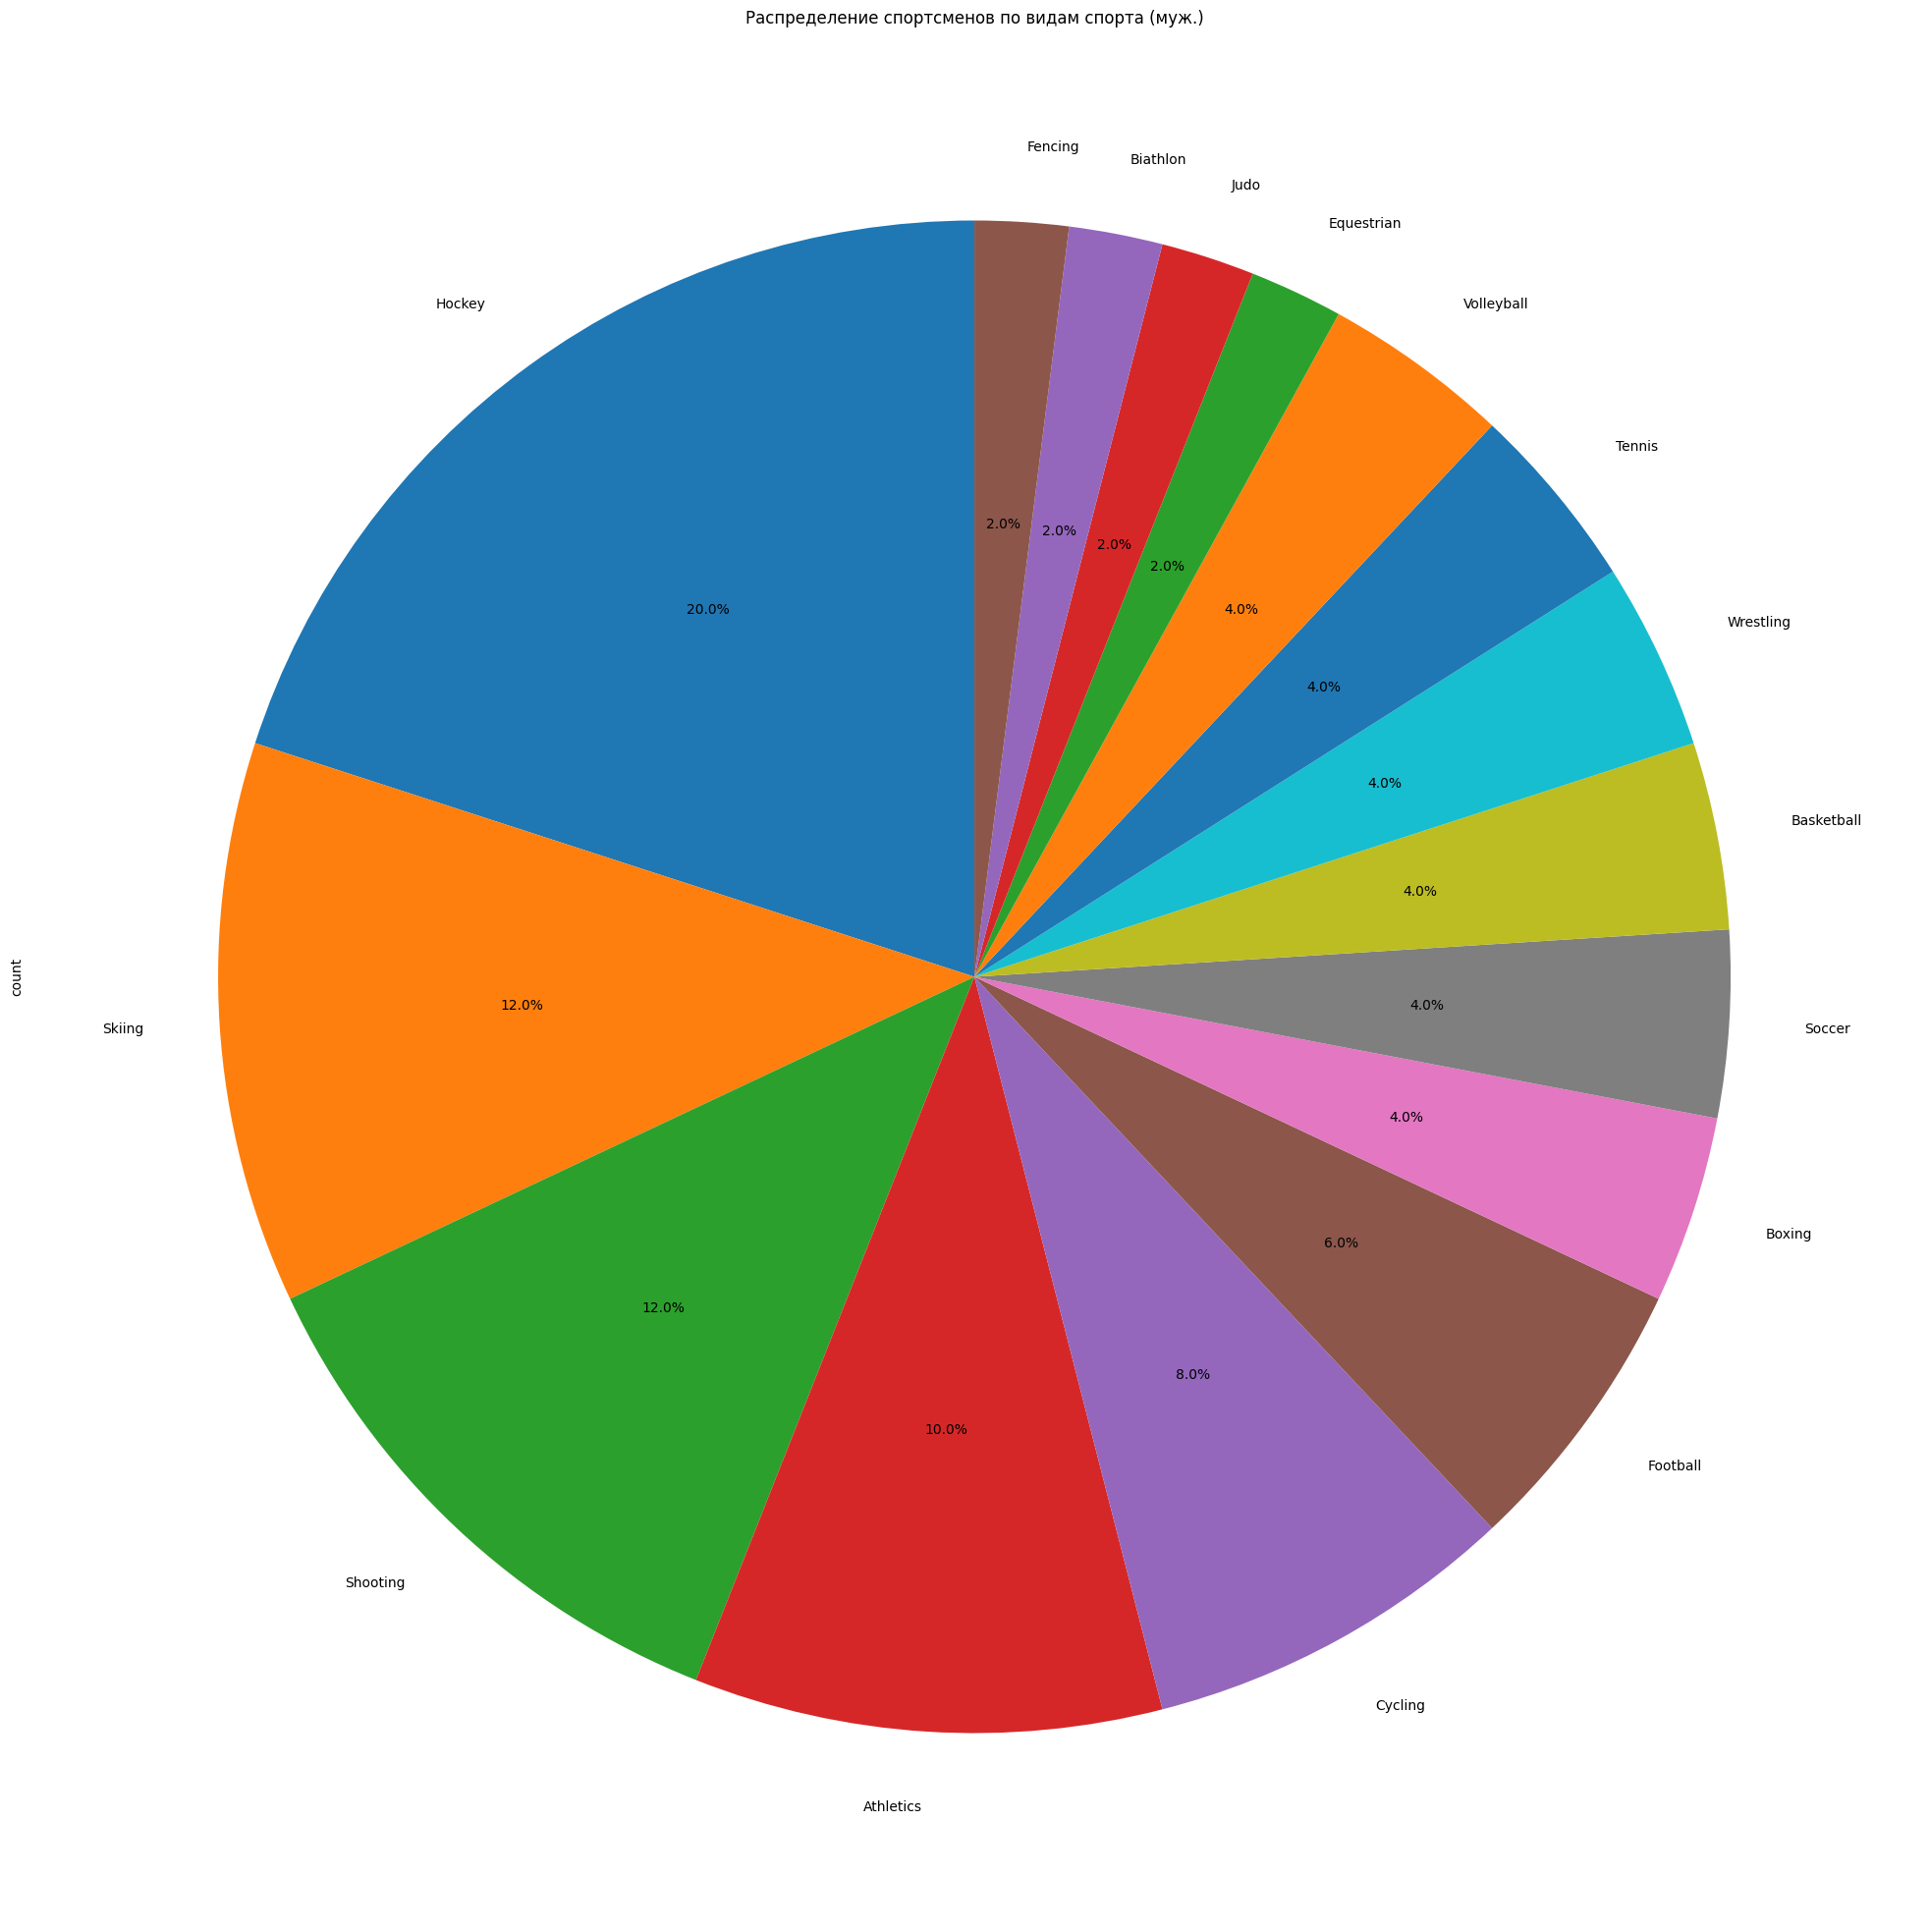

In [15]:
# Гистограмма роста
plt.figure(figsize=(10, 6))
sns.histplot(male_df['height'], bins=30, kde=True)
plt.title('Распределение роста спортсменов (муж.)')
plt.xlabel('Рост (см)')
plt.ylabel('Частота')
plt.grid()
plt.show()

# Гистограмма веса
plt.figure(figsize=(30, 30))
sns.histplot(sorted(male_df['weight']), bins=30, kde=True)
plt.title('Распределение веса спортсменов (муж)')
plt.xlabel('Вес (кг)')
plt.ylabel('Частота')
plt.grid()
plt.show()

# Круговая диаграмма распределения числа спортсменов по видам спорта
plt.figure(figsize=(25, 25))

male_df['sport'].head(50).value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Распределение спортсменов по видам спорта (муж.)')
plt.show()

**Метрики** (MAE, MSE)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# возьмем реальные высоты и веса спортсменов (мужчин) и сгенерируем предпологаемые веса и высоты рандомно
m_h_true = male_df['height'] # min: 155 | max: 226
m_h_predict = np.random.randint(155, 226, size=len(male_df))

# веса
m_w_true = male_df['weight'] # min: 48  | max: 141
m_w_predict = np.random.randint(48, 141, size=len(male_df))

# считаем метрики
# высота
m_h_mae = mean_absolute_error(m_h_true, m_h_predict)
m_h_mse = mean_squared_error(m_h_true, m_h_predict)

# вес
m_w_mae = mean_absolute_error(m_w_true, m_w_predict)
m_w_mse = mean_squared_error(m_w_true, m_w_predict)

print("Male Weight - MAE: {}\n".format(m_w_mae))
print("Male Weight - MSE: {}\n".format(m_w_mse))
print("Male Height - MAE: {}\n".format(m_h_mae))
print("Male Height - MSE: {}\n".format(m_h_mse))  

Male Weight - MAE: 27.147517730496453

Male Weight - MSE: 1080.6567375886525

Male Height - MAE: 20.870921985815603

Male Height - MSE: 636.4794326241134



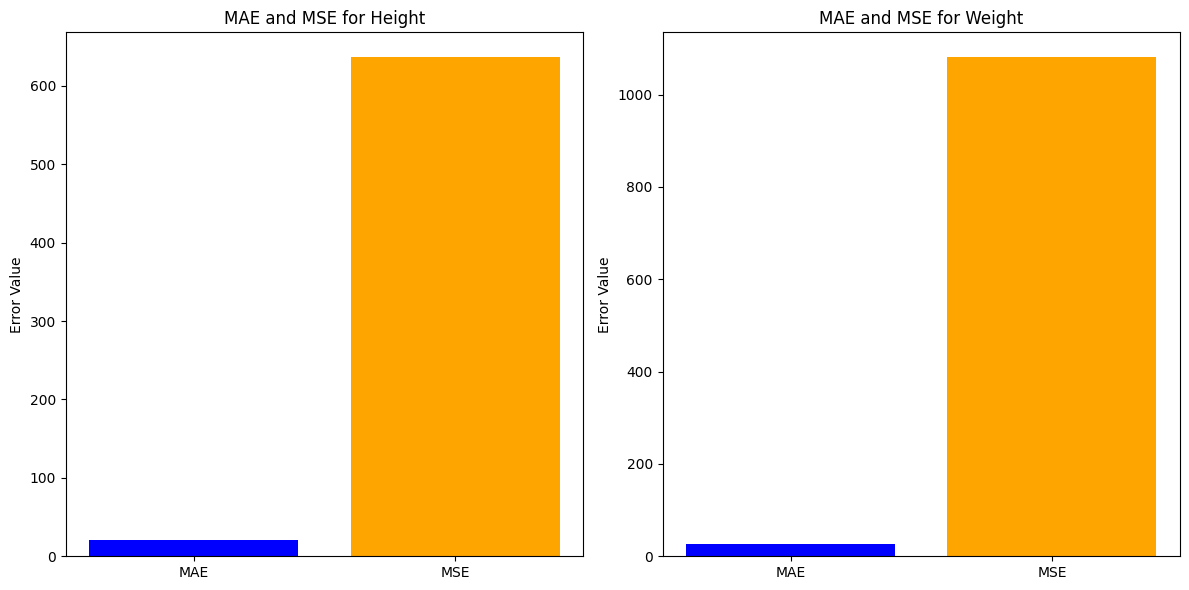

In [17]:
metrics = ['MAE', 'MSE']
h_values = [m_h_mae, m_h_mse]
w_values = [m_w_mae, m_w_mse]

# Визуализируем метрики для высот
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(metrics, h_values, color=['blue', 'orange'])
axs[0].set_title('MAE and MSE for Height')
axs[0].set_ylabel('Error Value')

axs[1].bar(metrics, w_values, color=['blue', 'orange'])
axs[1].set_title('MAE and MSE for Weight')
axs[1].set_ylabel('Error Value')

plt.tight_layout()
plt.show()

Нормализуем данные (для теста) с помощью MinMaxScaler

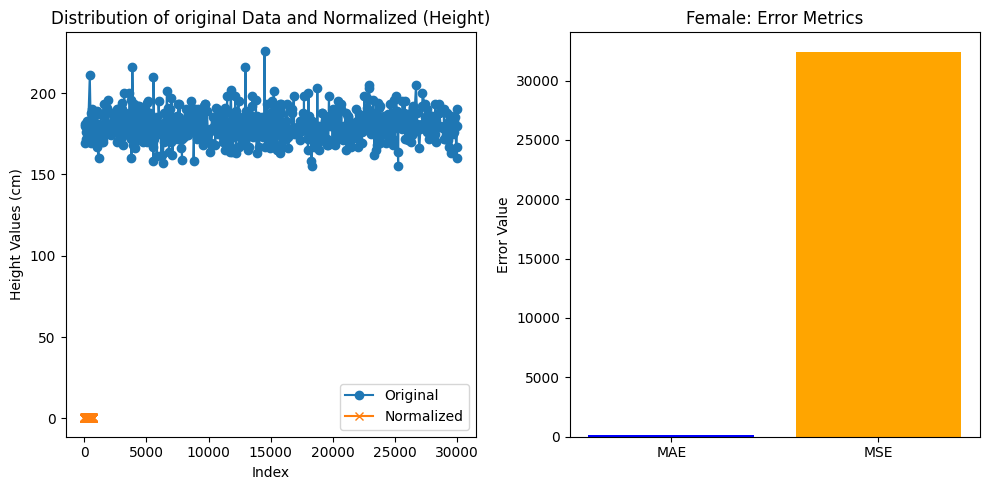

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Нормлизуем данные и подсчитываем метрики
scaler = MinMaxScaler()
normalized_male_height = scaler.fit_transform(male_df['height'].values.reshape(-1, 1))

norm_mae = mean_absolute_error(male_df['height'], normalized_male_height)
norm_mse = mean_squared_error(male_df['height'], normalized_male_height)

# Визуализируем нормализоанный вариант и ненормализованный вариант
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(male_df['height'], label='Original', marker='o')
plt.plot(normalized_male_height, label='Normalized', marker='x')
plt.title('Distribution of original Data and Normalized (Height)')
plt.xlabel('Index')
plt.ylabel('Height Values (cm)')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(['MAE', 'MSE'], [norm_mae, norm_mse], color=['blue', 'orange'])
plt.title('Female: Error Metrics')
plt.ylabel('Error Value')

plt.tight_layout()
plt.show()


### Female

**Признаки датасета**

In [19]:
female_df.sort_values(by='height').head(10)

,country,height,weight,sport
9174,United States,152.0,52.0,Biathlon
31,Israel,153.0,45.0,Dance
12807,United States,153.0,63.0,Basketball
28710,Canada,153.0,48.0,Athletics
11544,United States,154.0,50.0,Skiing
28463,United States,155.0,57.0,Hockey
7532,Russian Federation Unified Team,155.0,50.0,Athletics
2353,United States,155.0,52.0,Judo
29130,Germany,156.0,50.0,Shooting
8094,Soviet Union,157.0,58.0,Fencing


In [20]:
female_df.sort_values(by='height').tail(10)

,country,height,weight,sport
5008,Czechia Czechoslovakia,188.0,68.0,Tennis
9607,East Germany Germany,190.0,72.0,Volleyball
3471,United States,190.0,62.0,Basketball
1766,Brazil,190.0,73.0,Volleyball
26975,United States,190.0,64.0,Basketball
24741,United States,190.0,73.0,Basketball
19557,United States,192.0,95.0,Basketball
5039,Germany,194.0,88.0,Volleyball
26231,Italy,201.0,92.0,Cycling
4878,United States,201.0,95.0,Basketball


In [21]:
female_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 24 to 29983
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  268 non-null    object 
 1   height   268 non-null    float64
 2   weight   268 non-null    float64
 3   sport    268 non-null    object 
dtypes: float64(2), object(2)
memory usage: 10.5+ KB


**Вывод характеристик (min-max значения, отклонение, среднее и др.)**

In [22]:
female_df.describe()

,height,weight
count,268.000000,268.000000
mean,170.712687,63.406716
std,8.648110,10.879433
min,152.000000,45.000000
25%,165.000000,57.000000
50%,170.000000,62.000000
75%,175.000000,67.250000
max,201.000000,135.000000


**Мода и медиана**

In [23]:
# Мода и медиана
f_mode_value = female_df['height'].mode()
f_median_value = female_df['height'].median()

print("Мода: {}\n\nМедиана: {}\n".format(f_mode_value, f_median_value))

Мода: 0    170.0
Name: height, dtype: float64

Медиана: 170.0



**Кол-во пропусков**:

In [24]:
female_df.isnull().sum() # Кол-во пропусков в столбцах

country    0
height     0
weight     0
sport      0
dtype: int64

**Гистограммы, круговые диаграммы для визуализации распределений**

In [25]:
female_df.shape # размер отдельного датасета женщин-спортсменов

(268, 4)

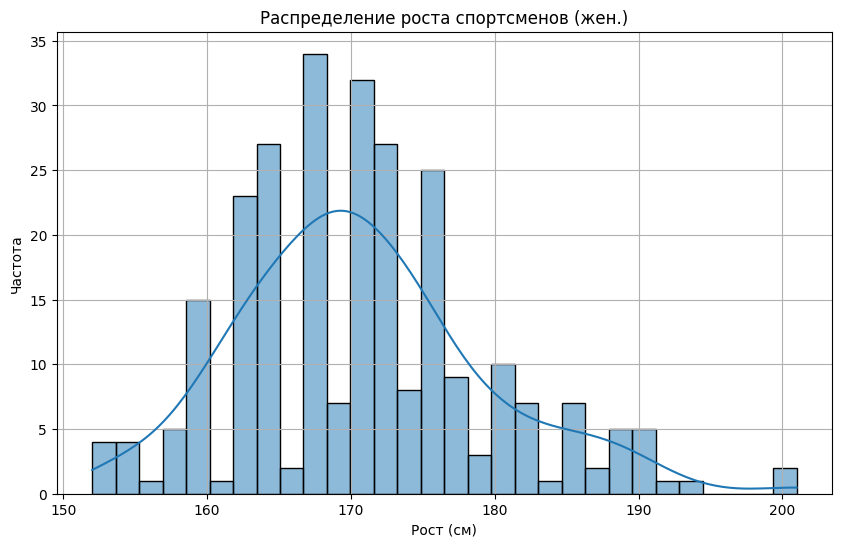

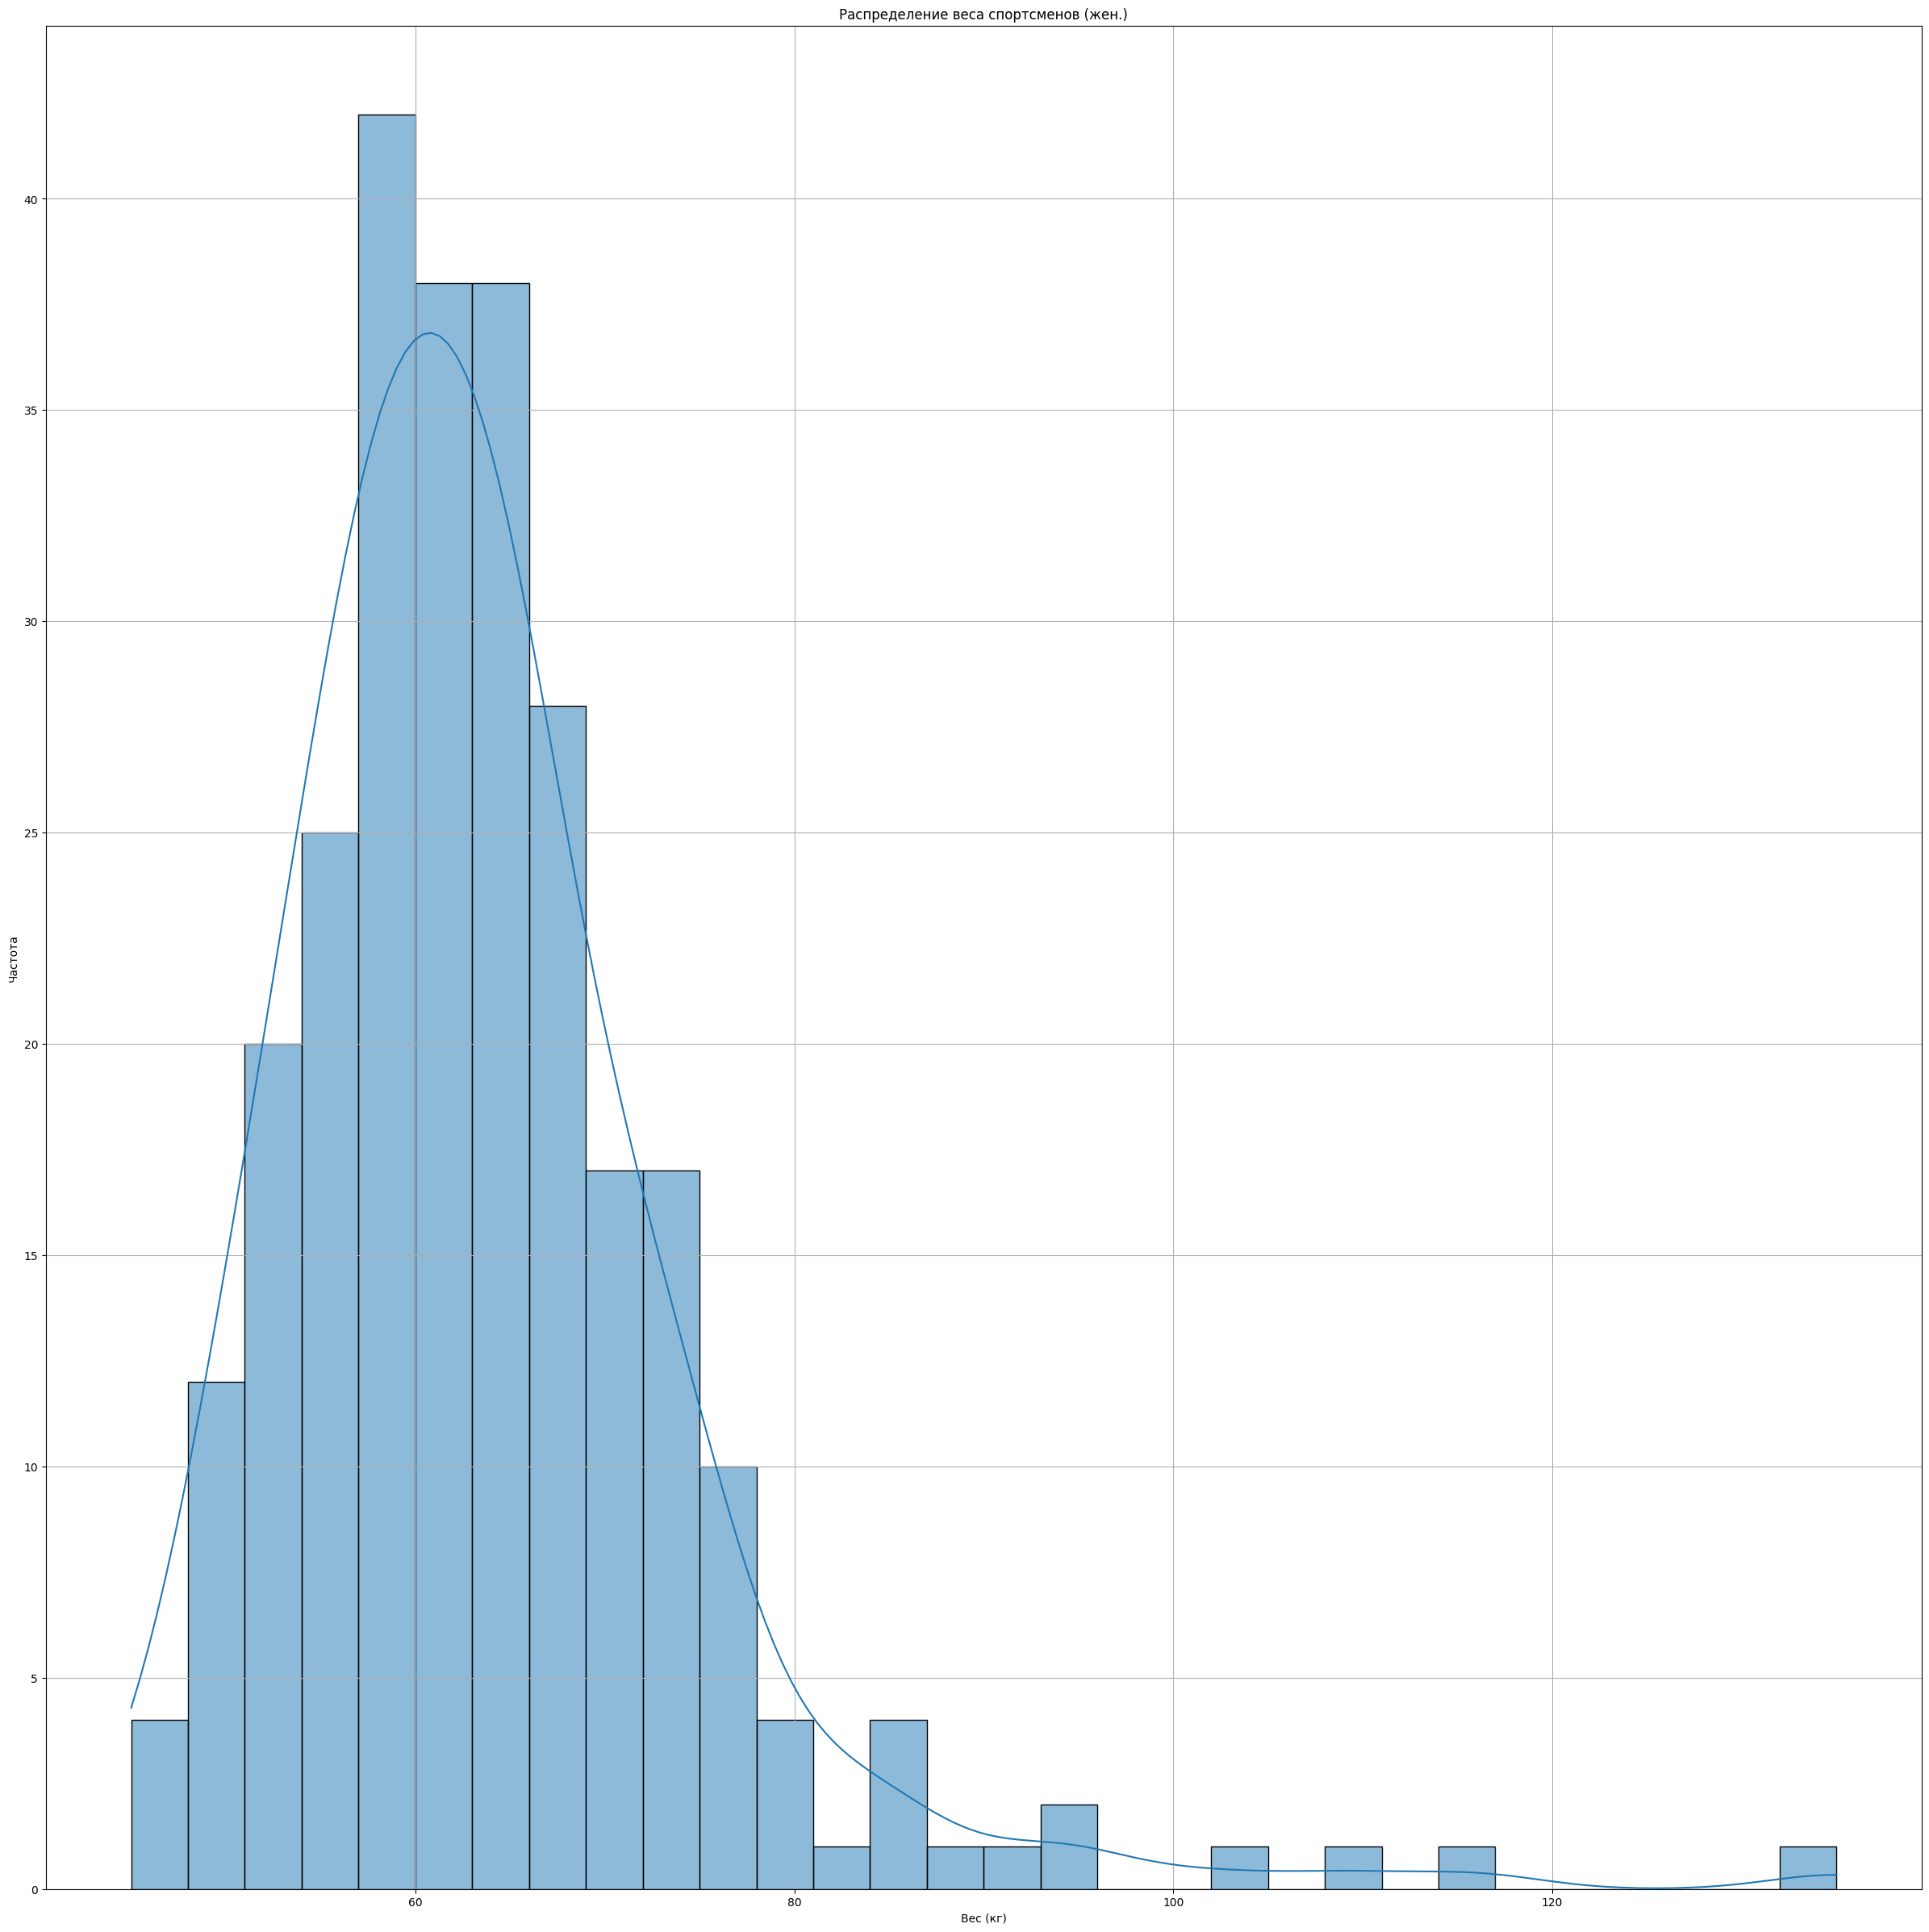

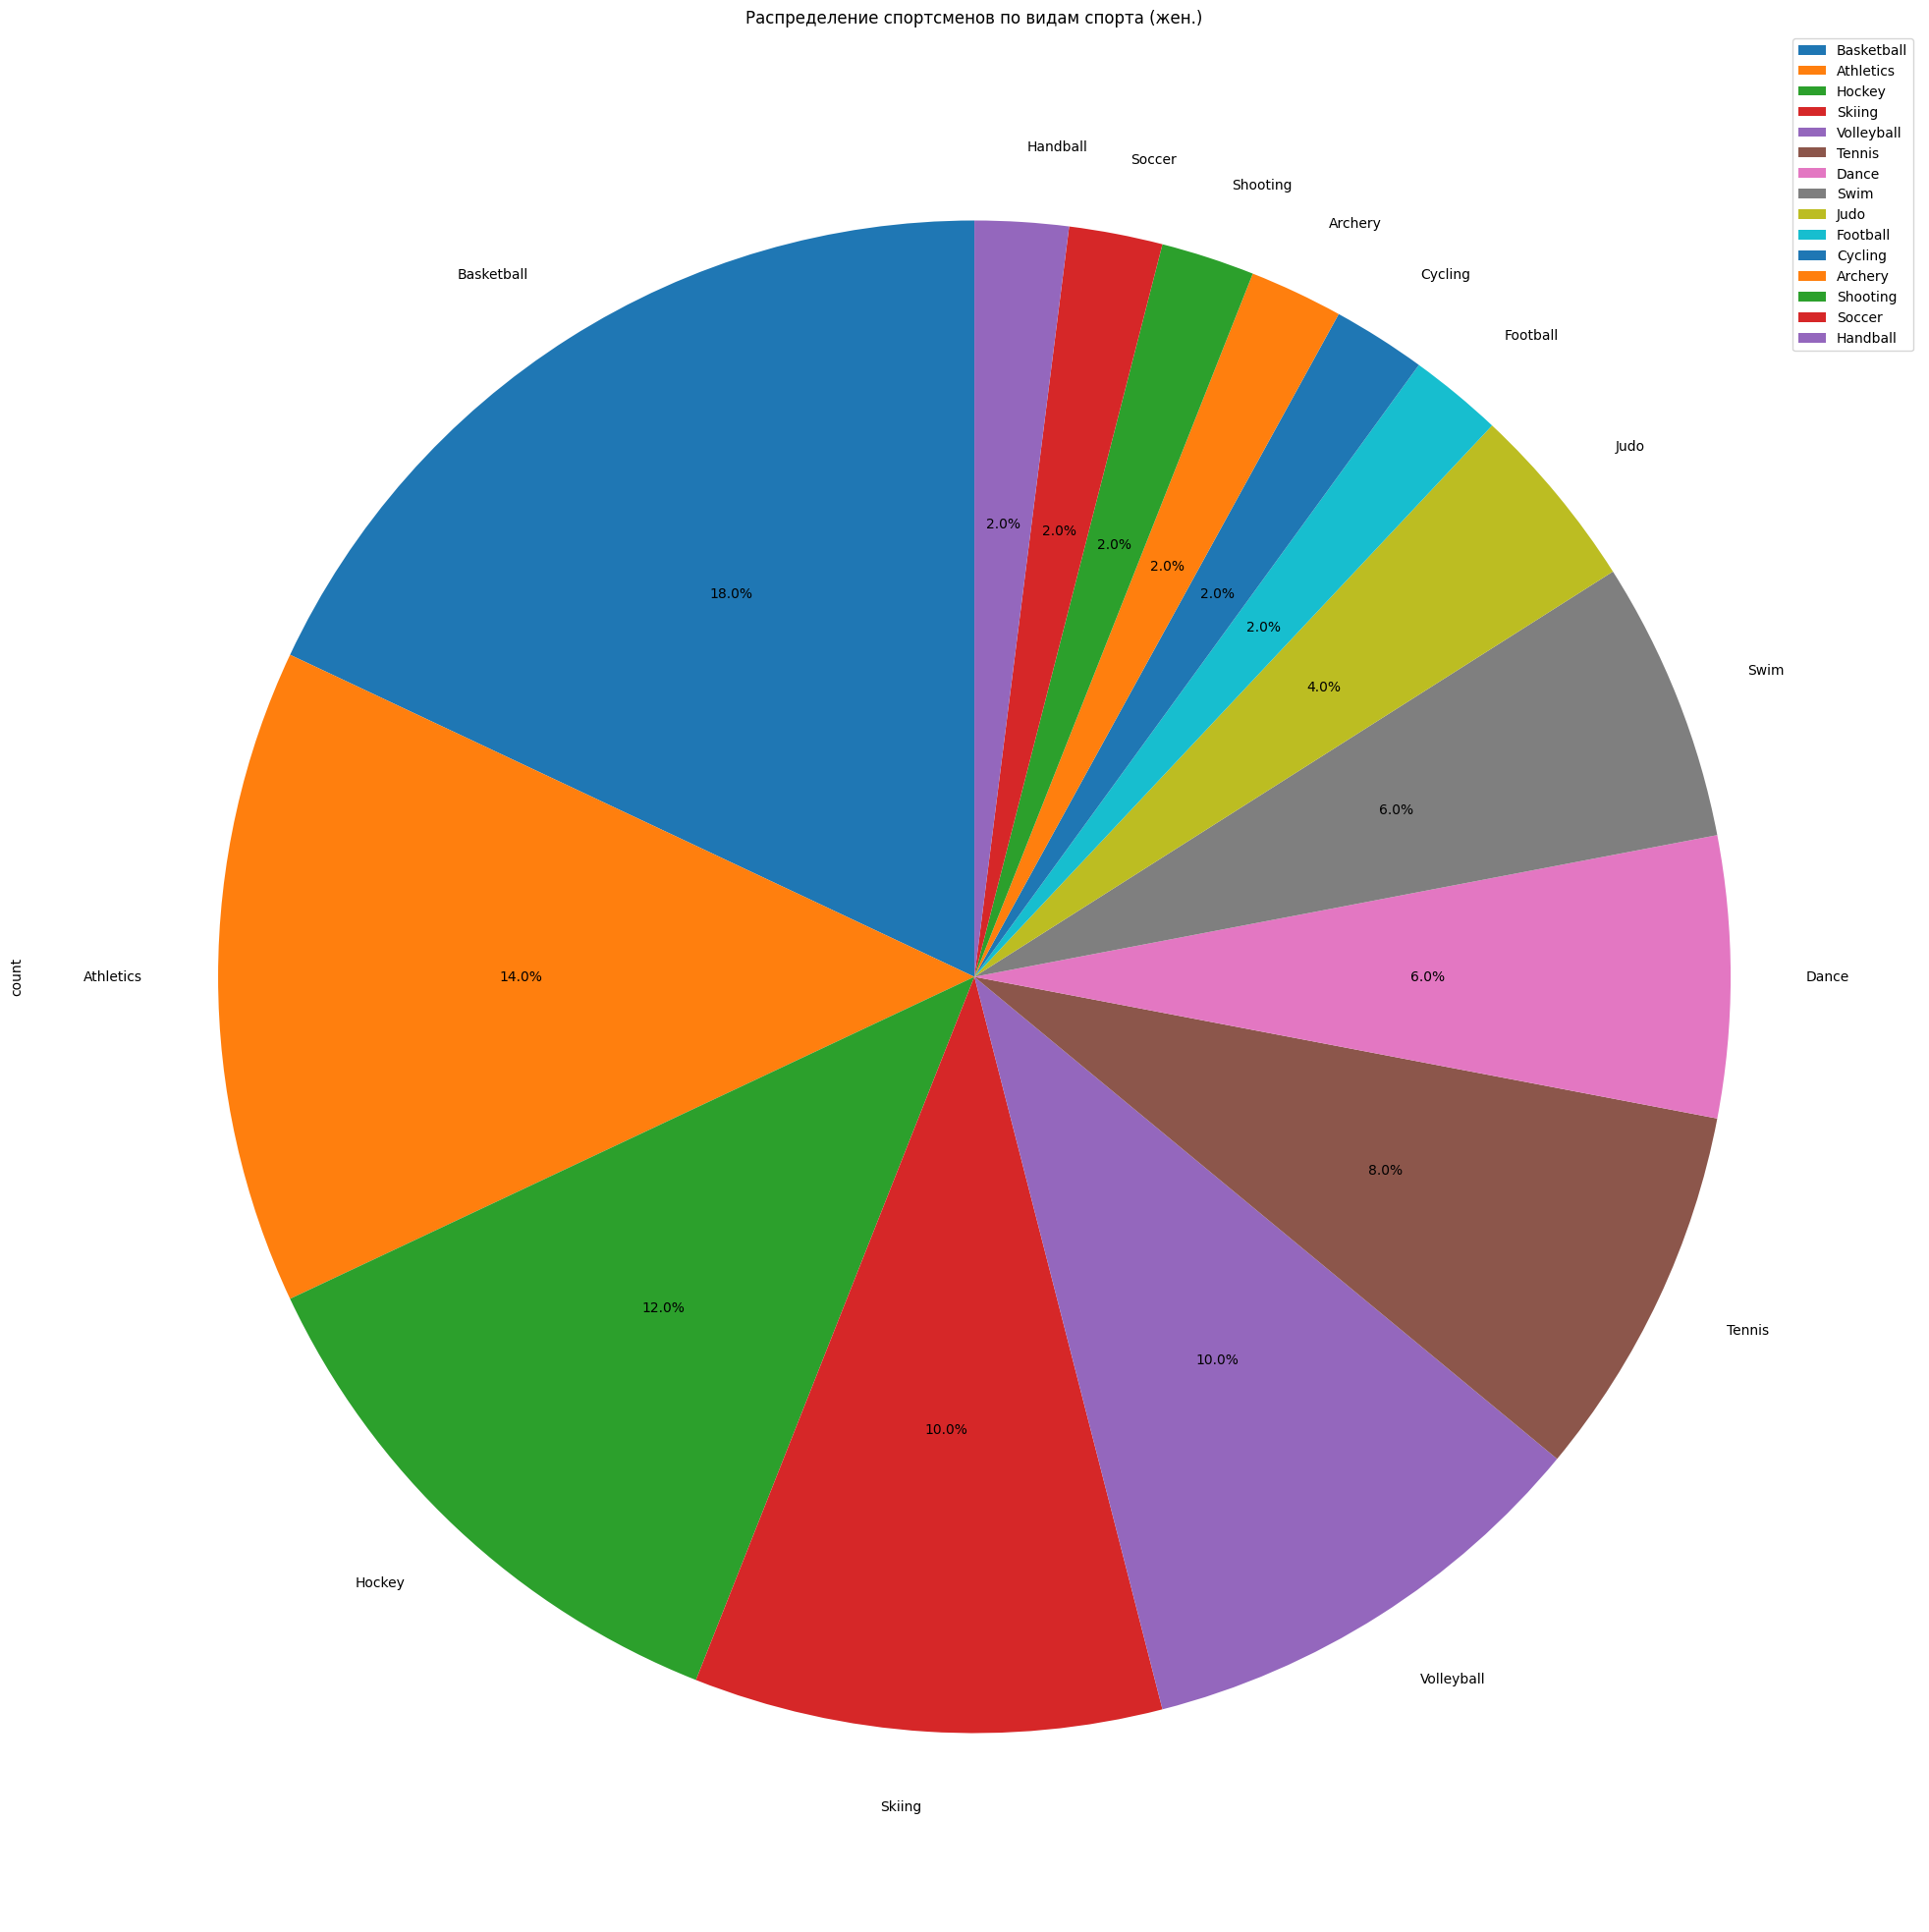

In [26]:
# Гистограмма роста
plt.figure(figsize=(10, 6))
sns.histplot(female_df['height'], bins=30, kde=True)
plt.title('Распределение роста спортсменов (жен.)')
plt.xlabel('Рост (см)')
plt.ylabel('Частота')
plt.grid()
plt.show()

# Гистограмма веса
plt.figure(figsize=(30, 30))
sns.histplot(sorted(female_df['weight']), bins=30, kde=True)
plt.title('Распределение веса спортсменов (жен.)')
plt.xlabel('Вес (кг)')
plt.ylabel('Частота')
plt.grid()
plt.show()

# Круговая диаграмма распределения числа спортсменов по видам спорта
plt.figure(figsize=(25, 25))

female_df['sport'].head(50).value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Распределение спортсменов по видам спорта (жен.)')
plt.legend()
plt.show()

In [27]:
# возьмем реальные высоты и веса спортсменов (женщин) и сгенерируем предпологаемые веса и высоты рандомно
f_h_true = female_df['height'] # min: 152 | max: 201 
f_h_predict = np.random.randint(152, 201, size=len(female_df))

# веса
f_w_true = female_df['weight'] # min: 45  | max: 135
f_w_predict = np.random.randint(45, 135, size=len(female_df))

# считаем метрики
# высота
f_h_mae = mean_absolute_error(f_h_true, f_h_predict)
f_h_mse = mean_squared_error(f_h_true, f_h_predict)

# вес
f_w_mae = mean_absolute_error(f_w_true, f_w_predict)
f_w_mse = mean_squared_error(f_w_true, f_w_predict)

print("Male Weight - MAE: {}\n".format(f_w_mae))
print("Male Weight - MSE: {}\n".format(f_w_mse))
print("Male Height - MAE: {}\n".format(f_h_mae))
print("Male Height - MSE: {}\n".format(f_h_mse))  

Male Weight - MAE: 28.98507462686567

Male Weight - MSE: 1353.4253731343283

Male Height - MAE: 13.697761194029852

Male Height - MSE: 280.48880597014926



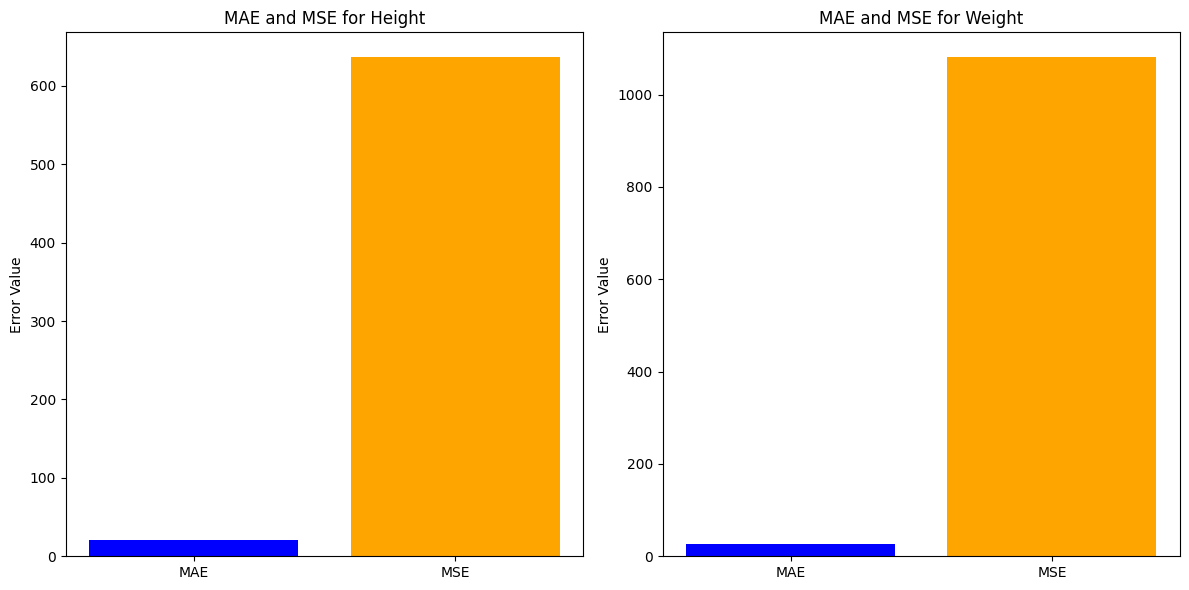

In [28]:
metrics = ['MAE', 'MSE']
h_values = [m_h_mae, m_h_mse]
w_values = [m_w_mae, m_w_mse]

# Визуализируем метрики для высот
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(metrics, h_values, color=['blue', 'orange'])
axs[0].set_title('MAE and MSE for Height')
axs[0].set_ylabel('Error Value')

axs[1].bar(metrics, w_values, color=['blue', 'orange'])
axs[1].set_title('MAE and MSE for Weight')
axs[1].set_ylabel('Error Value')

plt.tight_layout()
plt.show()

Нормализуем данные (для теста) с помощью MinMaxScaler для роста

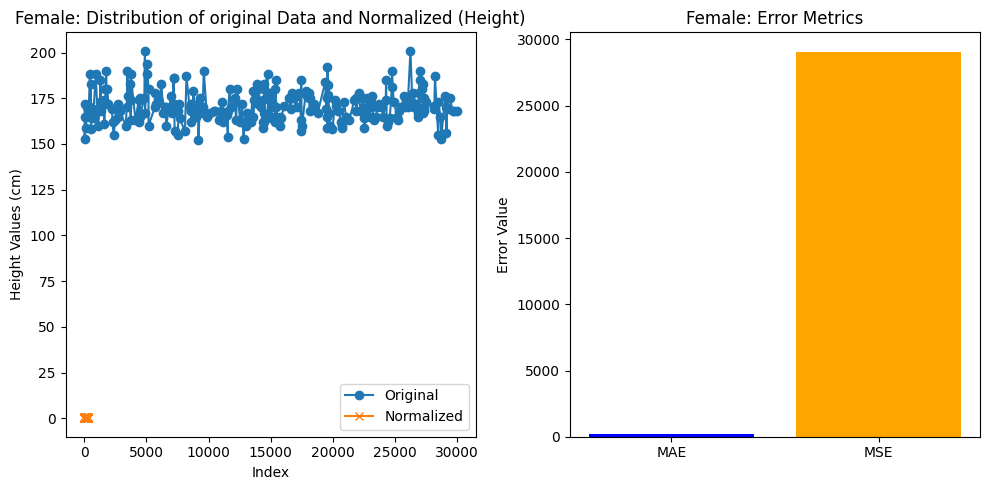

In [29]:
# Нормлизуем данные и подсчитываем метрику роста
f_scaler = MinMaxScaler()
normalized_female_height = f_scaler.fit_transform(female_df['height'].values.reshape(-1, 1))

f_norm_mae = mean_absolute_error(female_df['height'], normalized_female_height)
f_norm_mse = mean_squared_error(female_df['height'], normalized_female_height)

# Визуализируем нормализоанный вариант и ненормализованный вариант
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(female_df['height'], label='Original', marker='o')
plt.plot(normalized_female_height, label='Normalized', marker='x')
plt.title('Female: Distribution of original Data and Normalized (Height)')
plt.xlabel('Index')
plt.ylabel('Height Values (cm)')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(['MAE', 'MSE'], [f_norm_mae, f_norm_mse], color=['blue', 'orange'])
plt.title('Female: Error Metrics')
plt.ylabel('Error Value')

plt.tight_layout()
plt.show()


Вывод: Заметно, что данные разброшены, явно распределение не нормальное, хоть какие то заметные детали в графиках присутствуют.

* Частые значения у мужчин:
     - Рост: **180 см**.
     - Вес: **80 кг**.
     - Популярный спорт: **Хоккей** (датасет слишком большой, поэтому я взял некоторую часть из датасета, но выбросы по росту у мужчин 200+ см. - **баскетбол**)

* Частые значения у женщин:
     - Рост: **168 см**.
     - Вес: **60 кг**.
     - Популярный спорт: **Баскетбол** (выбросы по росту у женщин 200+ см. также- **баскетбол**)
     

# 2. Аппроксимация распределений данных с помощью ядерных оценок

**__KDE (Kernel density estimation)__** - непараметрический способ оценки плотности случайной величины. Ядерная оценка плотности является задачей сглаживания данных, когда делается заключение о совокупности, основываясь на конечных выборках данных.

**Построим их отдельно для каждого гендера.**

### Male

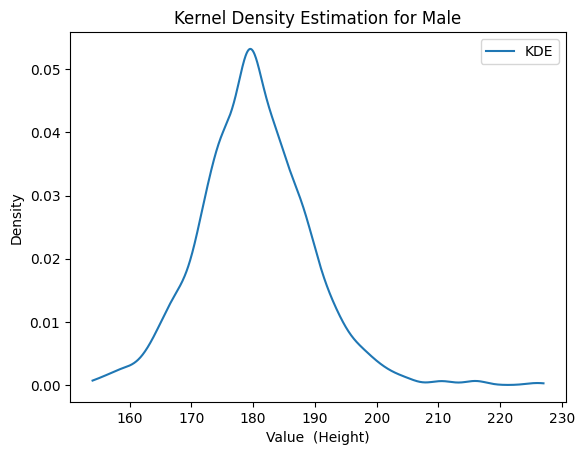

In [30]:
from scipy.stats import gaussian_kde
# Используем методы из модуля scipy для построения ядерной оценки плотности

m_data = male_df['height']

kde_0 = gaussian_kde(m_data, bw_method=0.2)

x_vals = np.linspace(min(m_data) - 1, max(m_data) + 1, 1000)
y_vals = kde_0(x_vals)

plt.plot(x_vals, y_vals, label='KDE')
plt.xlabel('Value  (Height)')
plt.ylabel('Density')
plt.title('Kernel Density Estimation for Male')
plt.legend()
plt.show()

### Female

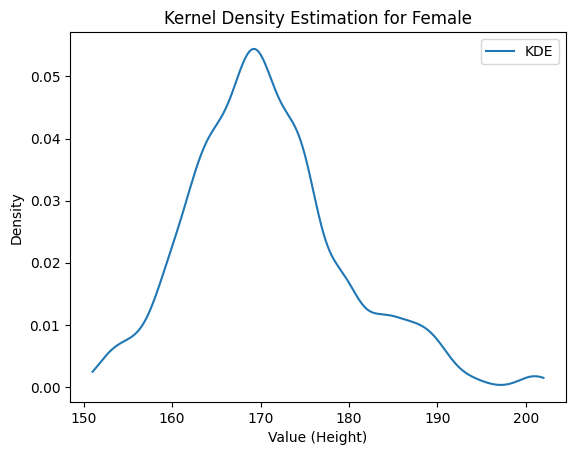

In [31]:
f_data = female_df['height']

kde_1 = gaussian_kde(f_data, bw_method=0.2)

x_vals = np.linspace(min(f_data) - 1, max(f_data) + 1, 1000) # разбиение для оси абсциссы
y_vals = kde_1(x_vals) 

plt.plot(x_vals, y_vals, label='KDE')
plt.xlabel('Value (Height)')
plt.ylabel('Density')
plt.title('Kernel Density Estimation for Female')
plt.legend()
plt.show()

# 3. Анализ данных с помощью cdplot, dotchart, boxplot и stripchart

**Cdplot (Conditional Density Plot)** - график условной плотности. Отображает распределение данных в зависимости от категории или значения некоторой переменной.

На оси абцисс отображается непрерывная переменная и на оси ординат условная плотность категориальной переменной. Полезен для понимания того, как распределение непрерывной переменной меняется в зависимости от категориальной переменной.

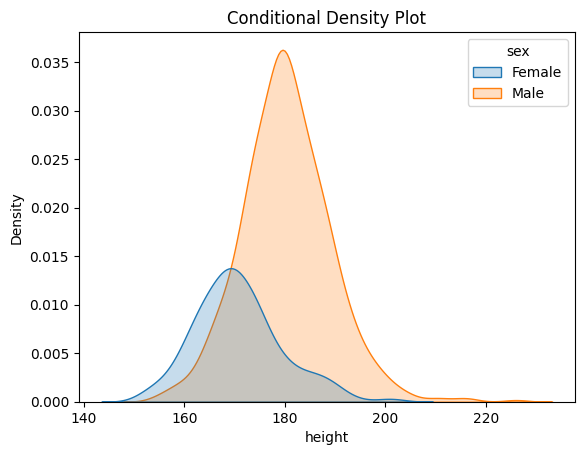

In [32]:
df_sorted = df.sort_values(by='weight')

sns.kdeplot(x='height', hue='sex', data=df_sorted, fill=True)
plt.title('Conditional Density Plot')
plt.show()

**Dotchart (Dot Plot)** - точечный график, представляющий данные в виде точек на числовой оси. Показывает распределение данных для выявления возможных закономерностей. 

Хорошо подходит для описания категориальных данных. Позволяет увидеть плотность данных и выбросы.

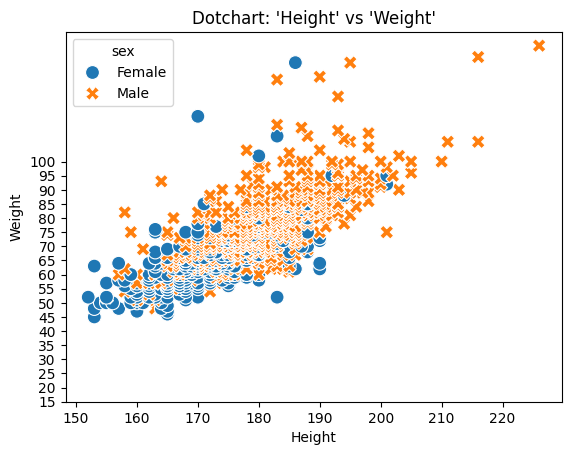

In [33]:
sns.scatterplot(x='height', y='weight', hue='sex', style='sex', data=df_sorted, s=100);
plt.yticks(range(15, 101, 5))
plt.title("Dotchart: 'Height' vs 'Weight'")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

**Boxplot (box-and-whisker plot)** - ящичная диаграмма. График, используемый для визуализации данных через основные статистики: медиану, моду, квартили, минимальные и максимальные значения, выбросы.

Представляет собой прямоугольник, который показывает диапазон значений от первого до третьего квартиля, а линия внутри ящика обозначает медиану. Вертикальные "усы"(whiskers) простираются от ящика до минимального и максимального значения, если они только не являются выбросами. Выбросы изображаются в виде точек.

Показывает, где находятся центральные данные, насколько разбросаны данные, есть ли в них выбросы. Отображает форму распределения и его центр.

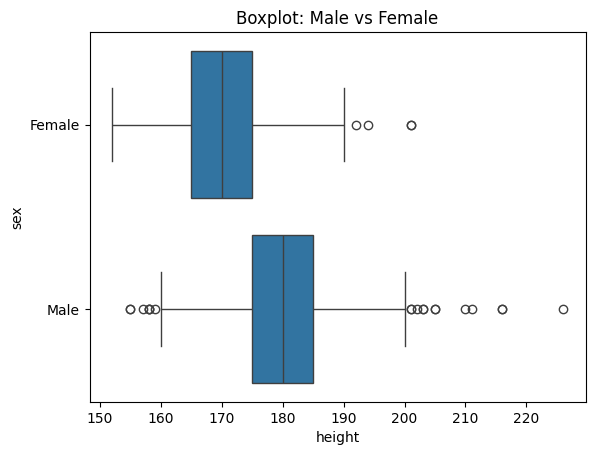

In [34]:
sns.boxplot(x='height', y='sex', data=df_sorted, orient='h');
plt.title("Boxplot: Male vs Female");

**Проверим выбросы на концах выборок с помощью межквартильного метода IQR**

Идея: получаем $Q1 (< 25\%), Q2 ( < 75\%)$ от всей выборки, далее считаем диапазоне $[Q1 - 1.5IQR, Q3 + 1.5IQR]$

Далее выбросим их из датасета и посмотрим что получится

**Male**

In [35]:
male_Q1 = m_data.quantile(0.25)
male_Q3 = m_data.quantile(0.75)

male_IQR = male_Q3 - male_Q1

lower_bound = male_Q1 - 1.5 * male_IQR
upper_bound = male_Q3 + 1.5 * male_IQR
male_height_outliers = m_data[(m_data < lower_bound) | (m_data > upper_bound)]

print("Выбросы:\n{}\n".format(male_height_outliers))
print(m_data.shape)

Выбросы:
442      211.0
3867     216.0
5560     158.0
5565     210.0
6339     157.0
6649     201.0
7851     159.0
8793     158.0
11786    202.0
12965    216.0
14499    226.0
15240    201.0
18275    158.0
18305    155.0
18750    203.0
22881    205.0
22924    203.0
25255    155.0
26685    205.0
Name: height, dtype: float64

(705,)


(686,)


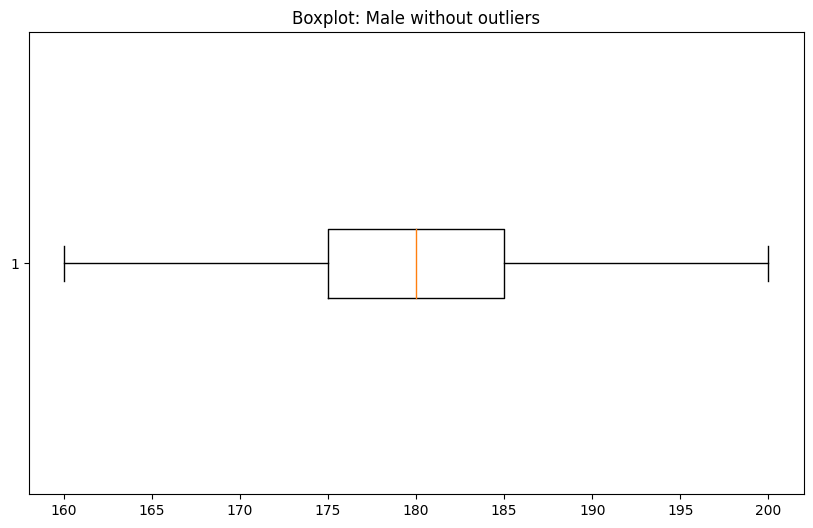

In [36]:
# Формируем датасет без выбросов и рисуем коробку

m_data_without_outliers = m_data[~m_data.index.isin(male_height_outliers.index)]
print(m_data_without_outliers.shape)

plt.figure(figsize=(10, 6))
plt.boxplot(x=m_data_without_outliers,vert=False)
plt.title("Boxplot: Male without outliers")
plt.show()


In [37]:
print("Данные с выбросами:\n", m_data, end="\n\n")
print("Данные без выбросов:\n", m_data_without_outliers, end="\n\n")

Данные с выбросами:
 25       181.0
68       169.0
76       180.0
128      176.0
160      172.0
         ...  
29813    185.0
29957    160.0
29960    167.0
29981    190.0
29999    180.0
Name: height, Length: 705, dtype: float64

Данные без выбросов:
 25       181.0
68       169.0
76       180.0
128      176.0
160      172.0
         ...  
29813    185.0
29957    160.0
29960    167.0
29981    190.0
29999    180.0
Name: height, Length: 686, dtype: float64



Вывод: _значения, полученные вне диапазона квартилей в начале являются выбросами_

**Female**

In [38]:
female_Q1 = f_data.quantile(0.25)
female_Q3 = f_data.quantile(0.75)

female_IQR = female_Q3 - female_Q1

lower_bound = female_Q1 - 1.5 * female_IQR
upper_bound = female_Q3 + 1.5 * female_IQR
female_height_outliers = f_data[(f_data < lower_bound) | (f_data > upper_bound)]

print("Выбросы:\n{}\n".format(female_height_outliers))
print(f_data.shape)

Выбросы:
4878     201.0
5039     194.0
19557    192.0
26231    201.0
Name: height, dtype: float64

(268,)


(264,)


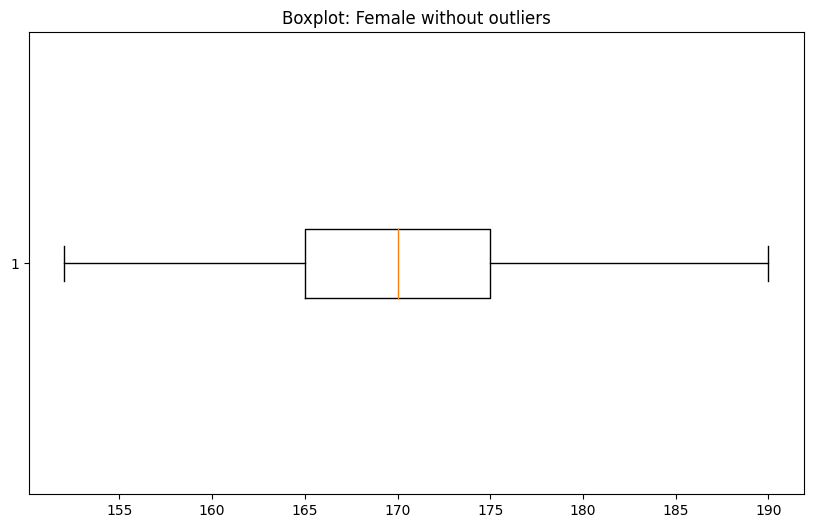

In [39]:
# Формируем датасет без выбросов и рисуем коробку

f_data_without_outliers = f_data[~f_data.index.isin(female_height_outliers.index)]
print(f_data_without_outliers.shape)

plt.figure(figsize=(10, 6))
plt.boxplot(x=f_data_without_outliers,vert=False)
plt.title("Boxplot: Female without outliers")
plt.show()


In [40]:
print("Данные с выбросами:\n", f_data, end="\n\n")
print("Данные без выбросов:\n", f_data_without_outliers, end="\n\n")

Данные с выбросами:
 24       172.0
31       153.0
80       165.0
124      159.0
230      170.0
         ...  
29216    175.0
29413    175.0
29624    168.0
29750    168.0
29983    168.0
Name: height, Length: 268, dtype: float64

Данные без выбросов:
 24       172.0
31       153.0
80       165.0
124      159.0
230      170.0
         ...  
29216    175.0
29413    175.0
29624    168.0
29750    168.0
29983    168.0
Name: height, Length: 264, dtype: float64



Вывод: _значения, полученные на коробке в начале являются выбросами_

**Stripchart** - полосовый график. График, где отдельные точки распологаются вдоль оси для каждой категории. 

Близкие значения распологаются на небольшом расстоянии друг от друга, чтобы их было видно. Хорошо подходит для небольших выборок и используется для сравнения распределений между группами. Подобно **_dotchart_** дает представление о плотности данных, но для разных категорий и групп. Очень полезен для выявления кластеров данных.

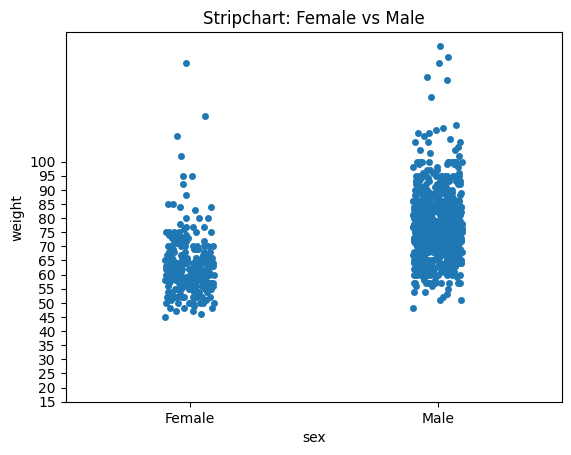

In [41]:
sns.stripplot(x='sex', y='weight', data=df_sorted, jitter=True) # задание осей и параметров для лучшего отоображения распределения
plt.yticks(range(15, 101, 5))
plt.title("Stripchart: Female vs Male")
plt.show()

# 4. Критерий Граббса и Q-теста Диксона. Визуализация

**Критерий Граббса** - статистический тест, используемый для определения выбросов в одномерной выборке данных, подчиняющихся закону нормального распределения.

**Q-тест Диксона** - статистический тест, использующийся для выявления выбросов и также основывающийся на том, что данные подчиняются нормальному закону распределения, однако как правило его используют на небольших объемах выборки.

**Проведем тест Шапиро-Уилка и Коломгорова-Смирнова для опредeления, является ли распределение выборки роста спортсменов нормальным или нет.**

#### Male

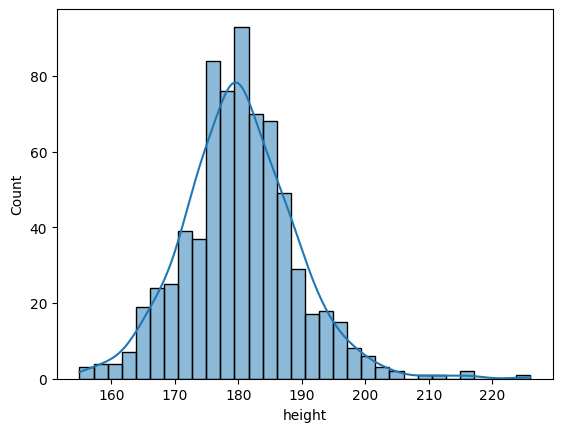

Non Normal


In [42]:
male_df_height = male_df['height']

sns.histplot(male_df_height, kde=True) # делаем ядерную оценку для показательной визуализации
plt.show()

# вычисляем значения тестов для последующей проверки на уровне значимости
w, p_value_sw = stats.shapiro(male_df_height)
d, p_value_ks = stats.kstest(male_df_height, 'norm')

if p_value_sw > 0.05 and p_value_ks > 0.05: # проверяем гипотезу о нормальности на уровне значимости 95%
    print("Normal")
else:
    print("Non Normal") 


#### Female

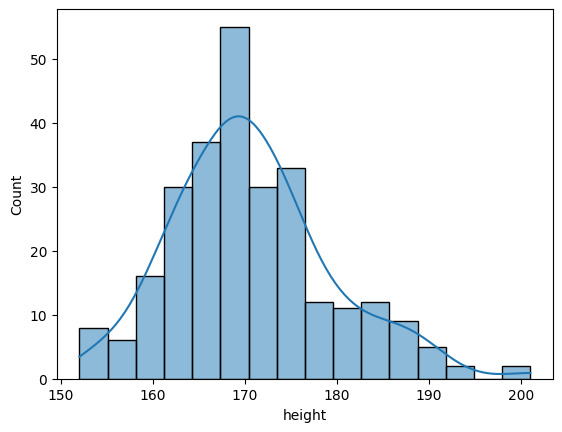

Non Normal


In [43]:
female_df_height = female_df['height']

sns.histplot(female_df_height, kde=True) # делаем ядерную оценку для показательной визуализации
plt.show()

# вычисляем значения тестов для последующей проверки на уровне значимости
fen_w, fem_p_value_sw = stats.shapiro(female_df_height)
fem_d, fem_p_value_ks = stats.kstest(female_df_height, 'norm')

if fem_p_value_sw > 0.05 and fem_p_value_ks > 0.05: # проверяем гипотезу о нормальности на уровне значимости 95%
    print("Normal")
else:
    print("Non Normal") 


**Распределения не является нормальными -> сгенерируем произвольное нормальное распределение и проведем тесты на нем.**

Сгенерируем различные нормальные распределения для наилучшего визуализирования результатов(стандартное нормальное, нормально с гауссовским и пуассоновскими шумами)

In [2]:
# инициализируем гауссовский и пуассоновский шумы
gaussian_noise = np.random.normal(loc=0, scale=0.8, size=5000)
poisson_noise = np.random.poisson(lam=5, size=5000) - 15

# Сгенерируем рандомное нормальное распределение и проверем тесты на нем.
standard_normal_df = np.random.normal(loc=0, scale=1, size=5000)
normal_with_gauss_noise = standard_normal_df + gaussian_noise
normal_with_poisson_noise = standard_normal_df + poisson_noise

**Для стандартного нормального распределения**

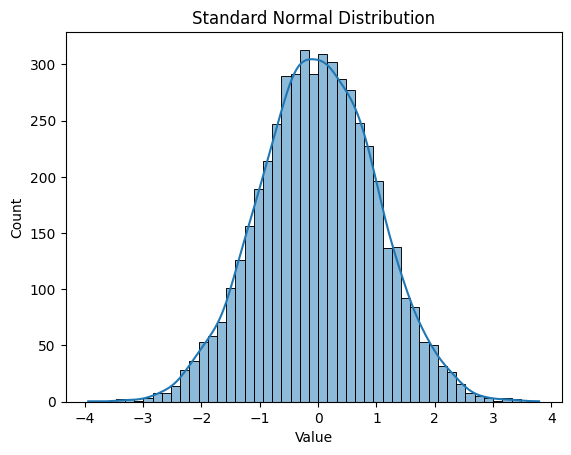

Normal


In [3]:
sns.histplot(standard_normal_df, kde=True)
plt.xlabel("Value")
plt.title("Standard Normal Distribution")
plt.show()

new_w, new_p_value_sw = stats.shapiro(standard_normal_df)
new_d, new_p_value_ks = stats.kstest(standard_normal_df, 'norm')

if new_p_value_sw > 0.05 and new_p_value_ks > 0.05:
    print("Normal")
else:
    print("Non Normal") 

**Тест Граббса — тест для обнаружения выбросов в наборе данных**. 

!!! Распределение должно быть нормальным !!!

Гипотезы:

**__Нулевая (H0)__** - Выбросов нет

**__Альтернативная (H1)__** - Выбросы есть


Таблица значений теста Граббса: [здесь](http://www.sediment.uni-goettingen.de/staff/dunkl/software/pep-grubbs.pdf)

$ G = \frac{\max(|x_i - \bar{x}|)}{\sqrt{Dx}}  $

Для подсчета p-value:

$p = 1 - \alpha$, где $ \alpha = \frac{(n-2)}{(n-1)G^2}$ 

Маленькое значение p-value сигнализирует о том, что нулевая гипотеза отвергается

In [46]:
# Функция: тест Грабса

def grubbs_test(x):
   n = len(x) # считаем длину выборки
   mean_x = np.mean(x) # среднее
   sd_x = np.std(x) # стандартное отклонение
   numerator = max(abs(x-mean_x)) # Считаем числитель по формуле
   g_calculated = numerator/sd_x # значение теста

   print("Grubbs Calculated Value:", g_calculated)

   t_value_1 = stats.t.ppf(1 - 0.05 / (2 * n), n - 2) # Функция процентной точки (обратная cdf)
   g_critical = ((n - 1) * np.sqrt(np.square(t_value_1))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value_1))) # считаем критическое значение(квантиль)

   print("Grubbs Critical Value:", g_critical, end='\n')
   
   # Считаем p-value
   p_value = 1 - (n - 2) / (g_critical ** 2 * (n - 1))
   print("P-Value:", p_value, end='\n')       
   
   if g_critical > g_calculated:
      print("H0: There are no outliers\n") # Выбросов нет
   else:
      print("H1: There are outliers\n") # Выбросы есть   

In [47]:
grubbs_test(standard_normal_df)

Grubbs Calculated Value: 4.14749040350393
Grubbs Critical Value: 4.4130862497609185
P-Value: 0.9486632602749596
H0: There are no outliers



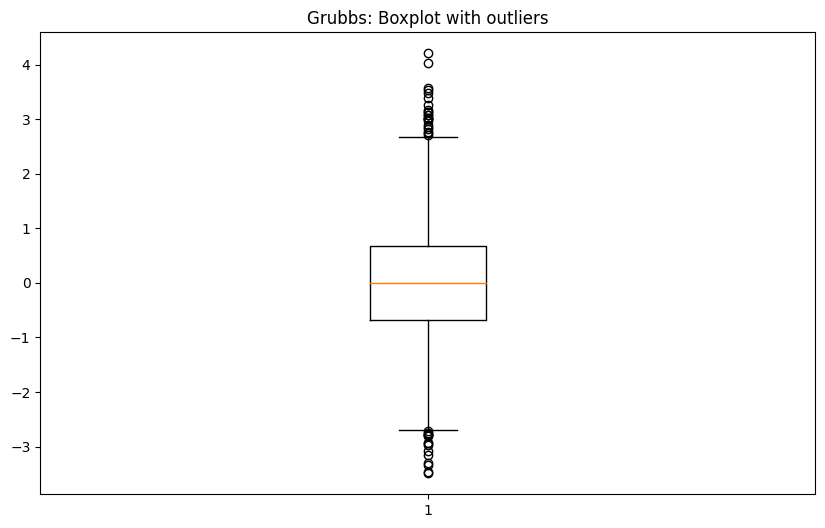

In [48]:
plt.figure(figsize=(10, 6))
plt.boxplot(standard_normal_df)
plt.title("Grubbs: Boxplot with outliers")
plt.show()

In [49]:
# Проверяем выбросы с помощью IQR
standard_normal_df = pd.Series(standard_normal_df)

Q1 = standard_normal_df.quantile(0.25)
Q3 = standard_normal_df.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = standard_normal_df[(standard_normal_df < lower_bound) | (standard_normal_df > upper_bound)]

print("Выбросы:\n{}\n".format(outliers))
print(standard_normal_df.shape)

Выбросы:
96      2.995977
206    -2.797715
543    -3.075085
1191    2.754872
1207    3.084101
1335    3.131713
1394    2.823829
1626    3.083739
1631    3.261855
1768    3.138717
1840   -2.786467
1940    2.854472
2026   -3.490801
2085    2.718192
2103   -2.968188
2370    2.896468
2616    3.472741
3583    3.571206
3654   -2.718603
3763    2.995325
3876   -2.779365
3948    3.542139
4159    2.763890
4200   -2.933141
4202    3.168827
4209   -2.935121
4381    3.017548
4394    3.020501
4424    4.026327
4542   -2.752775
4555   -2.813772
4680   -3.298366
4717    4.207891
4814    2.969767
4846    3.382192
4953   -3.147159
4962   -3.340066
4997   -3.475710
dtype: float64

(5000,)


(4962,)


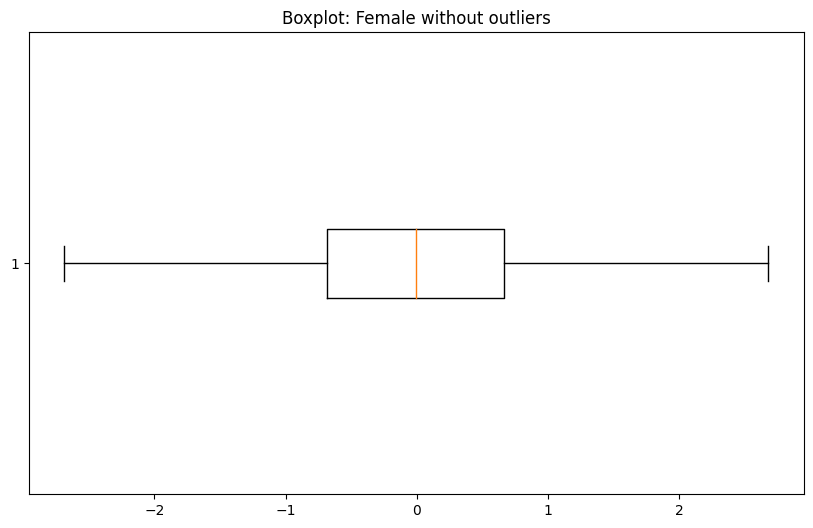

In [50]:
# Формируем датасет без выбросов и сравниваем
standard_normal_df_no_outliers = standard_normal_df[~standard_normal_df.index.isin(outliers.index)]
print(standard_normal_df_no_outliers.shape)

plt.figure(figsize=(10, 6))
plt.boxplot(x=standard_normal_df_no_outliers,vert=False)
plt.title("Boxplot: Female without outliers")
plt.show()


In [51]:
print("Данные с выбросами:\n", standard_normal_df, end="\n\n")
print("Данные без выбросов:\n", standard_normal_df_no_outliers, end="\n\n")

Данные с выбросами:
 0       0.889974
1       0.408300
2      -0.351111
3      -0.849829
4      -0.702339
          ...   
4995   -1.466337
4996   -2.067684
4997   -3.475710
4998   -0.018276
4999   -0.210451
Length: 5000, dtype: float64

Данные без выбросов:
 0       0.889974
1       0.408300
2      -0.351111
3      -0.849829
4      -0.702339
          ...   
4994   -0.313377
4995   -1.466337
4996   -2.067684
4998   -0.018276
4999   -0.210451
Length: 4962, dtype: float64



Вывод: _значения, полученные вне квартилей в начале являются выбросами_, причем при применении IQR остались точки, что может говорить о том, что изменилось распределение, следовательно поменялся диапазон, и выбросы поменялись.

**Q-Тест Диксона**

Требование: нормальное распределение и отсортированная во возрастанию значений выборка (эффективность теста на небольших размерах выборки 10-30)

Таблица значений Q-Теста Диксона: [здесь](https://guiok.github.io/download/dixon_q_test.pdf)

In [27]:
from scipy.stats import norm

# Функция: Q-Тест Диксона

def q_dixon_test(data): 
    n = len(data) # длина массива нужна для подсчета критического значения(квантиля)
    data_sorted = np.sort(data) # отсортировываем выборку
    Q = (data_sorted[1] - data_sorted[0]) / (data_sorted[-1] - data_sorted[0]) # высчитываем значение по формуле
    # Возьмем значение на уровне значимости 95%
    q1_crit_005 = 0.466 # для n = 10
    q2_crit_005 = 0.298 # для n = 30

    
    # Рассчет p-value через нормальное распределение
    print("Q Dixon's test:\n")
    # Тест 1: n = 10
    if n == 10:
        print("q1_crit_005:")
        if Q > q1_crit_005:
            z = (Q - q1_crit_005) / (1 / np.sqrt(n))
            print(f"p-value: {norm.cdf(z):.4f}")
            print("With 95%% confidence: {outlier} - is not an outlier".format(outlier=data_sorted[0]))
        else:
            z = (Q - q1_crit_005) / (1 / np.sqrt(n))
            print(f"p-value: {norm.cdf(z):.4f}")
            print("With 95%% confidence: {non_outlier} - is an outlier".format(non_outlier=data_sorted[0]))
            
    if n == 10:
        print("q2_crit_005:")
        if Q > q2_crit_005:
            z = (Q - q2_crit_005) / (1 / np.sqrt(n))
            print(f"p-value: {norm.cdf(z):.4f}")
            print("With 95%% confidence: {outlier} - is not an outlier".format(outlier=data_sorted[0]))
        else:
            z = (Q - q2_crit_005) / (1 / np.sqrt(n))
            print(f"p-value: {norm.cdf(z):.4f}")
            print("With 95%% confidence: {non_outlier} - is an outlier".format(non_outlier=data_sorted[0]))

        
    # Тест 2: n = 30
    if n >= 30:
        print("q1_crit_005:")
        if Q > q1_crit_005:
            z = (Q - q1_crit_005) / (1 / np.sqrt(n))
            print(f"p-value: {norm.cdf(z):.4f}")
            print("With 95%% confidence: {outlier} - is not an outlier".format(outlier=data_sorted[0]))
        else:
            z = (Q - q1_crit_005) / (1 / np.sqrt(n))
            print(f"p-value: {norm.cdf(z):.4f}")
            print("With 95%% confidence: {non_outlier} - is an outlier".format(non_outlier=data_sorted[0]))
    
      # Тест 2: n = 30
    if n >= 30:
        print("q2_crit_005:")
        if Q > q2_crit_005:
            z = (Q - q2_crit_005) / (1 / np.sqrt(n))
            print(f"p-value: {norm.cdf(z):.4f}")
            print("With 95%% confidence: {outlier} - is not an outlier".format(outlier=data_sorted[0]))
        else:
            z = (Q - q2_crit_005) / (1 / np.sqrt(n))
            print(f"p-value: {norm.cdf(z):.4f}")
            print("With 95%% confidence: {non_outlier} - is an outlier".format(non_outlier=data_sorted[0]))

    return Q

In [28]:
print("Test1:\n")
print(f"Q-value: {q_dixon_test(standard_normal_df[:10])}\n")
print("Test2:\n")
print(f"Q-value: {q_dixon_test(standard_normal_df[:30])}\n")

Test1:

Q Dixon's test:

q1_crit_005:
p-value: 0.0869
With 95%% confidence: -1.8715438523817087 - is an outlier
q2_crit_005:
p-value: 0.2036
With 95%% confidence: -1.8715438523817087 - is an outlier
Q-value: 0.03590564764829517

Test2:

Q Dixon's test:

q1_crit_005:
p-value: 0.0092
With 95%% confidence: -1.8715438523817087 - is an outlier
q2_crit_005:
p-value: 0.0756
With 95%% confidence: -1.8715438523817087 - is an outlier
Q-value: 0.03590564764829517



In [29]:
print("Test3:\n")
print(f"Q-value: {q_dixon_test(standard_normal_df)}\n")

Test3:

Q Dixon's test:

q1_crit_005:
p-value: 0.0000
With 95%% confidence: -3.939149955733508 - is an outlier
q2_crit_005:
p-value: 0.0000
With 95%% confidence: -3.939149955733508 - is an outlier
Q-value: 0.0740514384155809



In [55]:
sub_df = pd.DataFrame(sorted(standard_normal_df[:10]))
sub_df

,0
0,-0.849829
1,-0.702339
2,-0.581508
3,-0.502169
4,-0.351111
5,-0.323643
6,0.189722
7,0.408300
8,0.889974
9,1.174311


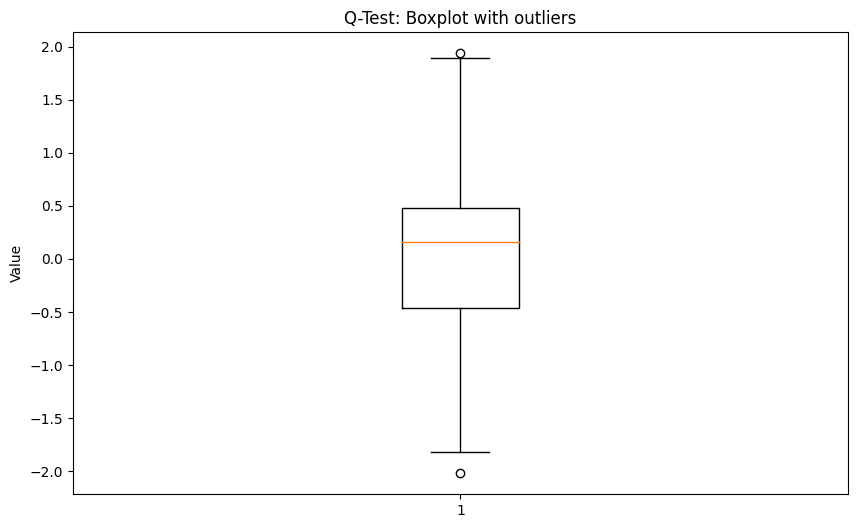

In [56]:
plt.figure(figsize=(10, 6))
plt.boxplot(standard_normal_df[:30])
plt.title("Q-Test: Boxplot with outliers")
plt.ylabel("Value")
plt.show()

**По аналогии проведем те же самые действия для нормальных распределений с шумами** 

**Нормальное распределение с гауссовским шумом**

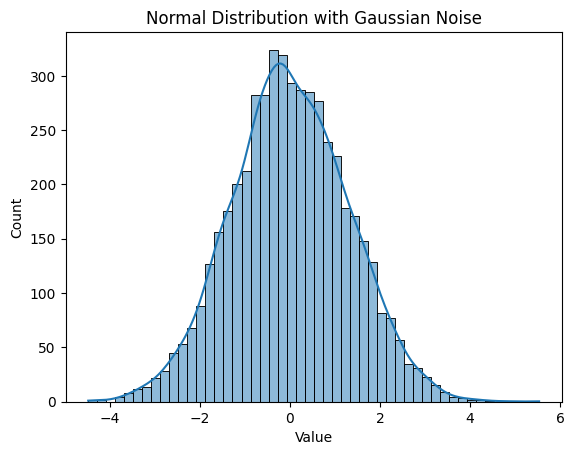

In [57]:
sns.histplot(normal_with_gauss_noise, kde=True)
plt.title("Normal Distribution with Gaussian Noise")
plt.xlabel("Value")
plt.show()

In [58]:
grubbs_test(normal_with_gauss_noise)

Grubbs Calculated Value: 4.272443599217262
Grubbs Critical Value: 4.4130862497609185
P-Value: 0.9486632602749596
H0: There are no outliers



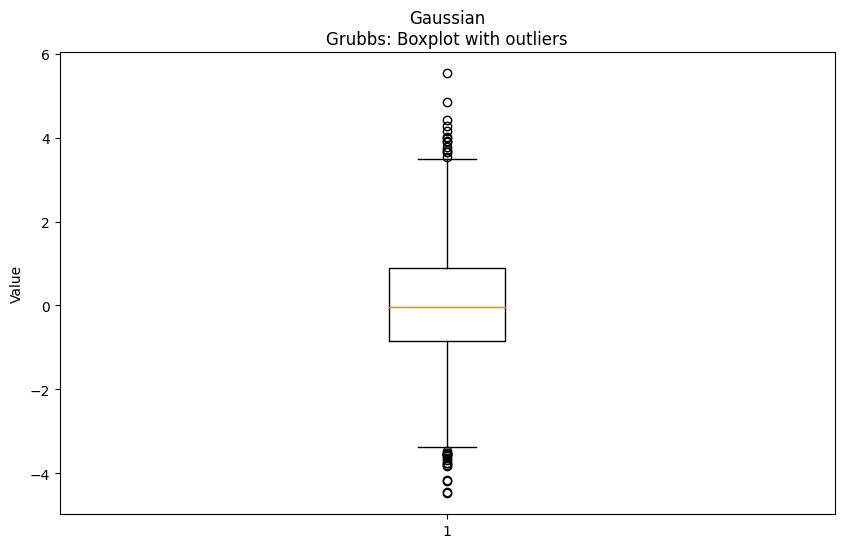

In [59]:
plt.figure(figsize=(10, 6))
plt.boxplot(normal_with_gauss_noise)
plt.title("Gaussian\nGrubbs: Boxplot with outliers")
plt.ylabel("Value")
plt.show()

In [60]:
print("Test1:\n")
print(f"Q-value: {q_dixon_test(normal_with_gauss_noise[:10])}\n")
print("Test2:\n")
print(f"Q-value: {q_dixon_test(normal_with_gauss_noise[:30])}\n")

Test1:

With 95%% confidence: -1.7685773712057682 - is not an outlier
Q-value: 0.15051126947598636

Test2:

With 95%% confidence: -3.0212478964240654 - is not an outlier
Q-value: 0.16366418245341838



In [61]:
print("Test3:\n")
print(f"Q-value: {q_dixon_test(normal_with_gauss_noise)}\n")

Test3:

With 95%% confidence: -4.477575574262317 - is not an outlier
Q-value: 0.002814757585122067



In [62]:
sub_df = pd.DataFrame(sorted(normal_with_gauss_noise[:10]))
sub_df

,0
0,-1.768577
1,-1.329845
2,-0.891824
3,-0.742236
4,-0.144208
5,-0.113813
6,-0.073627
7,0.482400
8,0.733811
9,1.146369


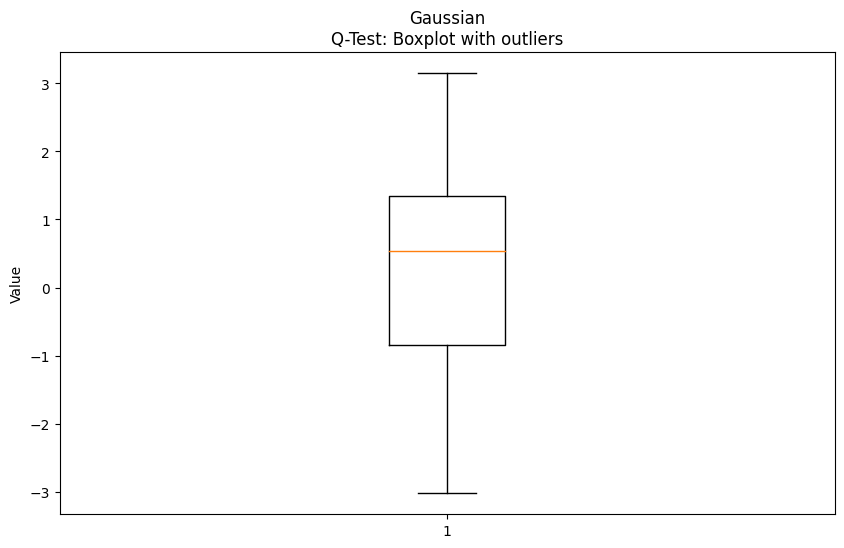

In [63]:
plt.figure(figsize=(10, 6))
plt.boxplot(normal_with_gauss_noise[:30])
plt.title("Gaussian\nQ-Test: Boxplot with outliers")
plt.ylabel("Value")
plt.show()

_Проверяем шумы вне квартильных диапазонов_

In [64]:
# Проверяем выбросы с помощью IQR
normal_with_gauss_noise = pd.Series(normal_with_gauss_noise)

Q1 = normal_with_gauss_noise.quantile(0.25)
Q3 = normal_with_gauss_noise.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = normal_with_gauss_noise[(normal_with_gauss_noise < lower_bound) | (normal_with_gauss_noise > upper_bound)]

print("Выбросы:\n{}\n".format(outliers))
print(normal_with_gauss_noise.shape)

Выбросы:
331    -4.165696
596     4.151614
743    -3.472772
1004   -4.176340
1440    3.547265
1507   -3.759557
1626    4.848736
1840   -3.583120
1941    3.771848
2014   -3.630890
2026   -4.477576
2085    3.648504
2224   -3.536312
2378   -3.564122
2562   -3.551377
2620   -3.755319
3107    3.667733
3159   -3.813896
3260    3.716685
3976    3.920039
4017   -3.529500
4042   -3.519595
4046    3.897126
4138   -3.675885
4159    3.991282
4381    4.016522
4424    4.419037
4566   -3.835082
4680   -4.449390
4717    4.290526
4846    5.535896
dtype: float64

(5000,)


(4969,)


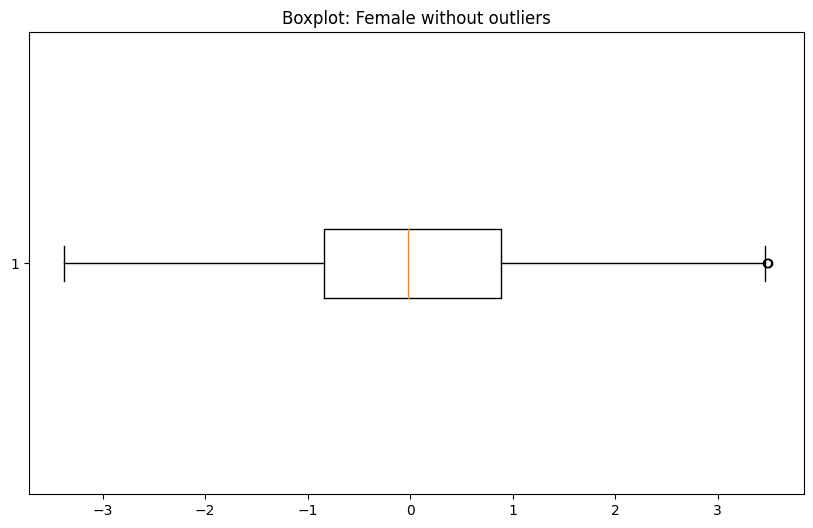

In [65]:
# Формируем датасет без выбросов и сравниваем
normal_with_gauss_noise_no_outliers = normal_with_gauss_noise[~normal_with_gauss_noise.index.isin(outliers.index)]
print(normal_with_gauss_noise_no_outliers.shape)

plt.figure(figsize=(10, 6))
plt.boxplot(x=normal_with_gauss_noise_no_outliers,vert=False)
plt.title("Boxplot: Female without outliers")
plt.show()


In [66]:
print("Данные с выбросами:\n", normal_with_gauss_noise, end="\n\n")
print("Данные без выбросов:\n", normal_with_gauss_noise_no_outliers, end="\n\n")

Данные с выбросами:
 0      -0.113813
1       0.733811
2      -0.073627
3      -1.329845
4      -0.742236
          ...   
4995   -2.358554
4996   -1.518030
4997   -3.149149
4998    0.692720
4999   -1.039359
Length: 5000, dtype: float64

Данные без выбросов:
 0      -0.113813
1       0.733811
2      -0.073627
3      -1.329845
4      -0.742236
          ...   
4995   -2.358554
4996   -1.518030
4997   -3.149149
4998    0.692720
4999   -1.039359
Length: 4969, dtype: float64



Вывод: _значения, полученные вне квартилей в начале являются выбросами_, причем при применении IQR остались точки, что может говорить о том, что изменилось распределение, следовательно поменялся диапазон, и выбросы поменялись.

**Нормальное распределение с пуассоновским шумом**

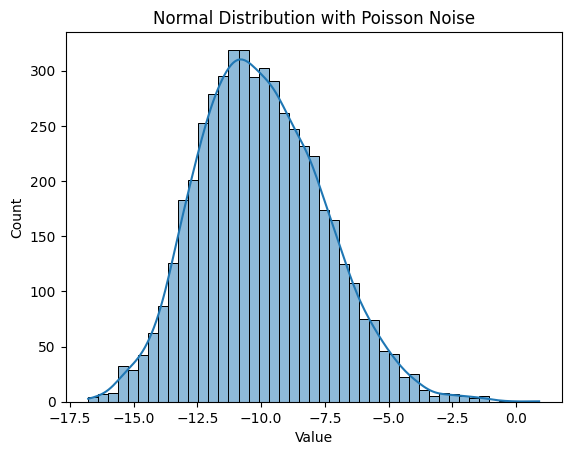

In [67]:
sns.histplot(normal_with_poisson_noise, kde=True)
plt.title("Normal Distribution with Poisson Noise")
plt.xlabel("Value")
plt.show()

In [68]:
grubbs_test(normal_with_poisson_noise)

Grubbs Calculated Value: 4.438042013862411
Grubbs Critical Value: 4.4130862497609185
P-Value: 0.9486632602749596
H1: There are outliers



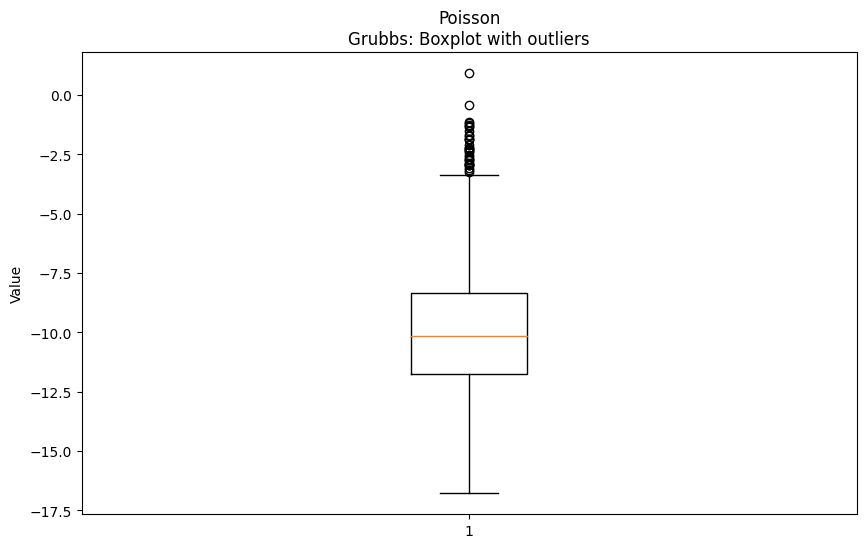

In [69]:
plt.figure(figsize=(10, 6))
plt.boxplot(normal_with_poisson_noise)
plt.title("Poisson\nGrubbs: Boxplot with outliers")
plt.ylabel("Value")
plt.show()

In [70]:
print("Test1:\n")
print(f"Q-value: {q_dixon_test(normal_with_poisson_noise[:10])}\n")
print("Test2:\n")
print(f"Q-value: {q_dixon_test(normal_with_poisson_noise[:30])}\n")

Test1:

With 95%% confidence: -11.502168535236944 - is not an outlier
Q-value: 0.16296572021139907

Test2:

With 95%% confidence: -13.659940964515457 - is not an outlier
Q-value: 0.0678569354895355



In [71]:
print("Test3:\n")
print(f"Q-value: {q_dixon_test(normal_with_poisson_noise)}\n")

Test3:

With 95%% confidence: -16.781091303174914 - is not an outlier
Q-value: 0.003543549274058105



In [72]:
sub_df = pd.DataFrame(sorted(normal_with_poisson_noise[:10]))
sub_df

,0
0,-11.502169
1,-10.825689
2,-10.702339
3,-10.581508
4,-9.323643
5,-8.849829
6,-8.810278
7,-8.110026
8,-7.591700
9,-7.351111


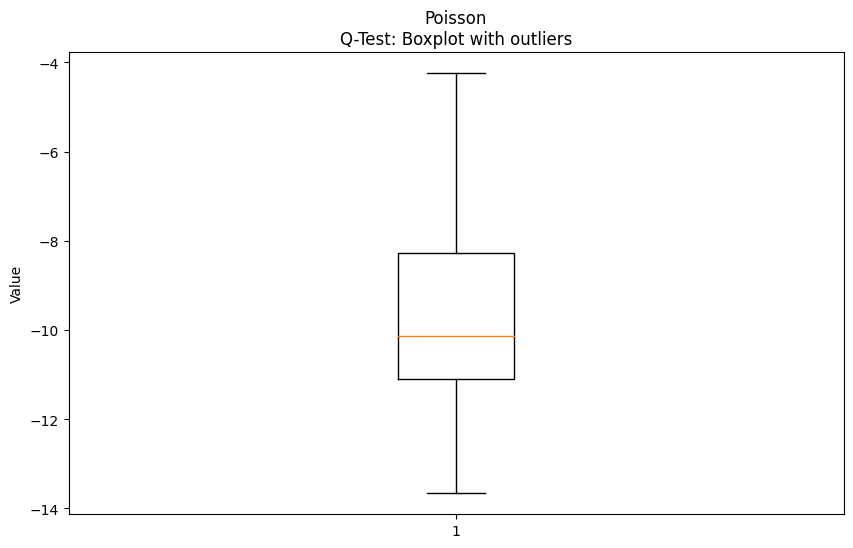

In [73]:
plt.figure(figsize=(10, 6))
plt.boxplot(normal_with_poisson_noise[:30])
plt.title("Poisson\nQ-Test: Boxplot with outliers")
plt.ylabel("Value")
plt.show()

In [74]:
# Проверяем выбросы с помощью IQR
normal_with_poisson_noise = pd.Series(normal_with_poisson_noise)

Q1 = normal_with_poisson_noise.quantile(0.25)
Q3 = normal_with_poisson_noise.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = normal_with_poisson_noise[(normal_with_poisson_noise < lower_bound) | (normal_with_poisson_noise > upper_bound)]

print("Выбросы:\n{}\n".format(outliers))
print(normal_with_poisson_noise.shape)

Выбросы:
72     -1.853420
718    -2.974909
767    -2.875748
822    -1.861228
1090   -1.124332
1160   -2.750154
1227   -0.428641
1553   -1.317384
1558   -2.221553
1664   -2.128354
1794   -1.724872
1897   -1.517977
1940   -3.145528
2007   -3.232535
2085   -2.281808
2241   -2.688842
2259   -1.251651
2300   -2.601458
2411   -2.308088
2780   -2.967029
3095   -2.242647
3235   -2.727869
3302   -2.548433
3678   -3.095585
3867   -1.889209
3868   -2.394891
3869   -1.356656
4354   -2.350155
4424   -2.973673
4592   -1.683133
4705   -2.902903
4854    0.906861
4958   -1.195591
dtype: float64

(5000,)


(4967,)


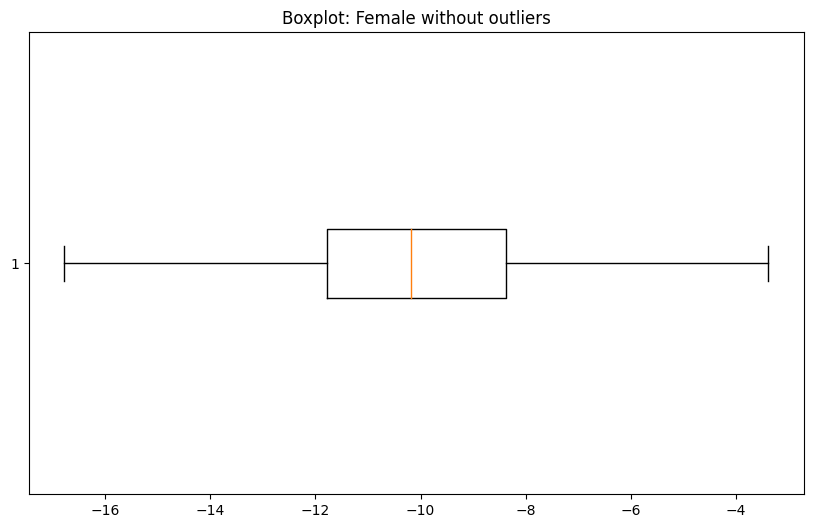

In [75]:
# Формируем датасет без выбросов и сравниваем
normal_with_poisson_noise_no_outliers = normal_with_poisson_noise[~normal_with_poisson_noise.index.isin(outliers.index)]
print(normal_with_poisson_noise_no_outliers.shape)

plt.figure(figsize=(10, 6))
plt.boxplot(x=normal_with_poisson_noise_no_outliers,vert=False)
plt.title("Boxplot: Female without outliers")
plt.show()


In [76]:
print("Данные с выбросами:\n", normal_with_poisson_noise, end="\n\n")
print("Данные без выбросов:\n", normal_with_poisson_noise_no_outliers, end="\n\n")

Данные с выбросами:
 0       -8.110026
1       -7.591700
2       -7.351111
3       -8.849829
4      -10.702339
          ...    
4995   -15.466337
4996   -12.067684
4997   -16.475710
4998    -9.018276
4999    -8.210451
Length: 5000, dtype: float64

Данные без выбросов:
 0       -8.110026
1       -7.591700
2       -7.351111
3       -8.849829
4      -10.702339
          ...    
4995   -15.466337
4996   -12.067684
4997   -16.475710
4998    -9.018276
4999    -8.210451
Length: 4967, dtype: float64



Вывод: _значения, полученные вне квартилей в начале являются выбросами_, причем при применении IQR остались точки, что может говорить о том, что изменилось распределение, следовательно поменялся диапазон, и выбросы поменялись.

## 5. Пропуски и сравнение изначальных значений с новыми(с пропусками)

**Вернемся к изначальному датасету про спортсменов и искусственно добавим пропуски**

Далее заполняем исскуственно значения (средним, модой, медианой) и проведем сравнение.

In [77]:
df.info() # Текущая информация по всему датасету

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 24 to 29999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   athlete_id     973 non-null    int64  
 1   name           973 non-null    object 
 2   sex            973 non-null    object 
 3   born           973 non-null    object 
 4   height         973 non-null    float64
 5   weight         973 non-null    float64
 6   country        973 non-null    object 
 7   country_noc    973 non-null    object 
 8   description    973 non-null    object 
 9   special_notes  973 non-null    object 
 10  sport          973 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 91.2+ KB


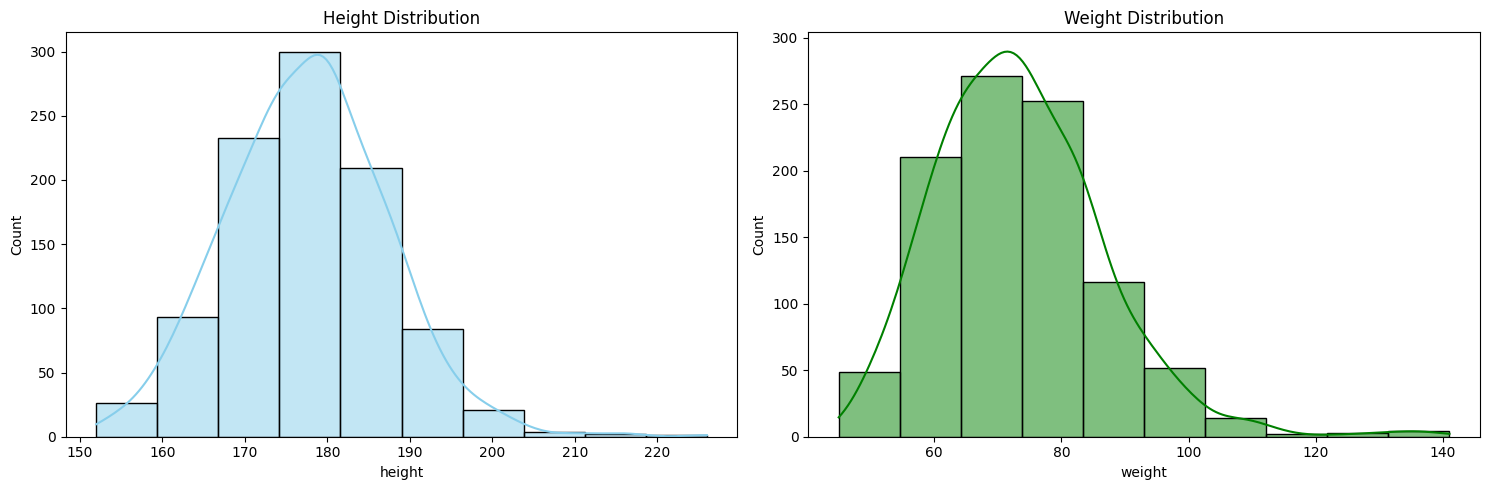

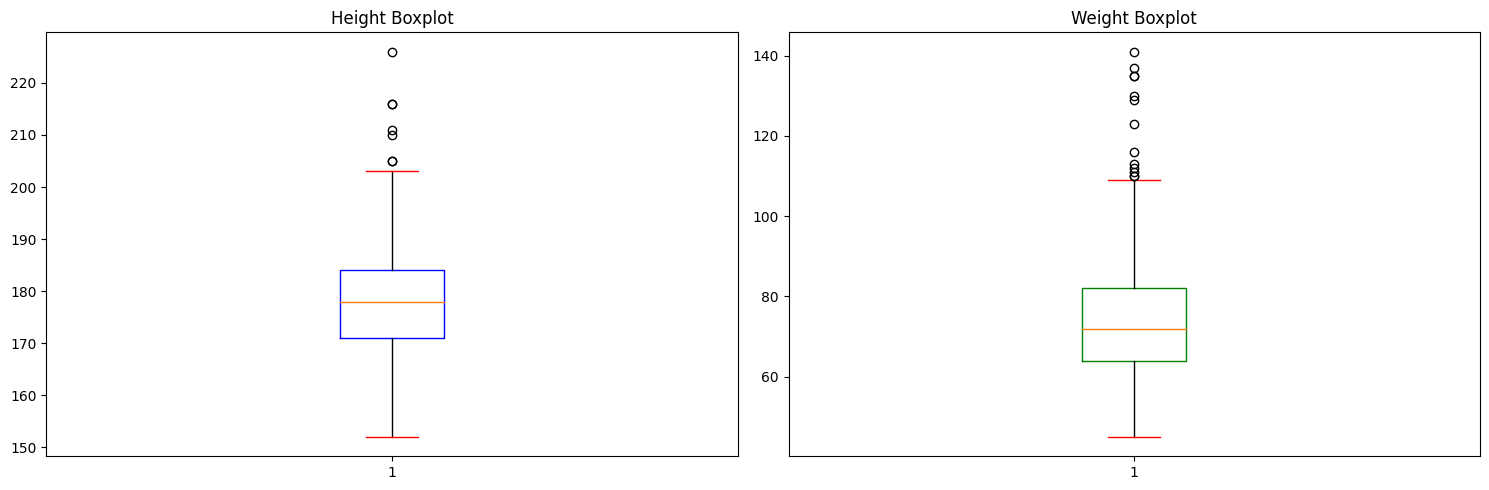

In [79]:
# Создание фигуры и осей для подграфиков 

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
# Гистограмма для height

sns.histplot(df['height'], bins=10, kde=True, color='skyblue', ax=axes[0]) 
axes[0].set_title('Height Distribution') 

# Гистограмма для weight 
sns.histplot(df['weight'], bins=10, kde=True, color='green', ax=axes[1]) 
axes[1].set_title('Weight Distribution') 

# Отображение графиков 
plt.tight_layout() 
plt.show()

# Коробки с выбросами
fig1, axes1 = plt.subplots(1, 2, figsize=(15, 5))
axes1[0].boxplot(df['height'], boxprops=dict(color='blue'), capprops=dict(color='red'))
axes1[0].set_title("Height Boxplot") 

axes1[1].boxplot(df['weight'], boxprops=dict(color='green'), capprops=dict(color='red'))
axes1[1].set_title("Weight Boxplot") 

plt.tight_layout() 
plt.show()

In [80]:
# Подсчитываем значения оригинальной таблицы для дальнейшего заполнения пропусков

df.describe()
orig_mean_h = df['height'].mean()
orig_mean_w = df['weight'].mean()
orig_mode_h = df['height'].mode()
orig_mode_w = df['weight'].mode()
orig_median_h = df['height'].median()
orig_median_w = df['weight'].median()

In [81]:
print("Среднее роста:", orig_mean_h)
print("Среднее веса:", orig_mean_w)
print("Мода высоты:", orig_mode_h)
print("Мода веса:", orig_mode_h)
print("Медиана высоты:", orig_median_h)
print("Медиана веса:", orig_median_w)

Среднее роста: 177.6217882836588
Среднее веса: 73.43782117163413
Мода высоты: 0    180.0
Name: height, dtype: float64
Мода веса: 0    180.0
Name: height, dtype: float64
Медиана высоты: 178.0
Медиана веса: 72.0


__**Тест 1**__ - среднее

In [82]:
# Создадим копии, в которые будем добавлять пропуски
from copy import deepcopy

f1_df = deepcopy(df)
f2_df = deepcopy(df)

df.describe()

,athlete_id,height,weight
count,9.730000e+02,973.000000,973.000000
mean,6.224677e+04,177.621788,73.437821
std,5.969695e+04,9.799892,13.297772
min,3.000000e+00,152.000000,45.000000
25%,2.651800e+04,171.000000,64.000000
50%,6.619400e+04,178.000000,72.000000
75%,8.621500e+04,184.000000,82.000000
max,1.005221e+06,226.000000,141.000000


In [83]:
# Добавляем вручную случайным образом пропуски.
nan_indices_to_height1 = np.random.choice(f1_df.index, 1600)
nan_indices_to_id1 = np.random.choice(f1_df.index, 200000)
nan_indices_to_weight1 = np.random.choice(f1_df.index, 3000)

# Заполняем столбцы пустыми значениями(пропусками)
f1_df.loc[nan_indices_to_height1, 'height'] = np.nan

In [84]:
f1_df.isnull().sum() # Информация о добавленных пропусках

athlete_id         0
name               0
sex                0
born               0
height           770
weight             0
country            0
country_noc        0
description        0
special_notes      0
sport              0
dtype: int64

In [85]:
f1_df.describe() # Изменение значений после добавления пропусков

,athlete_id,height,weight
count,9.730000e+02,203.000000,973.000000
mean,6.224677e+04,177.359606,73.437821
std,5.969695e+04,10.143219,13.297772
min,3.000000e+00,153.000000,45.000000
25%,2.651800e+04,169.500000,64.000000
50%,6.619400e+04,178.000000,72.000000
75%,8.621500e+04,185.000000,82.000000
max,1.005221e+06,203.000000,141.000000


**Строим график после внесения пропусков**

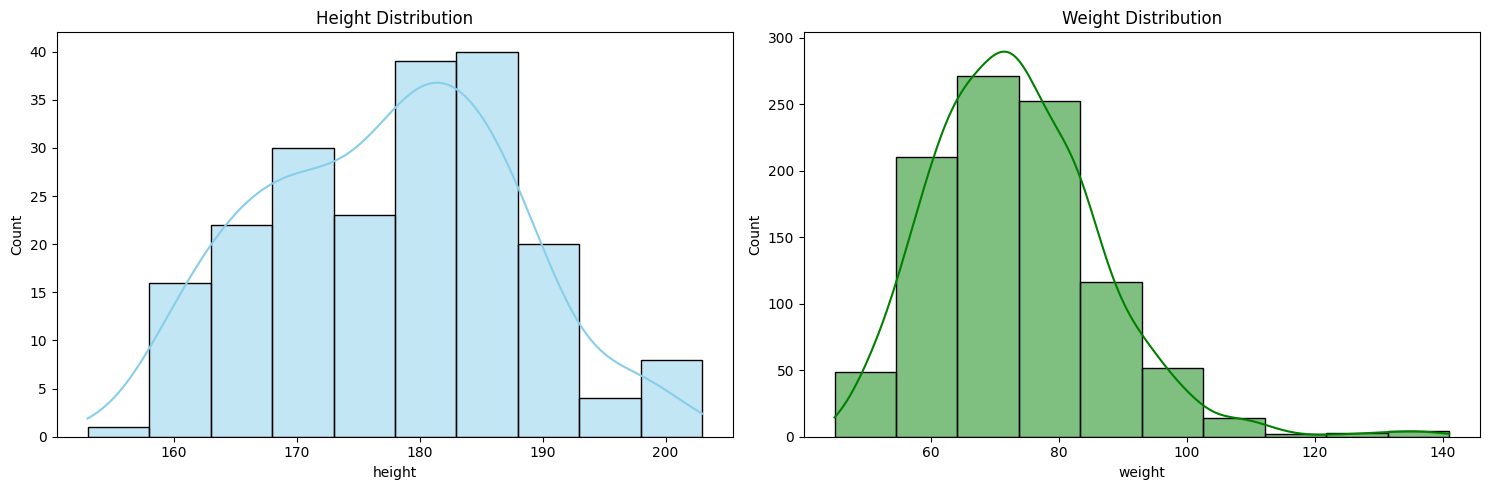

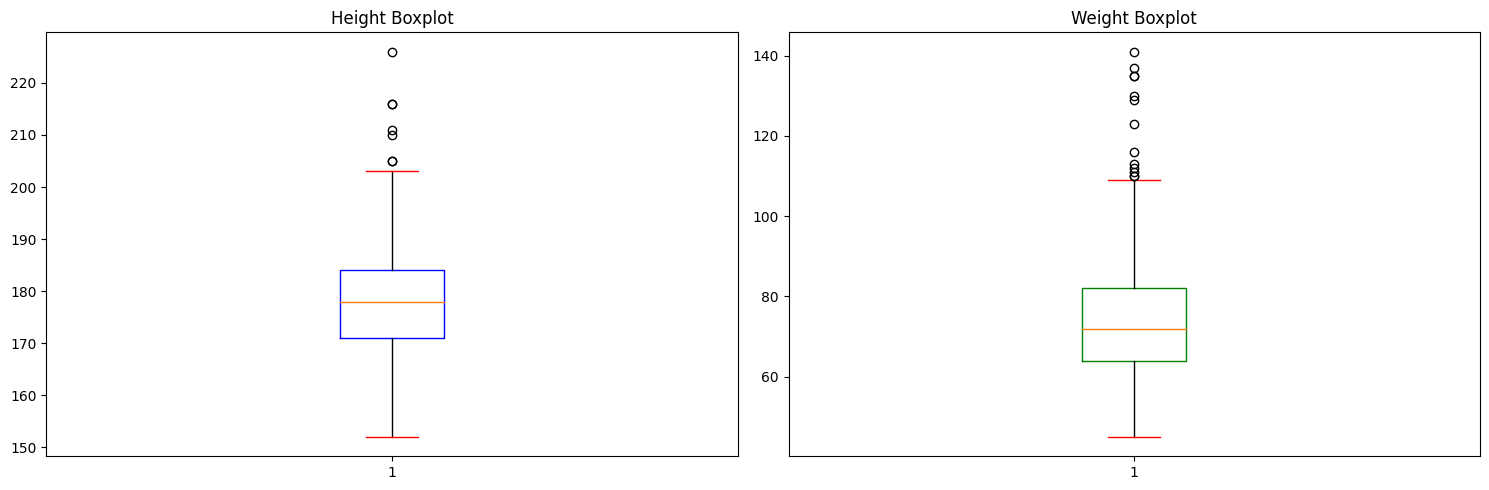

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
# Гистограмма для height

sns.histplot(f1_df['height'], bins=10, kde=True, color='skyblue', ax=axes[0]) 
axes[0].set_title('Height Distribution') 

# Гистограмма для weight 
sns.histplot(f1_df['weight'], bins=10, kde=True, color='green', ax=axes[1]) 
axes[1].set_title('Weight Distribution') 

# Отображение графиков 
plt.tight_layout() 
plt.show()

# Рисуем коробки с выбросами
fig1, axes1 = plt.subplots(1, 2, figsize=(15, 5))
axes1[0].boxplot(df['height'], boxprops=dict(color='blue'), capprops=dict(color='red'))
axes1[0].set_title("Height Boxplot") 

axes1[1].boxplot(df['weight'], boxprops=dict(color='green'), capprops=dict(color='red'))
axes1[1].set_title("Weight Boxplot") 

plt.tight_layout() 
plt.show()

In [ ]:
# Заполняем пропуска в первом случае средним и сравниваем с изначальным

f1_new_df = f1_df.fillna(orig_mean_h)
f1_new_df.isnull().sum(), f1_df.describe()

(athlete_id       0
 name             0
 sex              0
 born             0
 height           0
 weight           0
 country          0
 country_noc      0
 description      0
 special_notes    0
 sport            0
 dtype: int64,
          athlete_id      height      weight
 count  9.730000e+02  178.000000  973.000000
 mean   6.224677e+04  177.820225   73.437821
 std    5.969695e+04    9.079762   13.297772
 min    3.000000e+00  153.000000   45.000000
 25%    2.651800e+04  172.000000   64.000000
 50%    6.619400e+04  178.000000   72.000000
 75%    8.621500e+04  183.750000   82.000000
 max    1.005221e+06  210.000000  141.000000)

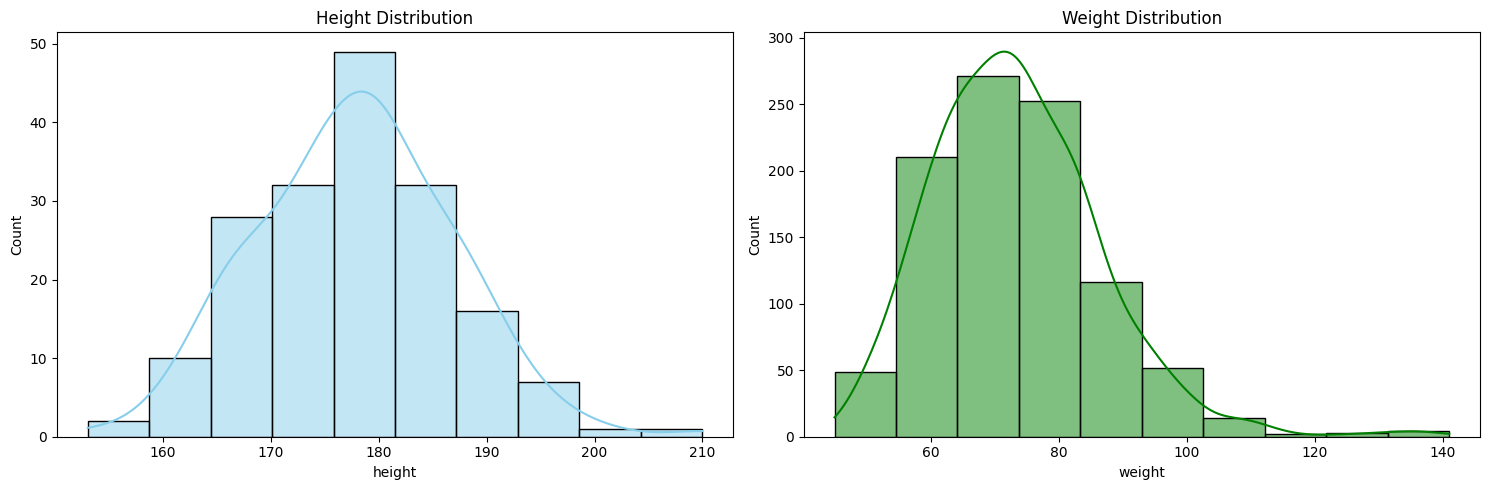

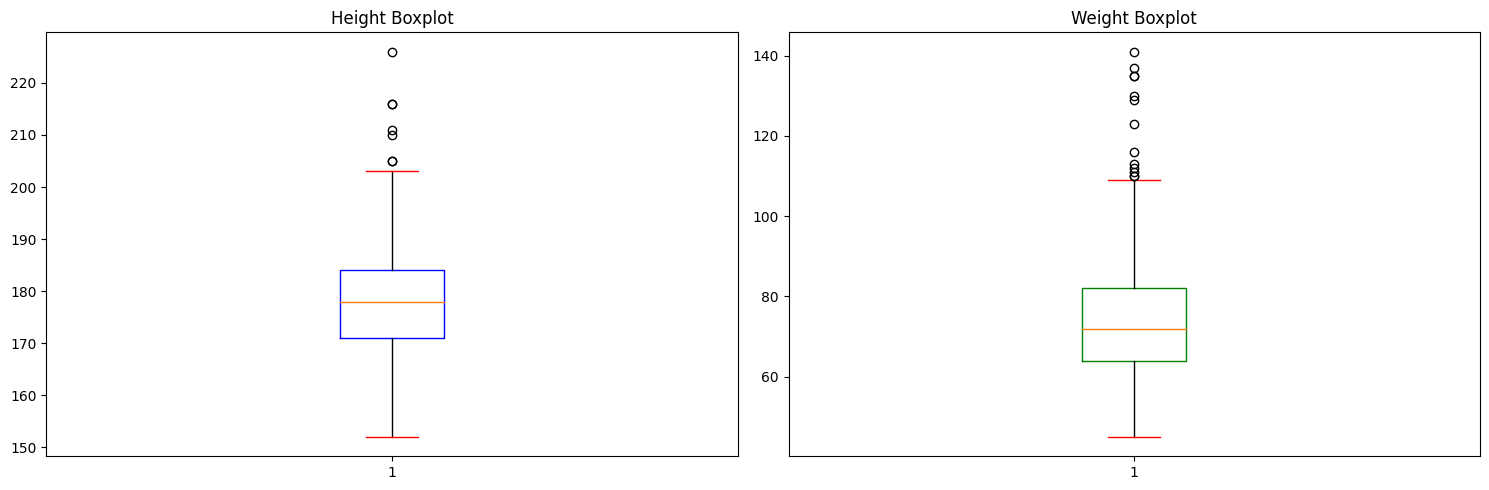

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
# Гистограмма для height

sns.histplot(f1_df['height'], bins=10, kde=True, color='skyblue', ax=axes[0]) 
axes[0].set_title('Height Distribution') 

# Гистограмма для weight 
sns.histplot(f1_df['weight'], bins=10, kde=True, color='green', ax=axes[1]) 
axes[1].set_title('Weight Distribution') 

# Отображение графиков 
plt.tight_layout() 
plt.show()

# Рисуем коробки с выбросами
fig1, axes1 = plt.subplots(1, 2, figsize=(15, 5))
axes1[0].boxplot(df['height'], boxprops=dict(color='blue'), capprops=dict(color='red'))
axes1[0].set_title("Height Boxplot") 

axes1[1].boxplot(df['weight'], boxprops=dict(color='green'), capprops=dict(color='red'))
axes1[1].set_title("Weight Boxplot") 

plt.tight_layout() 
plt.show()

In [ ]:
# Заполняем пропуски в другой столбец
f1_new_df.loc[nan_indices_to_weight1, 'weight'] = np.nan
f1_new_df.isnull().sum()

athlete_id         0
name               0
sex                0
born               0
height             0
weight           924
country            0
country_noc        0
description        0
special_notes      0
sport              0
dtype: int64

In [ ]:
# Заполнили пропуски объема средним
f1_new_df.fillna(orig_mean_w, inplace=True)
f1_new_df.describe()

,athlete_id,height,weight
count,9.730000e+02,973.000000,973.000000
mean,6.224677e+04,177.658090,73.376718
std,5.969695e+04,3.875370,2.596895
min,3.000000e+00,153.000000,50.000000
25%,2.651800e+04,177.621788,73.437821
50%,6.619400e+04,177.621788,73.437821
75%,8.621500e+04,177.621788,73.437821
max,1.005221e+06,210.000000,99.000000


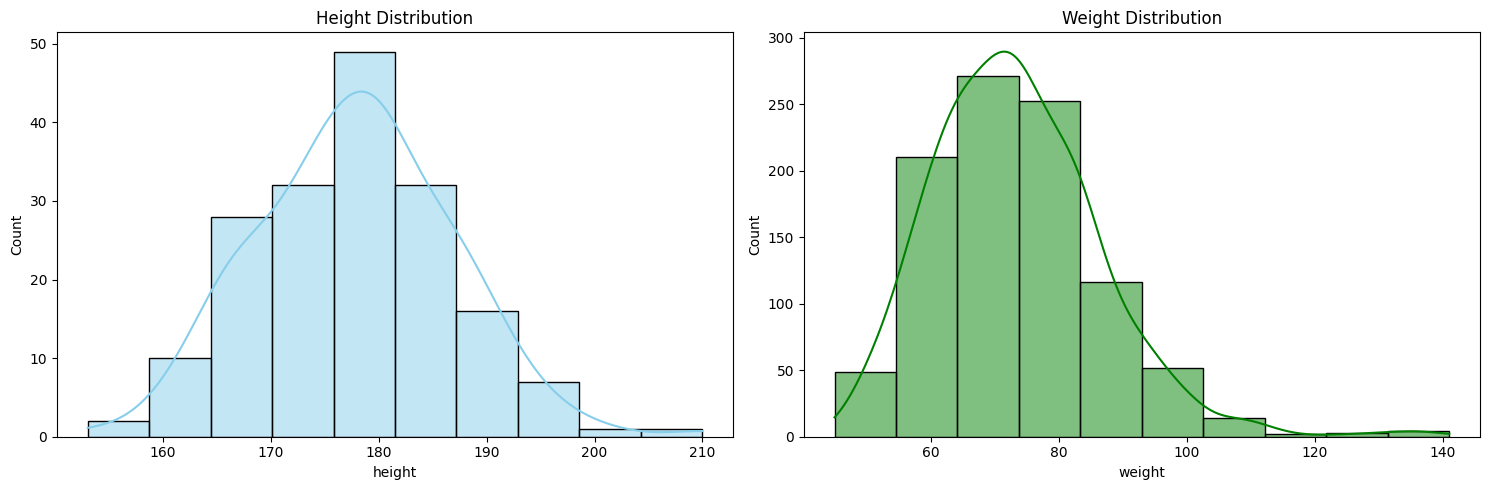

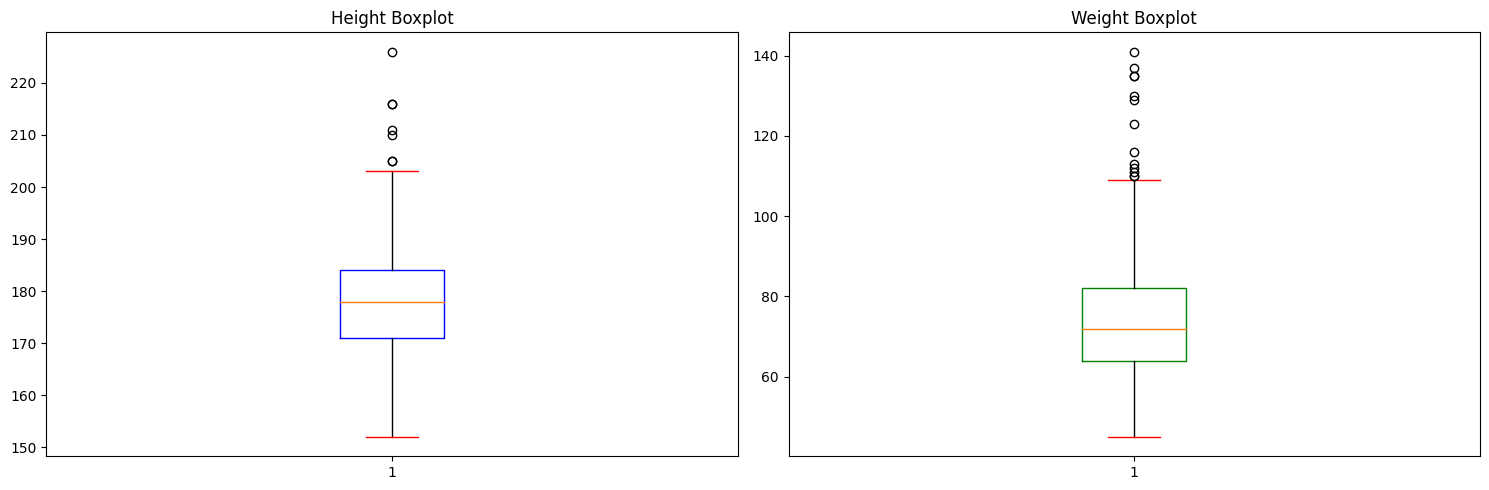

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
# Гистограмма для height

sns.histplot(f1_df['height'], bins=10, kde=True, color='skyblue', ax=axes[0]) 
axes[0].set_title('Height Distribution') 

# Гистограмма для weight 
sns.histplot(f1_df['weight'], bins=10, kde=True, color='green', ax=axes[1]) 
axes[1].set_title('Weight Distribution') 

# Отображение графиков 
plt.tight_layout() 
plt.show()

# Коробки
fig1, axes1 = plt.subplots(1, 2, figsize=(15, 5))
axes1[0].boxplot(df['height'], boxprops=dict(color='blue'), capprops=dict(color='red'))
axes1[0].set_title("Height Boxplot") 

axes1[1].boxplot(df['weight'], boxprops=dict(color='green'), capprops=dict(color='red'))
axes1[1].set_title("Weight Boxplot") 

plt.tight_layout() 
plt.show()

__**Тест 2**__ - медиана

In [ ]:
f2_df.describe() # Значения до пропусков

,athlete_id,height,weight
count,9.730000e+02,973.000000,973.000000
mean,6.224677e+04,177.621788,73.437821
std,5.969695e+04,9.799892,13.297772
min,3.000000e+00,152.000000,45.000000
25%,2.651800e+04,171.000000,64.000000
50%,6.619400e+04,178.000000,72.000000
75%,8.621500e+04,184.000000,82.000000
max,1.005221e+06,226.000000,141.000000


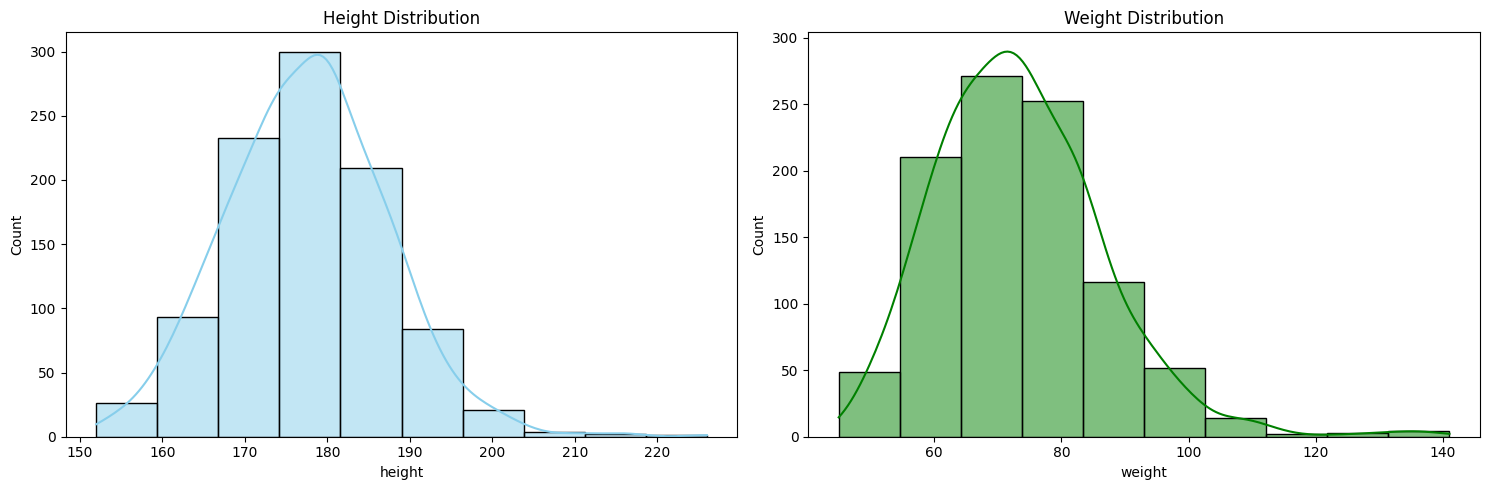

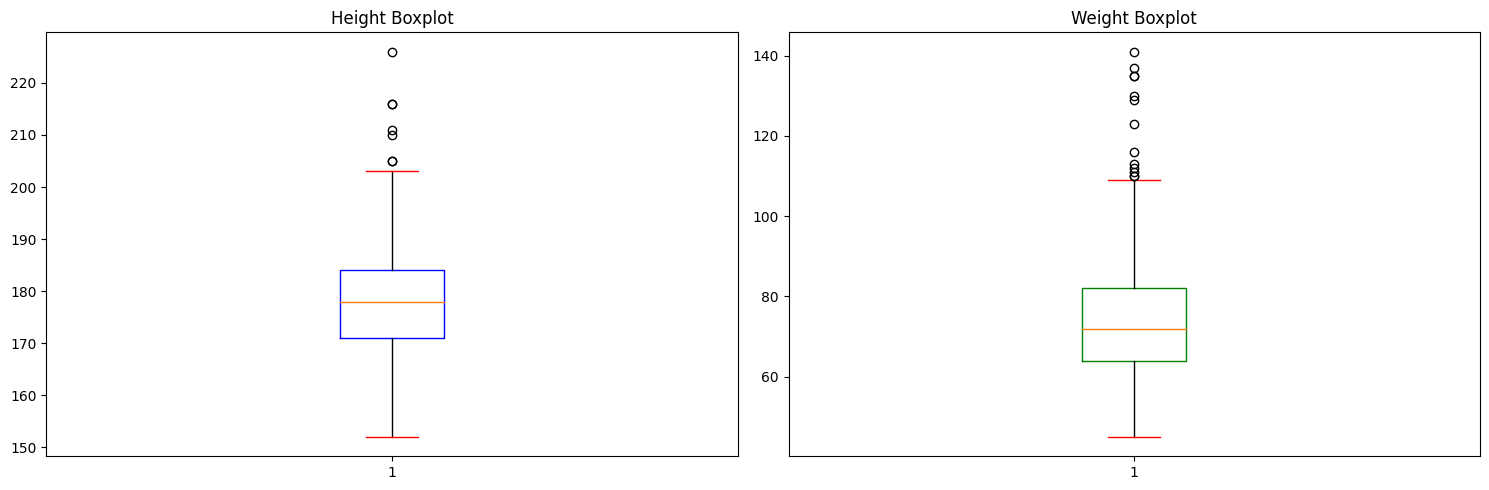

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
# Гистограмма для height

sns.histplot(f2_df['height'], bins=10, kde=True, color='skyblue', ax=axes[0]) 
axes[0].set_title('Height Distribution') 

# Гистограмма для weight 
sns.histplot(f2_df['weight'], bins=10, kde=True, color='green', ax=axes[1]) 
axes[1].set_title('Weight Distribution') 

# Отображение графиков 
plt.tight_layout()
plt.show()

fig1, axes1 = plt.subplots(1, 2, figsize=(15, 5))
axes1[0].boxplot(df['height'], boxprops=dict(color='blue'), capprops=dict(color='red'))
axes1[0].set_title("Height Boxplot") 

axes1[1].boxplot(df['weight'], boxprops=dict(color='green'), capprops=dict(color='red'))
axes1[1].set_title("Weight Boxplot") 

plt.tight_layout() 
plt.show()

In [ ]:
# Добавляем вручную случайным образом пропуски.

nan_indices_to_height2 = np.random.choice(f1_df.index, 10000)
nan_indices_to_id2 = np.random.choice(f1_df.index, 5000)
nan_indices_to_weight2 = np.random.choice(f1_df.index, 7500)

# Заполняем столбцы пустыми значениями(пропусками)
f2_df.loc[nan_indices_to_height2, 'height'] = np.nan
f2_df.loc[nan_indices_to_id2, 'athlete_id'] = np.nan
f2_df.loc[nan_indices_to_height2, 'weight'] = np.nan

In [ ]:
f2_df.isnull().sum() # Информация о добавленных пропусках

athlete_id       968
name               0
sex                0
born               0
height           973
weight           973
country            0
country_noc        0
description        0
special_notes      0
sport              0
dtype: int64

In [ ]:
f2_df.describe() # Изменение значений после добавления пропусков

,athlete_id,height,weight
count,5.000000,0.0,0.0
mean,62331.200000,NaN,NaN
std,23314.078798,NaN,NaN
min,27103.000000,NaN,NaN
25%,51529.000000,NaN,NaN
50%,71857.000000,NaN,NaN
75%,75132.000000,NaN,NaN
max,86035.000000,NaN,NaN


In [ ]:
# Все значения заполнили медианой
f2_df = f2_df.fillna(orig_median_h)
f2_df.head(10)

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,sport
24,178.0,Virág Csurgó,Female,10 November 1972,178.0,178.0,Hungary,HUN,Virág Csurgó was a professional Hungarian tenn...,Listed in Olympians Who Won a Medal at the Sum...,Tennis
25,178.0,Ronny Yeager,Male,16 August 1952,178.0,178.0,United States,USA,Ronny Yeager skied for Durango High School and...,Listed in Olympians Who Won a Medal at the Win...,Skiing
31,178.0,Galit Chait,Female,29 January 1975,178.0,178.0,Israel,ISR,Dance: 1994 World Championships (FNR) (with Ma...,Listed in Olympians Who Won a Medal at the Wor...,Dance
68,178.0,Daniele Zappaterra,Male,19 September 1955,178.0,178.0,Italy,ITA,"Daniele Zappaterra started boxing in 1970, at ...",Listed in Olympians Who Were Sent to Prison (I...,Boxing
76,178.0,Jim Day,Male,2 July 1946,178.0,178.0,Canada,CAN,Jim Day joined the Canadian national equestria...,Listed in Olympians Who Won a Medal at the Sum...,Equestrian
80,178.0,Beth Botsford,Female,21 May 1981,178.0,178.0,United States,USA,Beth Botsford was a backstroker who swam both ...,Listed in Olympians Who Won a Medal at the Sum...,Swim
124,178.0,Nelli Fiere-Cooman,Female,6 June 1964,178.0,178.0,Netherlands,NED,Nelli Cooman was the fastest woman over 60 met...,Listed in Olympians Who Won a Medal at the Eur...,Football
128,178.0,Sergey Mylnikov,Male,6 October 1958,178.0,178.0,Soviet Union,URS,Sergey Mylnikov began his hockey career with T...,Listed in Olympians Who Won a Medal at the Eur...,Hockey
160,178.0,Galliano Rossini,Male,17 May 1927,178.0,178.0,Italy,ITA,"A five time Olympian, Galliano Rossini’s fines...",Listed in Olympians Who Won a Medal at the Med...,Shooting
183,178.0,Sergey Petrenko,Male,10 September 1968,178.0,178.0,Unified Team,EUN,Sergey Petrenko began his hockey career with D...,Listed in Olympians Who Won a Medal at the Wor...,Hockey


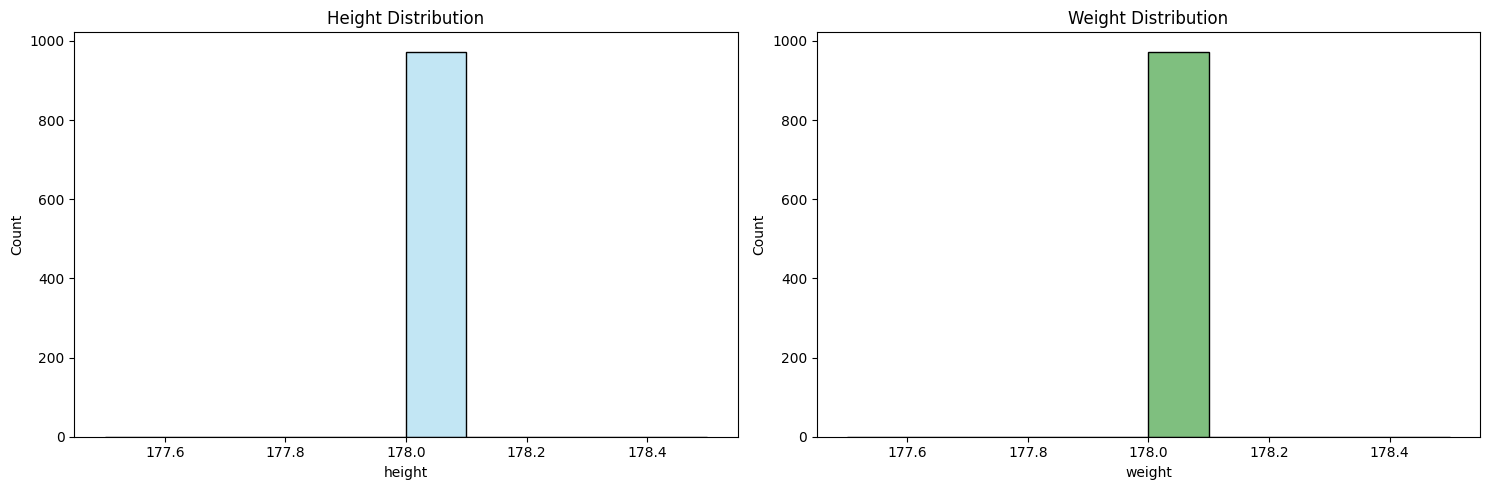

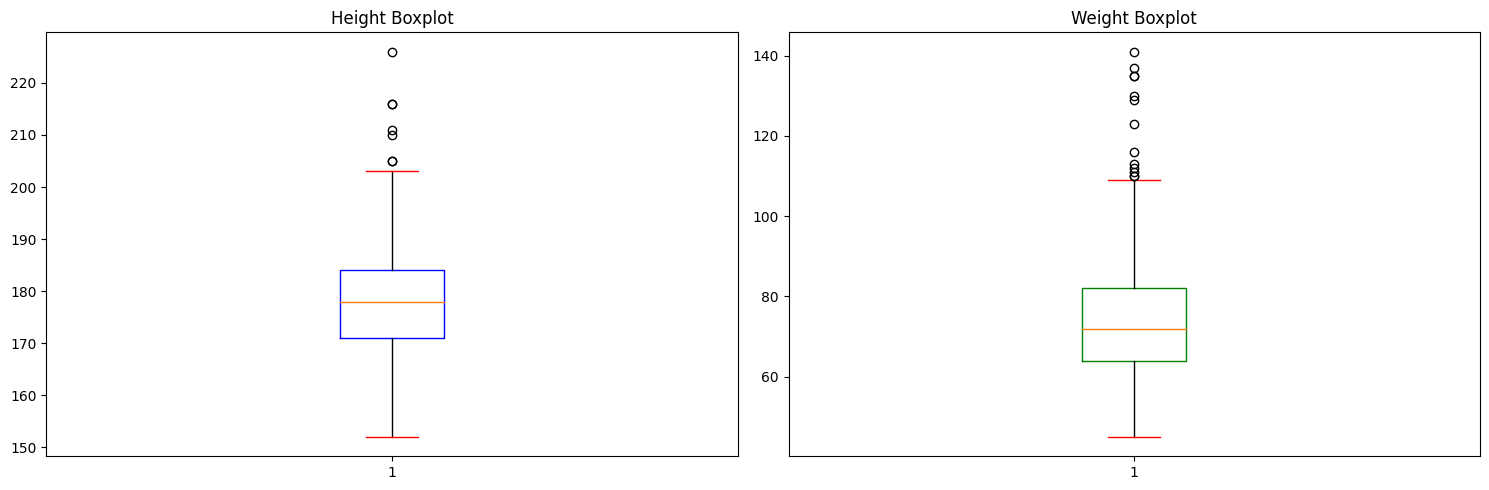

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
# Гистограмма для height

sns.histplot(f2_df['height'], bins=10, kde=True, color='skyblue', ax=axes[0]) 
axes[0].set_title('Height Distribution') 

# Гистограмма для weight 
sns.histplot(f2_df['weight'], bins=10, kde=True, color='green', ax=axes[1]) 
axes[1].set_title('Weight Distribution') 

# Отображение графиков 
plt.tight_layout() 
plt.show()

# Коробки
fig1, axes1 = plt.subplots(1, 2, figsize=(15, 5))
axes1[0].boxplot(df['height'], boxprops=dict(color='blue'), capprops=dict(color='red'))
axes1[0].set_title("Height Boxplot") 

axes1[1].boxplot(df['weight'], boxprops=dict(color='green'), capprops=dict(color='red'))
axes1[1].set_title("Weight Boxplot") 

plt.tight_layout() 
plt.show()

In [ ]:
df.describe(), f1_df.describe(), f2_df.describe() 

(         athlete_id      height      weight
 count  9.730000e+02  973.000000  973.000000
 mean   6.224677e+04  177.621788   73.437821
 std    5.969695e+04    9.799892   13.297772
 min    3.000000e+00  152.000000   45.000000
 25%    2.651800e+04  171.000000   64.000000
 50%    6.619400e+04  178.000000   72.000000
 75%    8.621500e+04  184.000000   82.000000
 max    1.005221e+06  226.000000  141.000000,
          athlete_id      height      weight
 count  9.730000e+02  178.000000  973.000000
 mean   6.224677e+04  177.820225   73.437821
 std    5.969695e+04    9.079762   13.297772
 min    3.000000e+00  153.000000   45.000000
 25%    2.651800e+04  172.000000   64.000000
 50%    6.619400e+04  178.000000   72.000000
 75%    8.621500e+04  183.750000   82.000000
 max    1.005221e+06  210.000000  141.000000,
          athlete_id  height  weight
 count    973.000000   973.0   973.0
 mean     497.389517   178.0   178.0
 std     4691.077143     0.0     0.0
 min      178.000000   178.0   178.0
 25

**Вывод**: При внесении пропусков и замене произвольными значениями распределение меняется а пропуски меняются незначительно

## 6. Генерация нормального распределения и анализ (графики эмпирических функций распределений, квантилей, метод огибающих, критерии проверки нормальности...)

**График эмпирической функции распределения (ECDF)** - график, показывающий распределение данных в выборке.

**График квантилей (Q-Q plot)** - сравнивает распределение данных с теоретическим распределением или между двумя выборками.

**Метод огибающей (Envelope method)** - создание доверительных интервалов вокруг оценочной функции (например, эмпирической функции распределения) или для визуализации разброса между несколькими выборками.

**Критерий Колмогорова-Смирнова (K-S Test)** - проверка гипотезы о том, что данные согласуются с каким-нибудь известным законом распределения. Чувствителен к отклонениям на концах распределения, для проверки нормальности требует, чтобы среднее и дисперсия были известны.

**Критерий Шапиро-Уилка (Shapiro-Wilk Test)** - проверка гипотезы о нормальности распределения данных. Менее эффективен на больших выборках (более 2000 наблюдений), может отклонять нормальность, даже при незначительных отклонениях.

**Критерий Андерсона-Дарлинга (Anderson-Darling Test)** - проверка соответствия гипотез определенному распределению. Является улучшением критерия Колмогорова-Смирнова, придавая больший вес отклонениям на хвостах распределения. Требует табличных значений для разных распределений.

**Критерий Крамера-фон-Мизеса (Cramer-von-Mises)** - проверка гипотезы о том, что выборка принадлежит определенному распределению. Подобен K-S тесту, но учитывает отклонения на всей длине функции распределения. Основан на сумме квадратов отклонений эмпирической функции распрделения от теоретической. Менее чувствителен к отклонениям на хвостах, чем критерий Андерсона-Дарлинга

**Критерий Колмогорова-Смирнова в модификации Лиллиефорса (Lilliefors Test)** - проверка нормальности данных, когда параметры(среднее и дисперсия) неизвестны. Чувствителен к небольшим отклонениям в распределнии данных.

**Критерий Шапиро-Франсия (Shapiro-Francia Test)** - проверка нормальности данных, альтернативный тесту Шапиро-Уилка. Более адаптирован для симметричных распределений. Лучше работает на больших объемах выборки. Меньше применим к небольшим объемам выборки, где тест Шапиро-Уилка может быть эффективнее.

**Сгенерируем в начале две выборки малого (50-100) и умеренного размеров (1000-5000) стандартного нормального распределения и проведем анализ на них. Далее проведем аналогичные действия для выборки с пуассоновским шумом.**

**_Стандартное нормальное распределение_**

In [ ]:
# Генерируем две выборки: малого (50-100) и умеренного (1000-5000) объемов стандартного нормального распределения

mu, sigma = 0, 1 # параметры нормального распределения: среднее и дисперсия
small_normal_df_1 = np.random.normal(mu, sigma, 100)
mode_normal_df_2 = np.random.normal(mu, sigma, 5000)

**ECDF**

In [ ]:
# Функция для построения ECDF с seaborn 

def plot_ecdf(data, label, ax): 
    sns.ecdfplot(data, label=label, ax=ax) 
    ax.set_xlabel('Value') 
    ax.set_ylabel('Probability') 
    ax.legend()

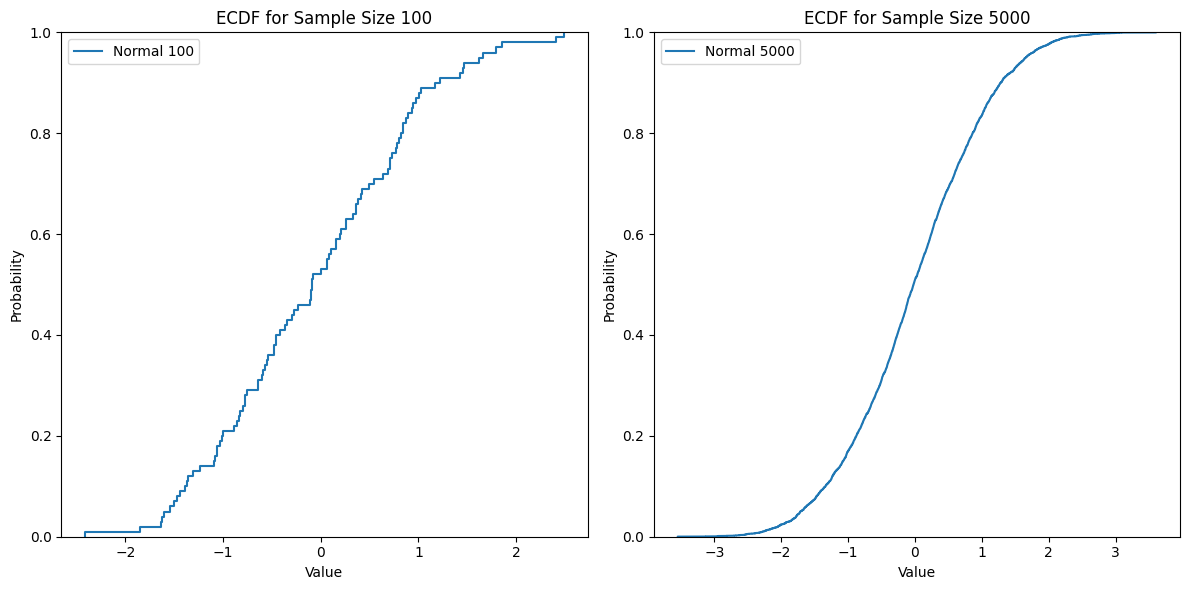

In [ ]:
# Построение ECDF (эмпирическая функция распределения) 

fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
plot_ecdf(small_normal_df_1, 'Normal 100', ax[0])
plot_ecdf(mode_normal_df_2, 'Normal 5000', ax[1]) 
ax[0].set_title('ECDF for Sample Size 100')
ax[1].set_title('ECDF for Sample Size 5000') 
plt.tight_layout() 
plt.show()

**_Quantile-Quantile plot_**

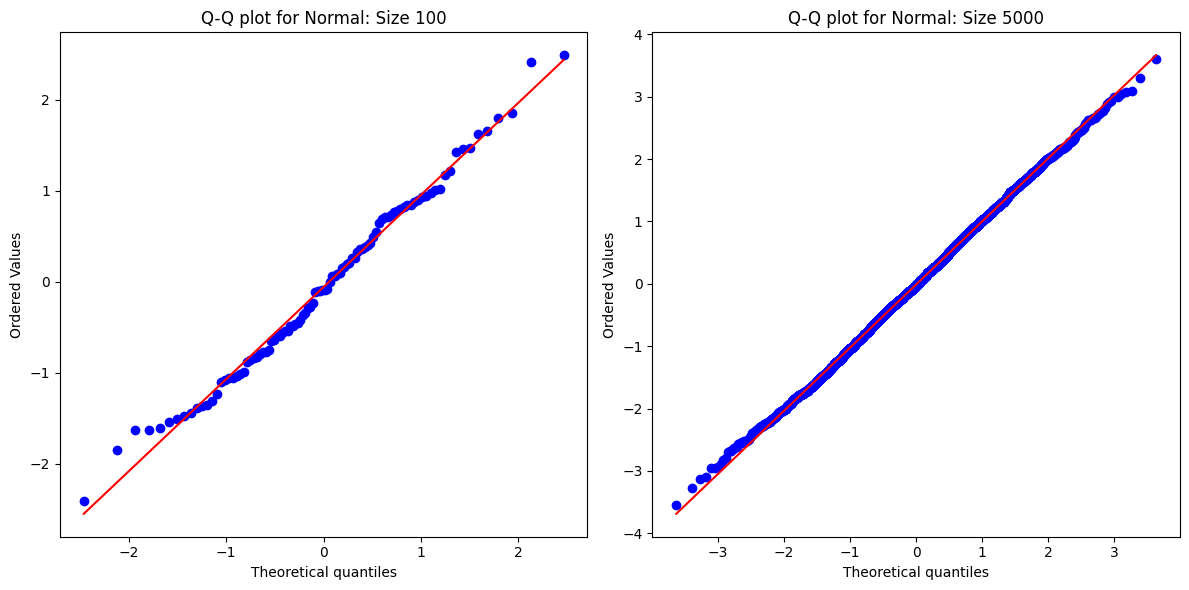

In [ ]:
# Q-Q plot для обеих выборок 

fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
stats.probplot(small_normal_df_1, dist="norm", plot=ax[0]) 
ax[0].set_title('Q-Q plot for Normal: Size 100') 
stats.probplot(mode_normal_df_2, dist="norm", plot=ax[1]) 
ax[1].set_title('Q-Q plot for Normal: Size 5000') 
plt.tight_layout() 
plt.show()

**_Envelope method_**

In [ ]:
# Реализуем собственную функцию для ECDF 
def custom_ecdf(data): 
        # Сортируем данные 
        sorted_data = np.sort(data) 
        # Количество элементов 
        n = len(sorted_data) 
        # Возвращаем значения ECDF 
        return sorted_data, np.arange(1, n + 1) / n 

# Модифицированная функция для Envelope method с использованием custom_ecdf 
def envelope_ecdf(data, n_bootstrap=50): 
    x = np.linspace(min(data), max(data), 500) 
    ecdfs = [] 
    for _ in range(n_bootstrap): 
        sample = np.random.choice(data, len(data), replace=True) 
        sorted_sample, y_ecdf = custom_ecdf(sample) 
        ecdfs.append(np.interp(x, sorted_sample, y_ecdf)) 
    lower = np.percentile(ecdfs, 2.5, axis=0) 
    upper = np.percentile(ecdfs, 97.5, axis=0) 
    sorted_data, ecdf_original_y = custom_ecdf(data)
    plt.plot(sorted_data, ecdf_original_y, label='Original ECDF', color='blue') 
    plt.fill_between(x, lower, upper, color='gray', alpha=0.3, label='Envelope') 
    plt.xlabel('Value') 
    plt.ylabel('ECDF') 
    plt.legend() 

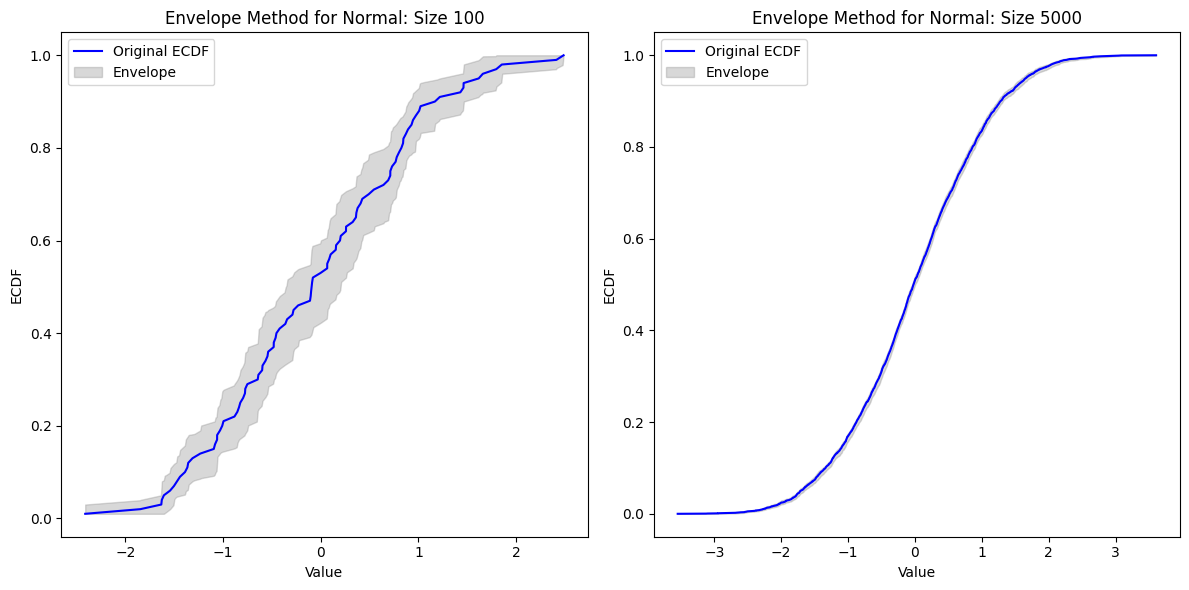

In [ ]:
# Построим огибающую для обеих выборок 

fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
plt.sca(ax[0]) 
envelope_ecdf(small_normal_df_1) 
plt.title('Envelope Method for Normal: Size 100') 
plt.sca(ax[1]) 
envelope_ecdf(mode_normal_df_2) 
plt.title('Envelope Method for Normal: Size 5000') 
plt.tight_layout() 
plt.show()

**_K-S Test_**

In [ ]:
# K-S Test (Критерий Колмогорова-Смирнова) 
ks_test1 = stats.kstest(small_normal_df_1, 'norm', args=(mu, sigma)) 
ks_test2 = stats.kstest(mode_normal_df_2, 'norm', args=(mu, sigma))

ks_test1, ks_test2

(KstestResult(statistic=0.07520052032445412, pvalue=0.5969916749808757, statistic_location=-0.4543193937540292, statistic_sign=1),
 KstestResult(statistic=0.012773007156689747, pvalue=0.3851310800216007, statistic_location=-1.205386875614058, statistic_sign=1))

In [ ]:
# H0 - данные распределены нормально
# H1 - данные не распределены нормально

alpha = 0.05
print("Тест 1: ")
if ks_test1.pvalue > alpha:
    print("Принимаем нулевую гипотезу: данные распределны нормально\n")
else:
    print("Принимаем альтернативную гипотезу: данные не распределны нормально\n")


print("Тест 2: ")
if ks_test2.pvalue > alpha:
    print("Принимаем нулевую гипотезу: данные распределены нормально\n")
else:
    print("Принимаем альтернативную гипотезу: данные не распределны нормально\n")

Тест 1: 
Принимаем нулевую гипотезу: данные распределны нормально

Тест 2: 
Принимаем нулевую гипотезу: данные распределены нормально



**Остальные тесты для выборки малого и умеренного размеров** 

Тесты проверяют гипотезу о принадлежности данных нормальному распределению. 

Если p-значение больше определенного значения на уровне значимости (например, 0.05), то это означает, что гипотеза о нормальности справедлива, иначе, наоборот. 

In [ ]:
# Проведение тестов
from math import exp

# Проведение тестов

def perform_normality_tests(sample, name):
    print(f'Результаты тестов для {name}:\nTrue - принимаем гипотезу о нормальности распределения / False - иначе.\n\n')
    
    # Тест Шапиро-Уилка
    shapiro_test = stats.shapiro(sample)
    print(f'\033[1mШапиро-Уилк\033[0m: Статистика={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4e}\nres: {shapiro_test.pvalue > 0.05}\n')
    
    # Тест Андерсона-Дарлинга
    # функция для расчета-pvalue
    def anderson_p_value(AD_stat):
        if AD_stat >= .6:
            p = exp(1.2937 - 5.709*AD_stat - .0186*(AD_stat**2))
        elif AD_stat >=.34:
            p = exp(.9177 - 4.279*AD_stat - 1.38*(AD_stat**2))
        elif AD_stat >.2:
            p = 1 - exp(-8.318 + 42.796*AD_stat - 59.938*(AD_stat**2))
        else:
            p = 1 - exp(-13.436 + 101.14*AD_stat - 223.73*(AD_stat**2))

        return p
    
    anderson_test = stats.anderson(sample, dist='norm')
    print(f'\033[1mАндерсон-Дарлинг\033[0m: Статистика={anderson_test.statistic:.4f}, p-value={anderson_p_value(anderson_test.statistic)}\nres: {anderson_test.statistic < 0.787}\n')

    # Тест Крамера фон Мизеса
    cramervonmises_test = stats.cramervonmises(sample, 'norm')
    print(f'\033[1mКрамер фон Мизес\033[0m: Статистика={cramervonmises_test.statistic:.4f}, p-value={cramervonmises_test.pvalue:.4e}\nres: {cramervonmises_test.pvalue > 0.05}\n')
    
    # Тест Колмогорова-Смирнова (модификация Лиллиефорса)
    kstest = stats.kstest(sample, 'norm')
    print(f'\033[1mКолмогоров-Смирнов (Лиллиефорс)\033[0m: Статистика={kstest.statistic:.4f}, p-value={kstest.pvalue:.4e}\nres: {kstest.pvalue > 0.05}\n')
    
    # Тест Шапиро-Франсия (не реализован напрямую в scipy, но можно использовать функцию shapiro как приближение)
    shapiro_francia_test = stats.shapiro(sample)  # Обычно приближенно используют как Шапиро-Уилк
    print(f'\033[1mШапиро-Франсия\033[0m: Статистика={shapiro_francia_test.statistic:.4f}, p-value={shapiro_francia_test.pvalue:.4e}\nres: {shapiro_francia_test.pvalue > 0.05}\n')
    
    print('-' * 50)

# Применение тестов для обеих выборок
perform_normality_tests(small_normal_df_1, 'Выборка из 100 элементов')
perform_normality_tests(mode_normal_df_2, 'Выборка из 5000 элементов')

Результаты тестов для Выборка из 100 элементов:
True - принимаем гипотезу о нормальности распределения / False - иначе.


Шапиро-Уилк: Статистика=0.9891, p-value=5.9269e-01
res: True

Андерсон-Дарлинг: Статистика=0.3174, p-value=0.5382479217380227
res: True

Крамер фон Мизес: Статистика=0.0977, p-value=5.9737e-01
res: True

Колмогоров-Смирнов (Лиллиефорс): Статистика=0.0752, p-value=5.9699e-01
res: True

Шапиро-Франсия: Статистика=0.9891, p-value=5.9269e-01
res: True

--------------------------------------------------
Результаты тестов для Выборка из 5000 элементов:
True - принимаем гипотезу о нормальности распределения / False - иначе.


Шапиро-Уилк: Статистика=0.9994, p-value=1.3162e-01
res: True

Андерсон-Дарлинг: Статистика=0.5516, p-value=0.15528729415522974
res: True

Крамер фон Мизес: Статистика=0.1674, p-value=3.4059e-01
res: True

Колмогоров-Смирнов (Лиллиефорс): Статистика=0.0128, p-value=3.8513e-01
res: True

Шапиро-Франсия: Статистика=0.9994, p-value=1.3162e-01
res: True

-

**Нормальное распределение с гауссовским шумом**

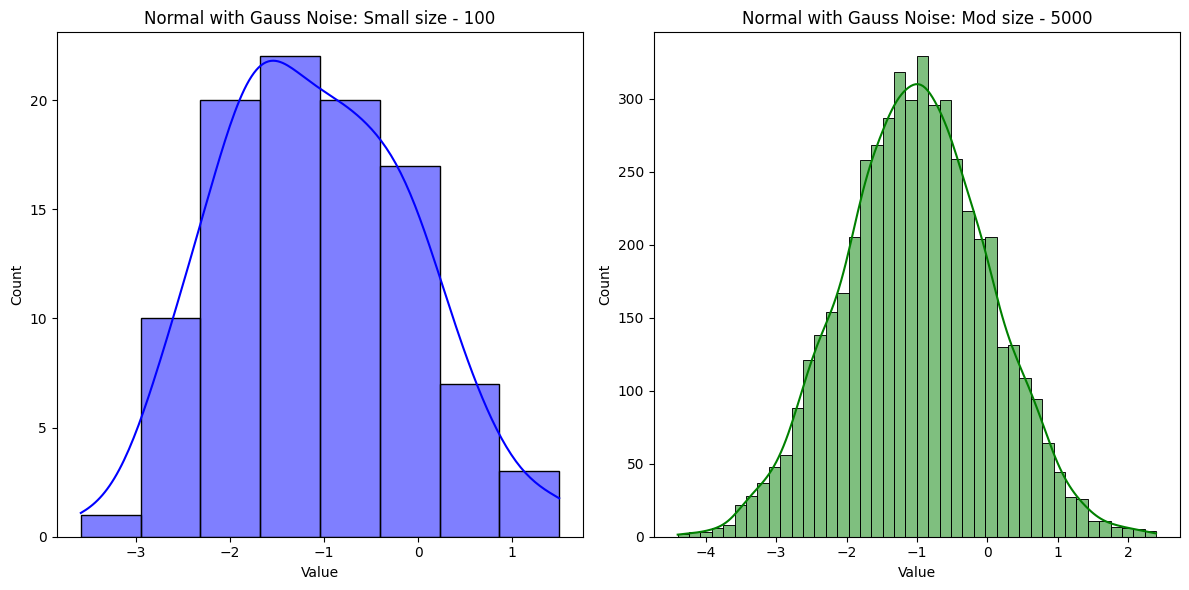

In [ ]:
small_gauss_noise = np.random.normal(loc=0, scale=0.1, size=100) - 1 # для выборки малого размера
mod_gauss_noise = np.random.normal(loc=0, scale=0.2, size=5000) - 1 # для выборки умеренного размера

small_data_with_gauss = small_normal_df_1 + small_gauss_noise
mod_data_with_gauss = mode_normal_df_2 + mod_gauss_noise

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(small_data_with_gauss, kde=True, color='blue')
plt.xlabel("Value")
plt.title("Normal with Gauss Noise: Small size - 100")

plt.subplot(1, 2, 2)
sns.histplot(mod_data_with_gauss, kde=True, color='green')
plt.xlabel("Value")
plt.title("Normal with Gauss Noise: Mod size - 5000")

plt.tight_layout()
plt.show()

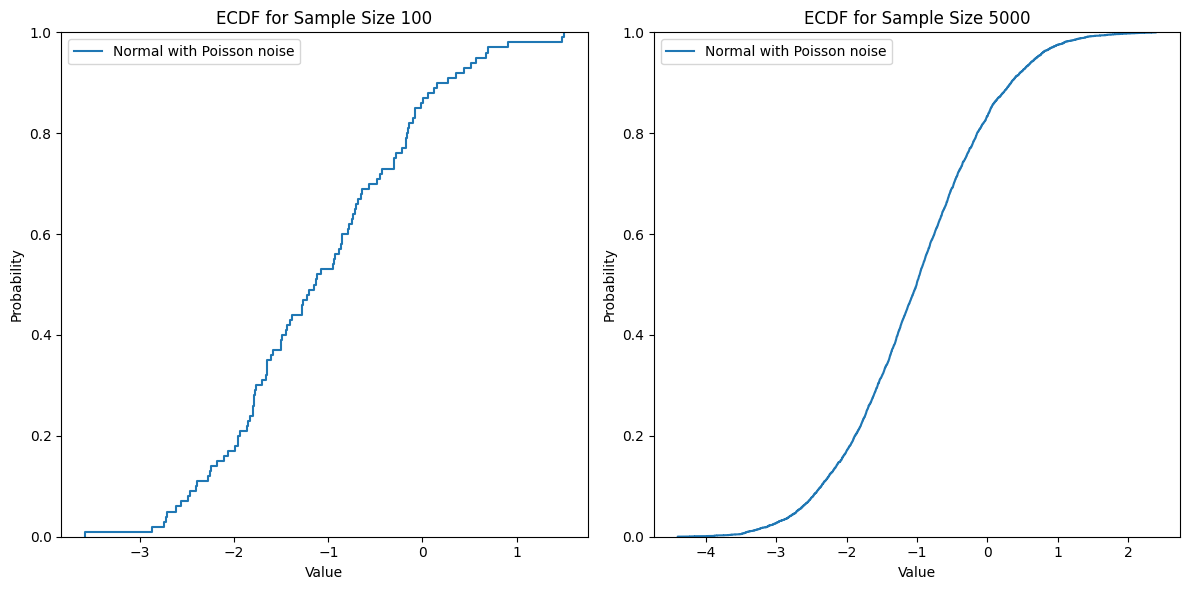

In [ ]:
# Построение ECDF (эмпирическая функция распределения) 

fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
plot_ecdf(small_data_with_gauss, 'Normal with Poisson noise', ax[0])
plot_ecdf(mod_data_with_gauss, 'Normal with Poisson noise', ax[1]) 
ax[0].set_title('ECDF for Sample Size 100')
ax[1].set_title('ECDF for Sample Size 5000') 
plt.tight_layout() 
plt.show()

**_Quantile-Quantile plot_**

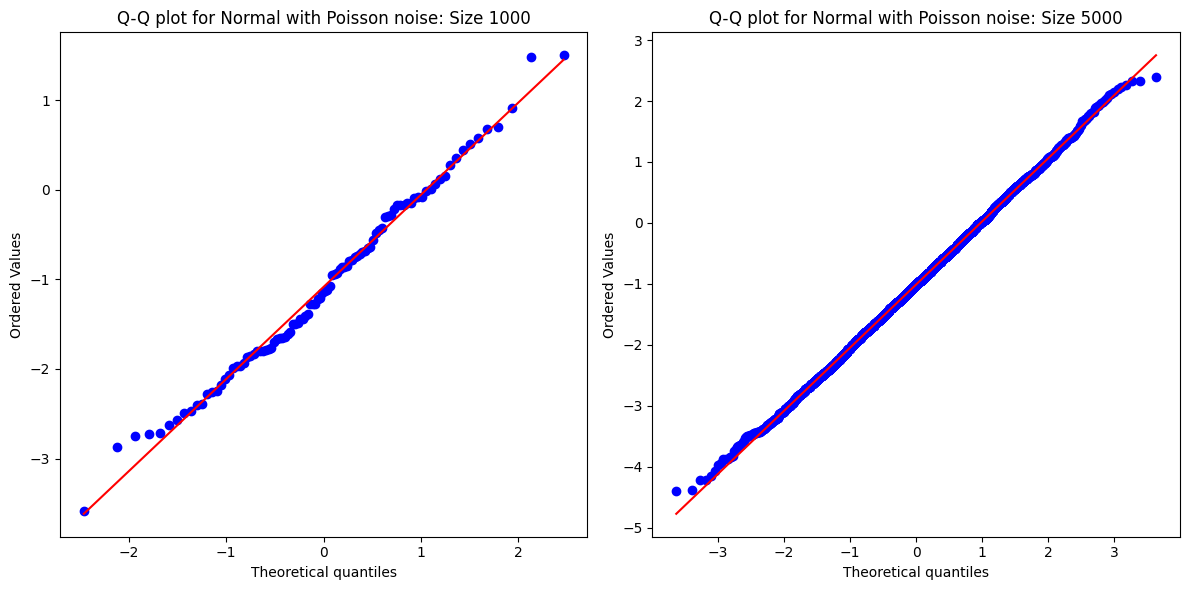

In [ ]:
# Q-Q plot для обеих выборок 

fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
stats.probplot(small_data_with_gauss, dist="norm", plot=ax[0]) 
ax[0].set_title('Q-Q plot for Normal with Poisson noise: Size 1000') 
stats.probplot(mod_data_with_gauss, dist="norm", plot=ax[1]) 
ax[1].set_title('Q-Q plot for Normal with Poisson noise: Size 5000') 
plt.tight_layout() 
plt.show()

**_Envelope method_**

**Пример для многомерного нормального распределения**

Метод огибающих показывает диапазон вариаций ваборочных квантилей относительно теоретических. Они отображают границы, в которых могут находиться реальные данные, если они соответствуют ожидаемой модели распределения(например, нормальному распределению). Это особенно хорошо для оценки того, насколько сильно или слабо данные отклоняются от теоретической модели. Также позволяют выявлять выбросы.

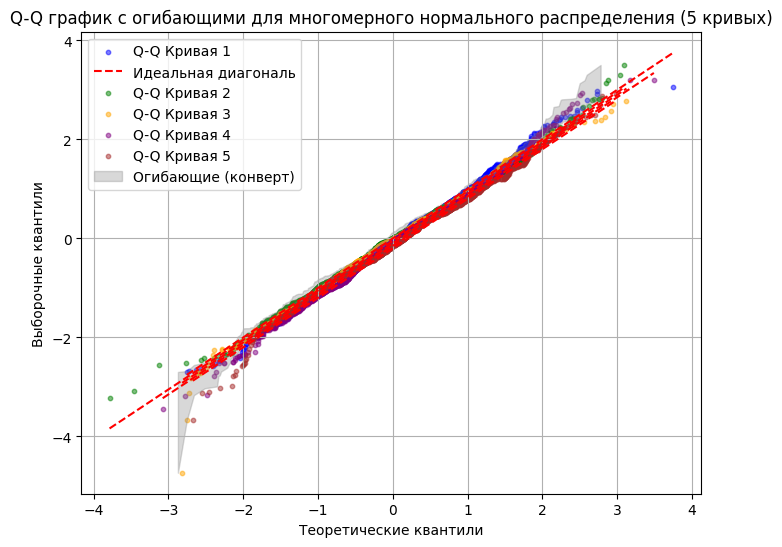

In [ ]:
# Пример метода огибающих на 5-мерном нормальном распределении.

def generate_multivariate_normal(mean, cov, n_samples):
    """
    Генерация выборки из многомерного нормального распределения с заданными средними и ковариационной матрицей.
    
    mean: Вектор средних значений (размер d)
    cov: Ковариационная матрица (размер d x d)
    n_samples: Количество выборок
    """
    d = len(mean)
    z = np.random.randn(n_samples, d)
    L = np.linalg.cholesky(cov)
    samples = z @ L.T + mean
    return samples

# Пример использования
mean = np.zeros(5)  # Вектор средних для 5 переменных
cov = np.array([[1, 0.5, 0.3, 0.2, 0.1],    # Ковариационная матрица для 5 компонент
                [0.5, 1, 0.4, 0.3, 0.2],
                [0.3, 0.4, 1, 0.5, 0.3],
                [0.2, 0.3, 0.5, 1, 0.4],
                [0.1, 0.2, 0.3, 0.4, 1]])
n_samples = 1000  # Количество точек

samples = generate_multivariate_normal(mean, cov, n_samples)

# Определим цвета для каждой кривой
colors = ['blue', 'green', 'orange', 'purple', 'brown']

plt.figure(figsize=(8, 6))

# Инициализация массивов для огибающих кривых
min_envelope = np.inf * np.ones(n_samples)  # Минимальные значения для каждого квантиля
max_envelope = -np.inf * np.ones(n_samples)  # Максимальные значения для каждого квантиля

# Для каждой компоненты выборки построим Q-Q график
for i in range(5):
    sorted_samples = np.sort(samples[:, i])  # Сортируем i-ую компоненту выборки
    theoretical_quants = np.sort(np.random.normal(0, 1, n_samples))  # Теоретические квантили нормального распределения
    
    # Добавляем небольшое смещение по оси X, чтобы кривые не накладывались
    offset = 0.05 * i  # Смещение для каждой компоненты
    
    # Строим Q-Q кривую с уменьшенным размером точек
    plt.scatter(theoretical_quants + offset, sorted_samples, alpha=0.5, s=10, label=f'Q-Q Кривая {i+1}', color=colors[i])

    # Обновляем минимальные и максимальные значения огибающих
    min_envelope = np.minimum(min_envelope, sorted_samples)
    max_envelope = np.maximum(max_envelope, sorted_samples)

    # Диагональная линия для идеального совпадения (также с небольшим смещением)
    plt.plot(theoretical_quants + offset, theoretical_quants, color='red', linestyle='--', label='Идеальная диагональ' if i == 0 else "")

# Построим огибающие кривые (конверт)
plt.fill_between(theoretical_quants, min_envelope, max_envelope, color='gray', alpha=0.3, label="Огибающие (конверт)")

# Оформление графика
plt.title("Q-Q график с огибающими для многомерного нормального распределения (5 кривых)")
plt.xlabel("Теоретические квантили")
plt.ylabel("Выборочные квантили")
plt.legend()
plt.grid(True)

plt.show()

**Пример метода огибающих на одномерном нормальном распределении**

In [ ]:
# Реализуем собственную функцию для ECDF 
def custom_ecdf(data): 
        # Сортируем данные 
        sorted_data = np.sort(data) 
        # Количество элементов 
        n = len(sorted_data) 
        # Возвращаем значения ECDF 
        return sorted_data, np.arange(1, n + 1) / n 

# Модифицированная функция для Envelope method с использованием custom_ecdf 
def envelope_ecdf(data, n_bootstrap=50): 
    x = np.linspace(min(data), max(data), 500) 
    ecdfs = [] 
    for _ in range(n_bootstrap): 
        sample = np.random.choice(data, len(data), replace=True) 
        sorted_sample, y_ecdf = custom_ecdf(sample) 
        ecdfs.append(np.interp(x, sorted_sample, y_ecdf)) 
    lower = np.percentile(ecdfs, 2.5, axis=0) 
    upper = np.percentile(ecdfs, 97.5, axis=0) 
    sorted_data, ecdf_original_y = custom_ecdf(data)
    plt.plot(sorted_data, ecdf_original_y, label='Original ECDF', color='blue') 
    plt.fill_between(x, lower, upper, color='gray', alpha=0.3, label='Envelope') 
    plt.xlabel('Value') 
    plt.ylabel('ECDF') 
    plt.legend() 

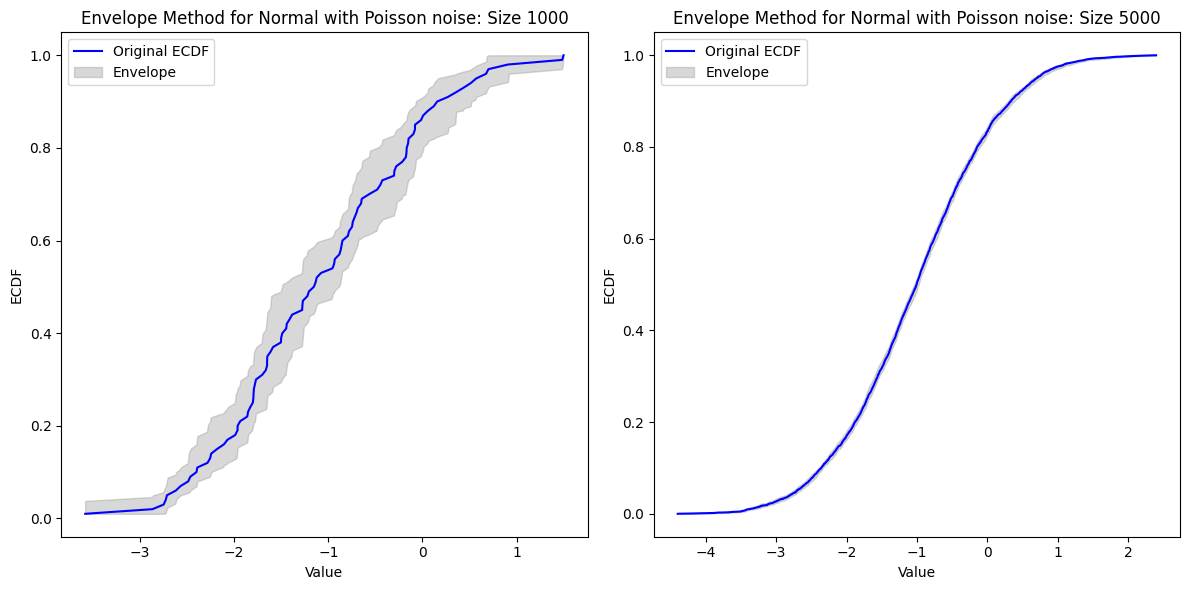

In [ ]:
# Построим огибающую для обеих выборок 

fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
plt.sca(ax[0]) 
envelope_ecdf(small_data_with_gauss) 
plt.title('Envelope Method for Normal with Poisson noise: Size 1000') 
plt.sca(ax[1]) 
envelope_ecdf(mod_data_with_gauss) 
plt.title('Envelope Method for Normal with Poisson noise: Size 5000') 
plt.tight_layout() 
plt.show()

**_K-S Test_**

In [ ]:
# K-S Test (Критерий Колмогорова-Смирнова) 
ks_test1 = stats.kstest(small_data_with_gauss, 'norm', args=(mu, sigma)) 
ks_test2 = stats.kstest(mod_data_with_gauss, 'norm', args=(mu, sigma))

ks_test1, ks_test2

(KstestResult(statistic=0.4304487708633801, pvalue=2.3842547154589065e-17, statistic_location=-0.6447295576599532, statistic_sign=1),
 KstestResult(statistic=0.3851045730141799, pvalue=0.0, statistic_location=-0.5229761449498399, statistic_sign=1))

In [ ]:
# H0 - данные распределены нормально
# H1 - данные не распределены нормально

# Проверяем на уровне значимости alpha = 0.05

print("Тест 1: ")
if ks_test1.pvalue > 0.05:
    print("Принимаем нулевую гипотезу: данные распределeны нормально\n")
else:
    print("Принимаем альтернативную гипотезу: данные не распределeны нормально\n")


print("Тест 2: ")
if ks_test2.pvalue > 0.05:
    print("Принимаем нулевую гипотезу: данные распределeны нормально\n")
else:
    print("Принимаем альтернативную гипотезу: данные не распределeны нормально\n")

Тест 1: 
Принимаем альтернативную гипотезу: данные не распределeны нормально

Тест 2: 
Принимаем альтернативную гипотезу: данные не распределeны нормально



**Остальные тесты для выборки малого и умеренного размеров** 

Тесты проверяют гипотезу о принадлежности данных нормальному распределению. 

Если p-значение больше значения на определенном уровне значимости (например 0.05), то это означает, что гипотеза о нормальности справедлива, иначе, наоборот. 

In [ ]:
# Проведение тестов
# Применение тестов для обеих выборок, возьмем альфа равным 0.05
alpha = 0.05
print(f"Значение alpha: {alpha}\n")
perform_normality_tests(small_data_with_gauss, 'Выборка из 100 элементов')
perform_normality_tests(mod_data_with_gauss, 'Выборка из 5000 элементов')

Значение alpha: 0.05

Результаты тестов для Выборка из 100 элементов:
True - принимаем гипотезу о нормальности распределения / False - иначе.


Шапиро-Уилк: Статистика=0.9898, p-value=6.4721e-01
res: True

Андерсон-Дарлинг: Статистика=0.3354, p-value=0.5068060495224084
res: True

Крамер фон Мизес: Статистика=9.0128, p-value=2.7063e-10
res: False

Колмогоров-Смирнов (Лиллиефорс): Статистика=0.4304, p-value=2.3843e-17
res: False

Шапиро-Франсия: Статистика=0.9898, p-value=6.4721e-01
res: True

--------------------------------------------------
Результаты тестов для Выборка из 5000 элементов:
True - принимаем гипотезу о нормальности распределения / False - иначе.


Шапиро-Уилк: Статистика=0.9996, p-value=4.1874e-01
res: True

Андерсон-Дарлинг: Статистика=0.2252, p-value=0.8209026230386396
res: True

Крамер фон Мизес: Статистика=396.9297, p-value=1.0717e-07
res: False

Колмогоров-Смирнов (Лиллиефорс): Статистика=0.3851, p-value=0.0000e+00
res: False

Шапиро-Франсия: Статистика=0.9996, p-va

## 7. Пример  анализа  данных  с помощью графиков квантилей, метода огибающих. Стандартные процедуры проверки гипотез о нормальности. Выборки малого и умеренного размеров.

**Возьмем датасет с информацией о росте студентов высшей школы** - [ссылка на датасет](https://www.kaggle.com/datasets/yashmeetsingh/high-school-heights-dataset/data)

**Информация о том, как был сгенерирован данный датасет** - [здесь](https://github.com/ysk125103/datascience101/tree/main/datasets/high_school_heights)

**Название датасета** - _hs_heights_pair.csv_ (в датасете находятся две колонки: "boys", "girls")

Данный датасет был смоделирован. Рост рассчитывается на основе нормального распределения с разными наборами среднего и стандартного отклонения для мальчиков и девочек.

**Характеристики датасета, значения**

In [ ]:
hs_heights_path = '../all_datasets/hs_heights_pair.csv' # путь к файлу
hs_heights_df = pd.read_csv(hs_heights_path) # открытие файла и создание датафрейма

hs_heights_df.info(), hs_heights_df.describe()  # информация по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   boys    500 non-null    float64
 1   girls   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


(None,
              boys       girls
 count  500.000000  500.000000
 mean    67.163860   61.977600
 std      2.890162    2.117891
 min     59.160000   56.680000
 25%     65.177500   60.600000
 50%     67.130000   62.005000
 75%     68.952500   63.380000
 max     77.150000   69.350000)

In [ ]:
hs_heights_df

,boys,girls
0,64.44,62.47
1,67.40,63.27
2,63.93,62.99
3,69.29,64.60
4,66.96,60.73
...,...,...
495,70.89,65.69
496,62.13,58.06
497,72.97,62.42
498,67.23,62.18


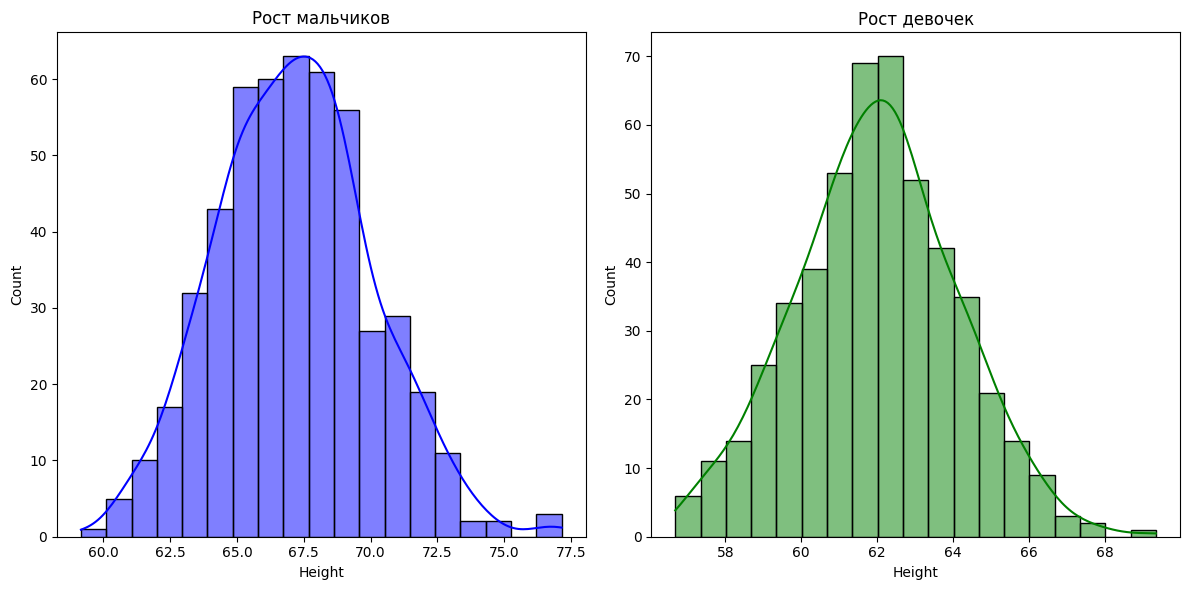

In [ ]:
# Визуализация графиков распределений ростов мальчиков и девочек в высшей школею Размер - 500
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(hs_heights_df['boys'], kde=True, color='blue')
plt.xlabel("Height")
plt.title("Рост мальчиков")

plt.subplot(1, 2, 2)
sns.histplot(hs_heights_df['girls'], kde=True, color='green')
plt.xlabel("Height")
plt.title("Рост девочек")

plt.tight_layout()
plt.show()

**Для проведения анализа на выборке малого и умеренного размеров сконкатенируем датафрейм.**

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   boys    1000 non-null   float64
 1   girls   1000 non-null   float64
dtypes: float64(2)
memory usage: 23.4 KB
None 
              boys        girls
count  1000.000000  1000.000000
mean     67.163860    61.977600
std       2.888716     2.116831
min      59.160000    56.680000
25%      65.177500    60.600000
50%      67.130000    62.005000
75%      68.952500    63.380000
max      77.150000    69.350000




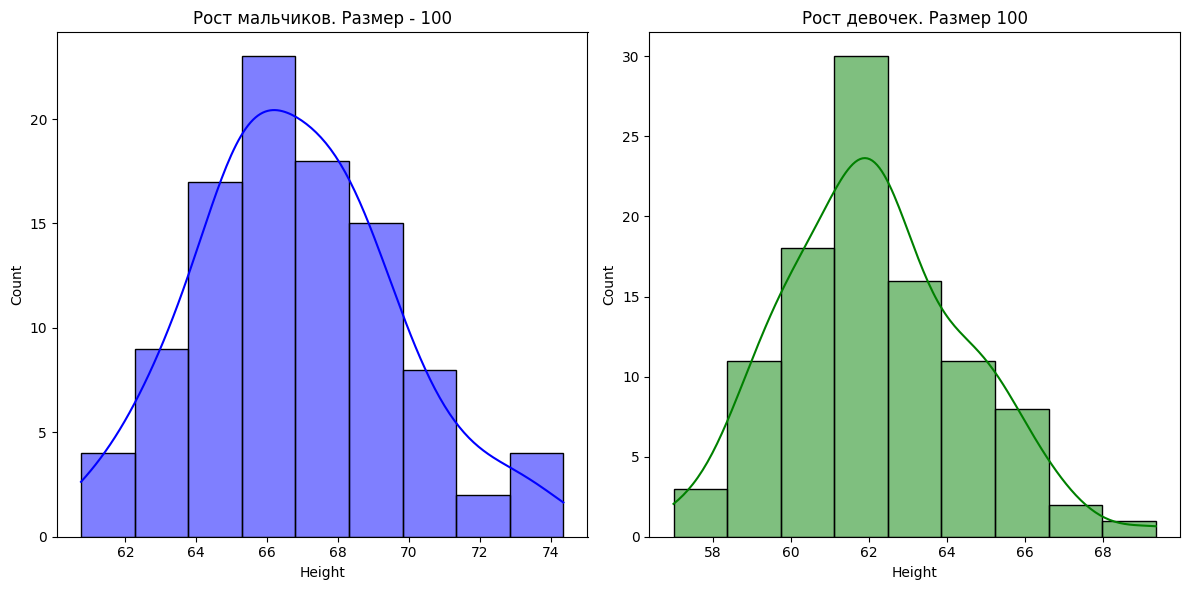

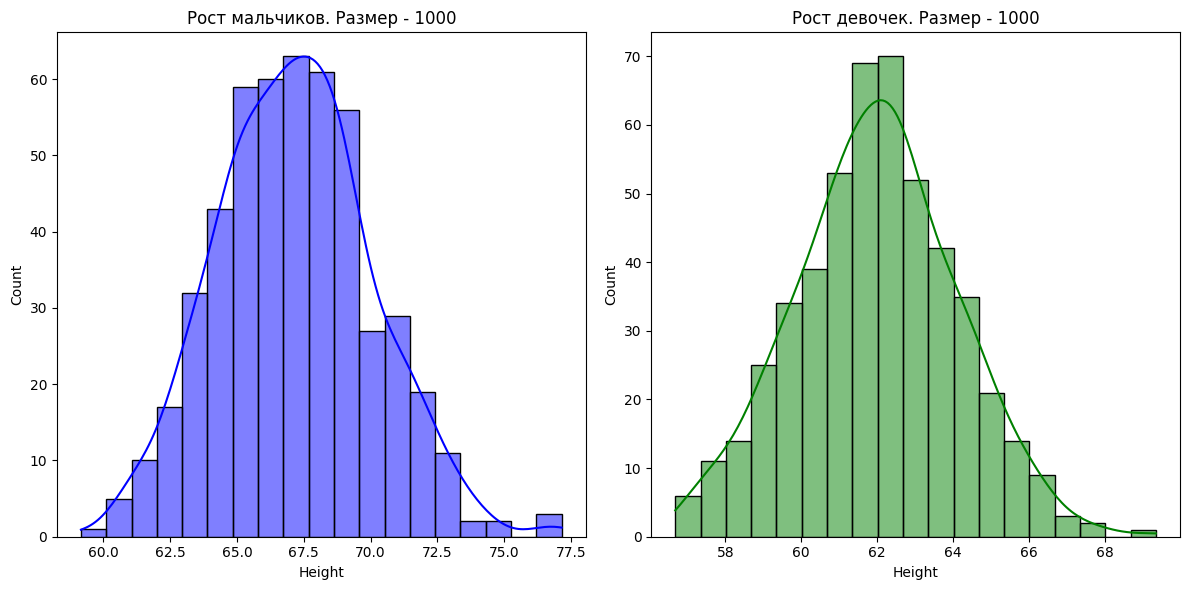

In [ ]:
expanded_hs_heights_df = pd.concat([hs_heights_df, hs_heights_df], axis=0) # сконкатенировали столбцы, чтобы расширить размер до 1000

print(f'{expanded_hs_heights_df.info()} \n{expanded_hs_heights_df.describe()}\n\n') # вывод характеристик расширенного датасета

# Визуализация графиков распределений ростов мальчиков и девочек в высшей школе для малого размера (100)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(hs_heights_df['boys'].head(100), kde=True, color='blue')
plt.xlabel("Height")
plt.title("Рост мальчиков. Размер - 100")

plt.subplot(1, 2, 2)
sns.histplot(hs_heights_df['girls'].head(100), kde=True, color='green')
plt.xlabel("Height")
plt.title("Рост девочек. Размер 100")

plt.tight_layout()
plt.show()

# Визуализация графиков распределений ростов мальчиков и девочек в высшей школе для умеренного размера (1000)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(hs_heights_df['boys'], kde=True, color='blue')
plt.xlabel("Height")
plt.title("Рост мальчиков. Размер - 1000")

plt.subplot(1, 2, 2)
sns.histplot(hs_heights_df['girls'], kde=True, color='green')
plt.xlabel("Height")
plt.title("Рост девочек. Размер - 1000")

plt.tight_layout()
plt.show()

In [ ]:
expanded_hs_heights_df

,boys,girls
0,64.44,62.47
1,67.40,63.27
2,63.93,62.99
3,69.29,64.60
4,66.96,60.73
...,...,...
495,70.89,65.69
496,62.13,58.06
497,72.97,62.42
498,67.23,62.18


_Для проведения анализа нужно проверить, что наблюдения в выборке независимы, в данном случае проверяем рост мальчиков и девочек. А также по тесту Шапиро-Уилка проверяем гипотезу о нормальности данных_

Для проверки независимости можно применить тест **хи-квадрат (Chi-Square Test)**, как правило его применяют для проверки независимости категориальных данных. 

Либо можно рассчитать коэффициент корреляции Пирсона для проверки зависимости между данными. **_Если p-value меньше 0.05, то делается вывод о наличии зависимости между столбцами._** Рассчитаем коэффициент корреляции Пирсона:

In [ ]:
# Проверка данных на независимость - рассчитаем коэффициент корреляции Пирсона и проверим его на уровне значимости alpha = 0.05

correlation, p_value = stats.pearsonr(hs_heights_df['boys'], hs_heights_df['girls'])
print(f"\033[1mКорреляция Пирсона\033[0m: {correlation}, p-value: {p_value}\n")

if p_value > 0.05:
    print("Данные независимы")
else:
    print("Данные зависимы")

Корреляция Пирсона: -0.013530877850919405, p-value: 0.7627922008265289

Данные независимы


In [ ]:
# Проверка данных на нормальность
shapiro_test_boys = stats.shapiro(hs_heights_df['boys']) # проверка для роста мальчиков
print(f'\033[1mШапиро-Уилк\033[0m: Статистика={shapiro_test_boys.statistic:.4f}, p-value={shapiro_test_boys.pvalue:.4e}\n')

shapiro_test_girls = stats.shapiro(hs_heights_df['girls']) # проверка для роста мальчиков
print(f'\033[1mШапиро-Уилк\033[0m: Статистика={shapiro_test_girls.statistic:.4f}, p-value={shapiro_test_girls.pvalue:.4e}\n')

alpha = 0.05
if shapiro_test_boys.pvalue > alpha and shapiro_test_girls.pvalue > alpha:
    print("H0: Данные - нормальные")
else:
    print("H1: Данные - не нормальные")

Шапиро-Уилк: Статистика=0.9953, p-value=1.3945e-01

Шапиро-Уилк: Статистика=0.9976, p-value=6.8459e-01

H0: Данные - нормальные


**Данные являются независимыми и нормальными. Можно проводить анализ**

**_Q-Q plot_**

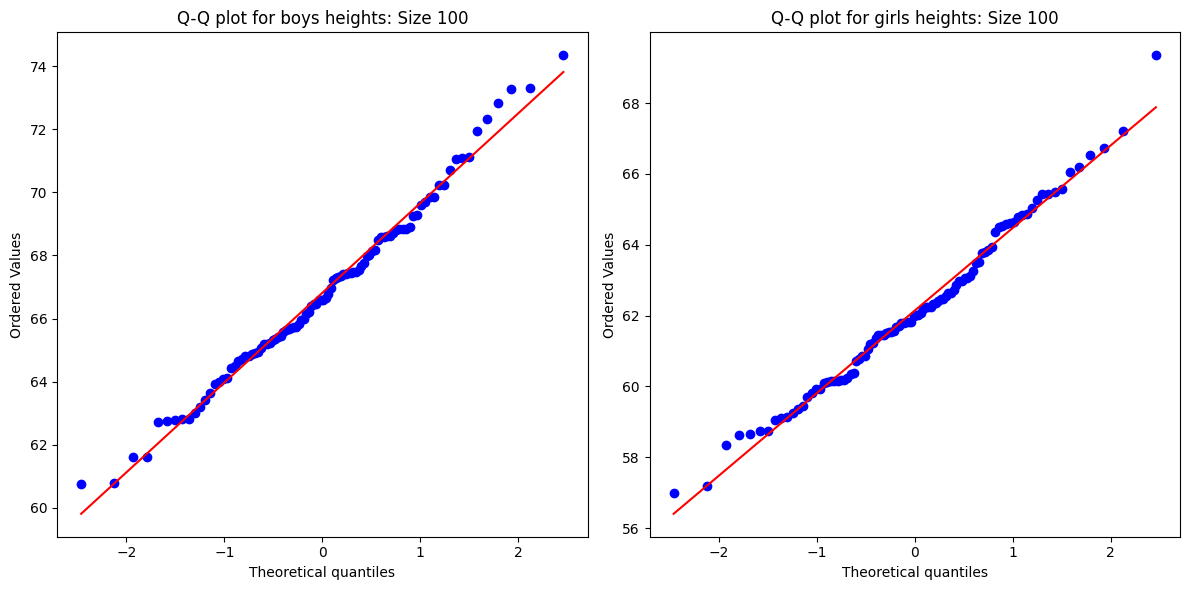

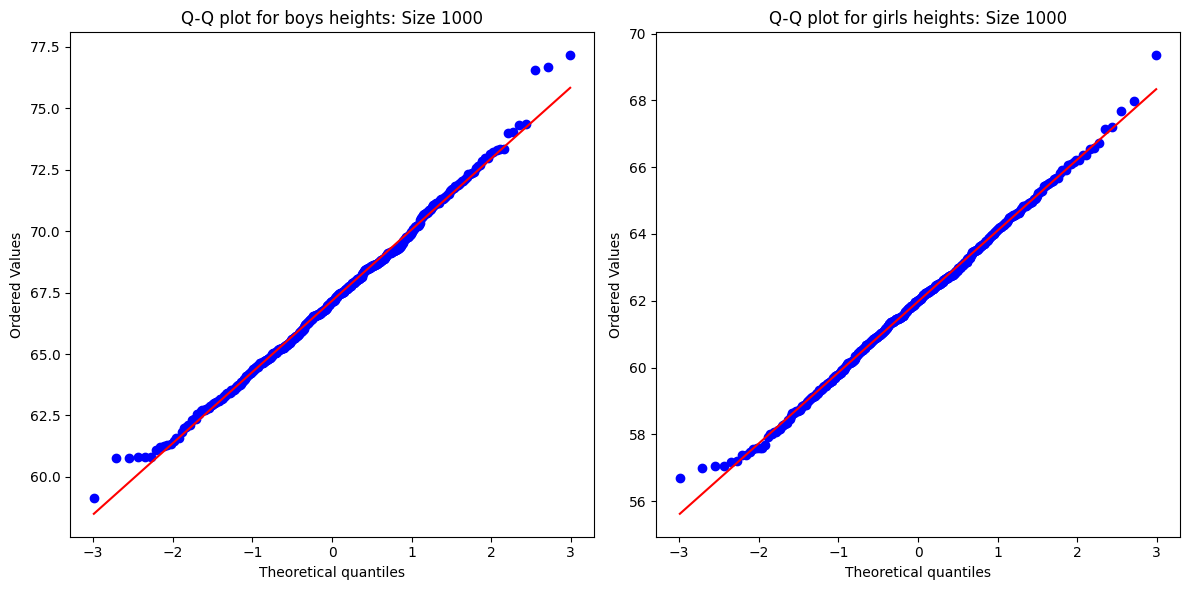

In [ ]:
# Q-Q plot для обеих столбцов (boys, girls)

# Для выборки размера 100
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
stats.probplot(hs_heights_df['boys'].head(100), dist="norm", plot=ax[0]) 
ax[0].set_title('Q-Q plot for boys heights: Size 100') 
stats.probplot(hs_heights_df['girls'].head(100), dist="norm", plot=ax[1]) 
ax[1].set_title('Q-Q plot for girls heights: Size 100') 
plt.tight_layout() 
plt.show()

# Для выборки размера 1000
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
stats.probplot(hs_heights_df['boys'], dist="norm", plot=ax[0]) 
ax[0].set_title('Q-Q plot for boys heights: Size 1000') 
stats.probplot(hs_heights_df['girls'], dist="norm", plot=ax[1]) 
ax[1].set_title('Q-Q plot for girls heights: Size 1000') 
plt.tight_layout() 
plt.show()


**_Envelope Method_**

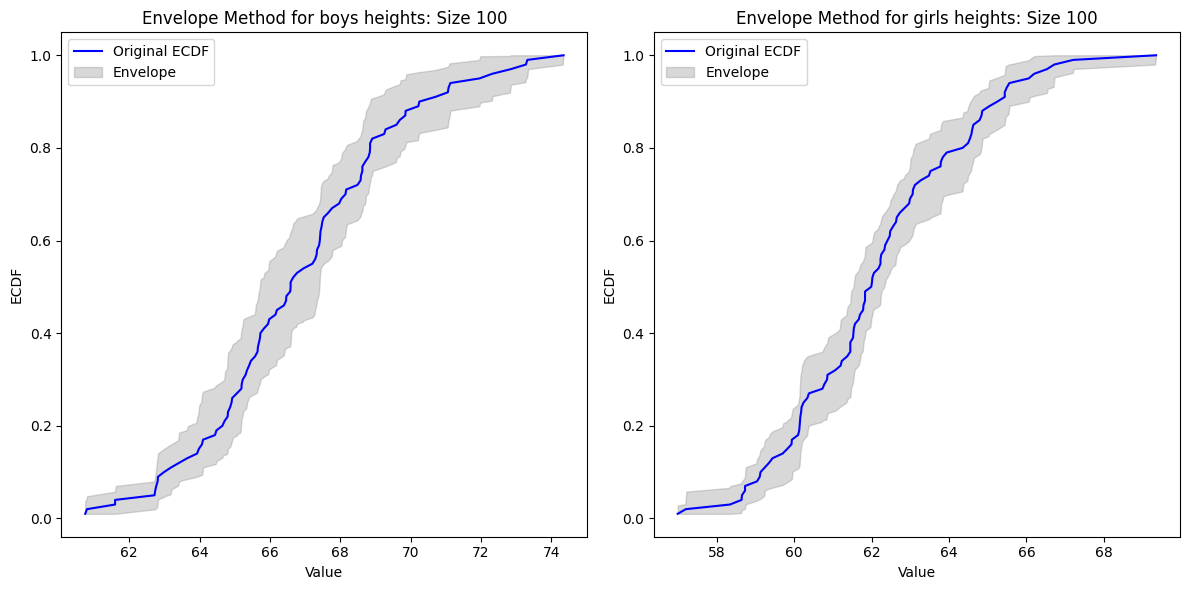

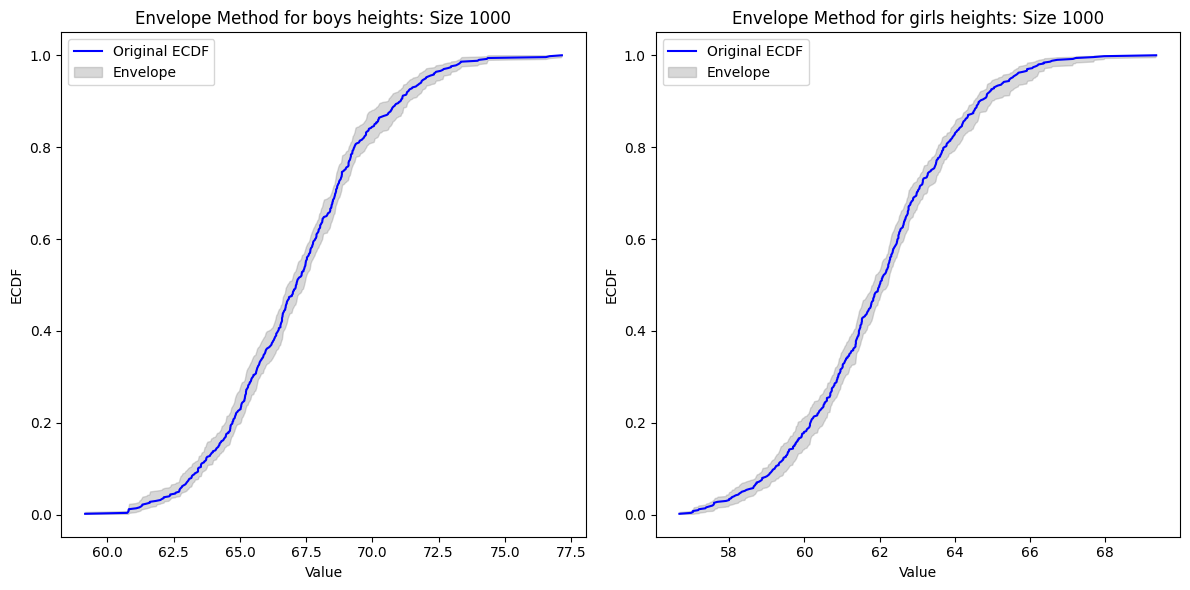

In [ ]:
# Построим огибающую для обеих столбцов (boys, girls) 

# Размер выборки - 100
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
plt.sca(ax[0]) 
envelope_ecdf(hs_heights_df['boys'].head(100)) 
plt.title('Envelope Method for boys heights: Size 100') 
plt.sca(ax[1]) 
envelope_ecdf(hs_heights_df['girls'].head(100)) 
plt.title('Envelope Method for girls heights: Size 100') 
plt.tight_layout() 
plt.show()

# Размер выборки - 1000:
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
plt.sca(ax[0]) 
envelope_ecdf(hs_heights_df['boys']) 
plt.title('Envelope Method for boys heights: Size 1000') 
plt.sca(ax[1]) 
envelope_ecdf(hs_heights_df['girls']) 
plt.title('Envelope Method for girls heights: Size 1000') 
plt.tight_layout() 
plt.show()

**Стандартные процедуры проверки гипотез о нормальности (Колмогорова-Смирнова, Шапиро-Уилка и др.)**

In [ ]:
# K-S Test (Критерий Колмогорова-Смирнова) 

# Размер выборки - 100
ks_test1 = stats.kstest(hs_heights_df['boys'].head(100), 'norm', args=(mu, sigma)) 
ks_test2 = stats.kstest(hs_heights_df['girls'].head(100), 'norm', args=(mu, sigma))

# Размер выборки - 1000
ks_test3 = stats.kstest(hs_heights_df['boys'], 'norm', args=(mu, sigma)) 
ks_test4 = stats.kstest(hs_heights_df['girls'], 'norm', args=(mu, sigma))

print("Размер выборки: 100\n")
print(ks_test1, ks_test2, sep='\n', end='\n\n') 

print("Размер выборки: 1000\n")
print(ks_test3, ks_test4, sep='\n', end='\n\n')

Размер выборки: 100

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=60.75, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=56.99, statistic_sign=-1)

Размер выборки: 1000

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=59.16, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=56.68, statistic_sign=-1)



In [ ]:
# H0 - данные распределены нормально
# H1 - данные не распределены нормально

# Проверяем гипотезы для выборок размеров 100 и 1000

# Проверяем на уровне значимости alpha = 0.05

# Выборка размера 100
print("K-S Test.\n\nТест 1: ")
if ks_test1.pvalue > 0.05:
    print("Принимаем нулевую гипотезу: данные распределeны нормально\n")
else:
    print("Принимаем альтернативную гипотезу: данные не распределeны нормально\n")


print("Тест 2: ")
if ks_test2.pvalue > 0.05:
    print("Принимаем нулевую гипотезу: данные распределeны нормально\n")
else:
    print("Принимаем альтернативную гипотезу: данные не распределeны нормально\n")

# Выборка размера 1000
print("Тест 3: ")
if ks_test3.pvalue > 0.05:
    print("Принимаем нулевую гипотезу: данные распределeны нормально\n")
else:
    print("Принимаем альтернативную гипотезу: данные не распределeны нормально\n")


print("Тест 4: ")
if ks_test4.pvalue > 0.05:
    print("Принимаем нулевую гипотезу: данные распределeны нормально\n")
else:
    print("Принимаем альтернативную гипотезу: данные не распределeны нормально\n")

K-S Test.

Тест 1: 
Принимаем альтернативную гипотезу: данные не распределeны нормально

Тест 2: 
Принимаем альтернативную гипотезу: данные не распределeны нормально

Тест 3: 
Принимаем альтернативную гипотезу: данные не распределeны нормально

Тест 4: 
Принимаем альтернативную гипотезу: данные не распределeны нормально



**Остальные тесты для выборки малого и умеренного размеров** 

Тесты проверяют гипотезу о принадлежности данных нормальному распределению. 

Если p-значение больше значения на определенном уровне значимости (например 0.05), то это означает, что гипотеза о нормальности справедлива, иначе, наоборот. (У некоторых тестов, например Андерсон-Дарлинга проверки гипотезы проверются иначе)

In [ ]:
# Проведение тестов

# Применение тестов для обеих выборок, возьмем альфа равным 0.05. True - данные нормальные. False - данные не нормальные.
alpha = 0.05
print(f"Значение alpha: {alpha}\n")
perform_normality_tests(hs_heights_df['boys'].head(100), 'Выборка из 100 элементов - мальчики')
perform_normality_tests(hs_heights_df['girls'].head(100), 'Выборка из 100 элементов - девочки')
perform_normality_tests(hs_heights_df['boys'], 'Выборка из 1000 элементов - мальчики')
perform_normality_tests(hs_heights_df['girls'], 'Выборка из 1000 элементов - девочки')

Значение alpha: 0.05

Результаты тестов для Выборка из 100 элементов - мальчики:
True - принимаем гипотезу о нормальности распределения / False - иначе.


Шапиро-Уилк: Статистика=0.9882, p-value=5.2571e-01
res: True

Андерсон-Дарлинг: Статистика=0.2969, p-value=0.591685433740818
res: True

Крамер фон Мизес: Статистика=33.3333, p-value=4.0719e-09
res: False

Колмогоров-Смирнов (Лиллиефорс): Статистика=1.0000, p-value=0.0000e+00
res: False

Шапиро-Франсия: Статистика=0.9882, p-value=5.2571e-01
res: True

--------------------------------------------------
Результаты тестов для Выборка из 100 элементов - девочки:
True - принимаем гипотезу о нормальности распределения / False - иначе.


Шапиро-Уилк: Статистика=0.9875, p-value=4.6927e-01
res: True

Андерсон-Дарлинг: Статистика=0.4094, p-value=0.3446076611712207
res: True

Крамер фон Мизес: Статистика=33.3333, p-value=4.0719e-09
res: False

Колмогоров-Смирнов (Лиллиефорс): Статистика=1.0000, p-value=0.0000e+00
res: False

Шапиро-Франсия: Стат

**Вывод**: Тесты ***Шапиро-Уилка, Андерсона Дарлинга, Шапиро-Франсия** показали, что распределения роста студентов (мальчиков, девочек) имеет нормальное распределение на умеренных и малых выборках. 

В то время, как **Критерий Колмогорова-Смирнова, его модификация Лиллиефорс, Крамер фон Мизеса** показали, что данные не имеют нормальное распределения на всех объемах выборок.